# SBA Guaranteed Loans

## Abstract

### Motivation

I was interested in this dataset because I was looking for a large dataset, with real data, that has to do with the banking or financial sector, since I am interested in working in that area.

Originally, with my partner for the first 3 challenges, we were between 3 data sets. One about bank marketing, another about credit card non-payment and this one. All three were very interesting, and at some point I would like to work on the other two. It was a tough decision - we ended up removing the credit card data set because it was really big, around 120 columns. It would have been too much, too much work and probably too difficult for a first project. Between the banking marketing dataset and this one, we chose this one because it was much more understandable to us and we didn't know if we were going to be able to do as much analysis on the marketing dataset as we wanted.

We are not mistaken about the richness of this data set. It has a lot of information, there are a lot of analyses, questions that arise and ways to deal with and understand the problems. The exploration and all the instances themselv

### Business Problem

#### Commercial context

The U.S. SBA (United States Small Business Administration) was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market. 

Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. One way SBA assists these small business enterprises is through a loan guarantee program which is designed to encourage banks to grant loans to small businesses. SBA acts much like an insurance provider to reduce the risk for a bank by taking on some of the risk through guaranteeing a portion of the loan. In the case that a
loan goes into default, SBA then covers the amount they guaranteed.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small
businesses and/or start-ups that have defaulted on their SBA-guaranteed loans. The rate of default on these loans has been a source of controversy for decades. Conservative economists believe that credit markets perform efficiently
without government participation. Supporters of SBA- guaranteed loans argue that the social benefits of job creation by those small businesses receiving government- guaranteed loans far outweigh the costs incurred from
defaulted loans.

Since SBA loans only guarantee a portion of the entire loan
balance, banks will incur some losses if a small business defaults
on its SBA-guaranteed loan. Therefore, banks are still faced
with a difficult choice as to whether they should grant such a
loan because of the high risk of default. One way to inform
their decision making is through analyzing relevant historical
data such as the datasets provided here.



Nowadays, the SBA decided to modernize and set up a Data Analytics team to improve its credit approval system. We are data scientists who are part of that team.


#### Target

The business problem is deciding whether a loan can be made, with a reasonable probability that the requesting company can safely repay it. That is, the approval of the loan by the SBA. The amount to be approved will be made in a future instance, after the company declares how much it would need and it will not be dealt with in this work.

It's worth remembering that since the SBA is a state entity, its goal is not to raise money, but to help businesses wherever possible. That is, unlike a private for-profit entity, it is more inclined to help than not to help in somewhat risky cases. Of course, money is saved and not lent to clearly insolvent companies, but the SBA criteria have that bias that we'll use later when choosing how to evaluate the models.

### Analytical approach

Historical loan data was obtained from https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied. We begin by conducting an exhaustive exploration of the data following the questions and hypotheses that we will detail in the following sections ('Questions', 'Hypothesis') as a guide. We study which variables are related to the default of a loan: the variables related to the company, the bank, the term of the loans, the type of credit, loan amounts, etc.

We also used historical inflation data and major stock indices to see if they help us predict defaults.
Transformations were made to the given variables and new variables were created from them, in order to better understand the information and obtain more insights.

Once the exploratory analysis was complete, a machine learning model was run, whose input variables are (only) the data that is available at the time the SBA decides whether to approve the loan,  and predicts whether or not the loan defaulted. The objective is to choose the best possible model among those used. The metric to measure the performance of the models was chosen based on the business objectives and is explained in the corresponding section.

Two versions of the dataset were used, a dataset with all the historical data (it is the original with cleaning and transformations to the variables), and another that is the same but with the filtered data from the year 1990 onwards. The reason for this was to decide which of the two data sets is better to predict: one thing we did see in the exploration is that there are far fewer loans in the years before 1990 than after 1990 (and they are declining rapidly as we move forward). ), and that the default rate is higher, suggesting that the data collected is skewed and is not the total number of loans (or that only riskier loans were made). In any case, in recent years the loan statistics have changed a lot, and for this reason, to predict with today's loans it is probably better to take the data set of the last few years.

These data sets were evaluated in 5 different machine learning models. First we did a training with default parameters to see how the models behave and have a reference. Then we dive into the most important stage of modeling, which is the search for the best model.

In the search for the best model we made two strategies. The reason for doing two strategies was simply because the first one did not give us the results we expected, more specifically, the performance of the default training in one of the algorithms was better than the performance of any of the algorithms used with the selection of variables and adjustment of hyperparameters of the first strategy. In other words, the second strategy is what we wanted to avoid when doing the first, because it involves more careful handling of variables. But we decided to do it because it was the only way we could find to improve the performance of algorithms with default training, and to make sure that the model was the best we could get.

First strategy: We carry out a variable selection process based on a "voting" system of the 5 algorithms, plus a sixth (support vector machines) that we use to complement (we do not use that sixth in all the work because it is very slow ). This voting system, which we will explain in the corresponding section, chooses a subset of variables that we consider to be the "most important".

Once the most important variables were obtained, each of the five models was trained with the two versions of the data set to see the performance and if there was any improvement. In the remainder of this strategy, only these variables were considered.

The next step was a selection of hyperparameters. We did a Bayesian search on all 5 models with both data sets (actually on samples of the data set, due to processing time) with all variables chosen as important. The values obtained (in each model) are what we consider optimal hyperparameters (of each model).

Finally, we train the dataset of each full version (not just a sample) of the chosen variables with the hyperparameters we found, to select which is the best algorithm with this strategy.

Second strategy: The order of the procedures is the same, the main difference is that instead of choosing a set of important variables with which to train ALL the algorithms, we are left with the list in each of the algorithms, and from here on henceforth every algorithm had that list associated with it. Other changes we made were increasing the sample set from 5000 to 50000 samples, removing the Support Vector Machines algorithm from the variable selection process because the training time is very high (and it also turned out not to be very good in terms of performance in this problem), and make the selection of variables in the two versions of the dataset (in the first strategy we only rely on the dataset with all the years).

Finally, we compared all the results obtained, we corroborated that the second strategy gave better results than the first and the default training, and we chose the bests algorithms based on the performance found.

### Questions

* What are the characteristics of the companies that best predict whether or not the company will have problems repaying the loan? 

* What happens if a company takes several loans, is it more likely that one will have problems? 

* How does the borrowing bank and the line of credit influence? Is there a relationship with the term of the loan? And with the year the loan was made? (Let's keep in mind that this last question is related to the economic and political context.).

## Libraries and general custom functions and styles

We put here the necessary libraries to run the entire dataset and the general custom functions (there are custom functions that do not have a general use, and are very specific and we leave them in the body of the work).

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 500

In [12]:
#from google.colab import drive # We mount a Google Drive folder where the dataset is.
#drive.mount('/content/drive', force_remount=True)

#path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
path = "./"

In [13]:
#!pip install sidetable
from pandas.api.types import is_numeric_dtype
from scipy.stats import ttest_ind
import sidetable

In [14]:
def univariate_info(new_df):
  df_info = pd.DataFrame(columns=['Count', 'Type' , 'Missing', 'Unique', 'Numeric'])
  for col in new_df:
    data_series = new_df[col]
    df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]
    df_describe = new_df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    df_stats = pd.DataFrame([new_df.skew(numeric_only=True), new_df.kurtosis(numeric_only=True)], index=['skew', 'kurtosis']).T
  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('0')

def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

In [15]:
def strat_sample(df, target, sample_size, seed): 
    '''We make a stratified sample by a binary target. The target values are 0 and 1, 
                                                #for simplicity.
                                                
        df is a dataframe
        
        target is the name of the target variable
        
        seed is the random seed to generate pseudo random numbers.'''
    
    x=df[target].value_counts(normalize=True)*sample_size # Calculate the rate of each target value and then we multiply by
        # sample size. If we around this numbers we obtain the desired number of samples for each posible value of the target
        # variable. These only works because the target is binary. If the target is not binary, I have to think of a way to
        # round all the rows and have the sum of exactly the number of samples desired
   
    x=round(x,0)
    size_0 =x.iloc[0]
    size_0=size_0.astype(int)
    size_1 = x.loc[1]
    size_1=size_1.astype(int)
    
    part_0 = df[df[target]==0].sample(size_0, random_state= seed) # We take a sample for each value of the sample of size_i.
    part_1 = df[df[target]==1].sample(size_1, random_state= seed)
    sample = pd.concat([part_0, part_1])
    
    return sample    

In [16]:
def describe_values(df, category_col, column_to_analyze):
  '''It does the same as df.groupby(category_col)[column_to_analyze].describe() but with more information. But it has 
  the problem that it couldn't handle null values. We have to see how to fix it later.'''

  #create a dataframe with specific columns

  df_info = pd.DataFrame(columns=['count', 'missing', 'unique_values', 'mean', 'std', 'mode', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis'])
  df_info.index.name = category_col # The name in the index appears in the name of the first column
  #loop of all the values that the category has
  for val in df[category_col].unique():

      # get info from column
      data_series = df[df[category_col]==val][column_to_analyze]
      # fill dataframe with initial columns
      df_info.loc[val] = [data_series.count(), data_series.isnull().sum(),  data_series.nunique(), data_series.mean(), data_series.std(), data_series.mode().iloc[0], data_series.min(), data_series.quantile(.25), data_series.quantile(.5), data_series.quantile(.75), data_series.max(), data_series.skew(), data_series.kurtosis()]

  return df_info

In [17]:
def partition_log(a,b,n):
    '''Given an integer interval [a,b](={a, a+1, ..., b}) returns a partition {a=a_0, a_1, a_2, ..., a_n=b} "logarithmically 
    equispaced in integer numbers". By this we mean that ln (a_{i+1}-a_i +1) is constant, or equivalently,
    (a_{i+1}-a_0+1)/((a_{i}-a_0+1)) is constant. (To understand why 1 is added, think about the interval [0,1] and n=1. You have
    #to transform the interval to [1,2]).'''
    
    import numpy as np
    
    s=np.log(b-a+1)/n
    l=np.array([])
    for j in range(0,n+1):
        l=np.append(l, np.exp(j*s)-1+a)
    
    return l

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [18]:
#!pip install mlxtend 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [19]:
styles=[dict(selector="caption", props=[("font-size", "100%"), ("font-weight", "bold")
             #            ,("color", "white"), ("background-color", "grey")])] # Another option                                       
                                       ])]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer # Code to use feature cat and numeric together
from sklearn.compose import make_column_selector # Selector in pipeline by dtypes

In [ ]:
#!pip install scikit.optimize

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import balanced_accuracy_score as bas
import time
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import randint
from graphviz import Source

## Data adquisition

The dataset source is https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied. 

We also use (in the appendix) inflation data for the United States and the Dow Jones and SP 500 indices. The source of the inflation data is this: https://www.usinflationcalculator.com/inflation/historical-inflation-rates/ 
(The creation of the csv file was manual), and the links of the source of the indices are these:
https://www.investing.com/indices/us-spx-500-historical-data

https://www.investing.com/indices/us-30-historical-data


More info about the dataset: https://doi.org/10.1080/10691898.2018.1434342

We load the dataset.

In [231]:
loans = pd.read_csv(path + "Should This Loan be Approved or Denied.csv") 
#We see that column 9 has several different types, let's take a better look at it.

C:\Users\Hernán\AppData\Local\Temp\ipykernel_8900\3122350407.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  loans = pd.read_csv(path + "Should This Loan be Approved or Denied.csv")


### Dataset Fields

The fields found in the dataset are the following:

**- LoanNr_ChkDgt**: Identifier – Primary key.

**- Name**: Borrower name.

**- City**: Borrower city.

**- State**: Borrower state (U.S.).

**- Zip**: Borrower zip code.

**- Bank**: Bank name.

**- BankState**: State of the bank branch.

**- NAICS**:  North American industry classification system code.

**- ApprovalDate**: Date SBA commitment issued.

**- ApprovalFY**: Fiscal year of commitment.

**- Term**: Loan term in months.

**- NoEmp**: Number of business employees.

**- NewExist**: 1=Existing business, 2=New business. This represents whether the business is an existing business (in existence for more than 2 years) or a new business (in existence for less than or equal to 2 years).

**- CreateJob**: Number of jobs created.

**- RetainedJob**: Number of jobs retained.

**- FranchiseCode**: Franchise code, (00000 or 00001)=No franchise.

**- UrbanRural**: 1=Urban, 2=rural, 0=undefined.

**- RevLineCr**: Revolving line of credit: Y=Yes, N=No.

**- LowDoc**: LowDoc Loan Program: Y = Yes, N = No. In order to process more loans efficiently, a “LowDoc Loan” program was implemented where loans under $150,000 can be processed using a one-page application. “Yes” indicates loans with a one-page application, and “No” indicates loans with more information attached to the application.

**- ChgOffDate**: The date when a loan is declared to be in default.

**- DisbursementDate**: Payment date (delivery of the loan).

**- DisbursementGross**: Gross amount disbursed/paid (per loan delivery).

**- BalanceGross**: Gross amount pending return (at the time of preparation of the dataset).

**- MIS_Status**: Loan status: Loan status charged off=CHGOFF, Paid in full=PIF.

**- ChgOffPrinGr**: Charged-off amount (Amount canceled (not refunded)).

**- GrAppv**: Gross amount of loan approved by bank.

**- SBA_Appv**: SBA’s guaranteed amount of approved loan.

Since the dataset is labeled (the MIS_Status field indicates whether or not there were any issues with the loan), it is a supervised learning problem, more specifically, classification. The category we want to assign to future loans corresponds to the target variable, MIS_Status.

### Hypotheses

The fields that we believe may be most relevant to the company requesting the loan are: 'State', 'NAICS', 'NoEmp', 'NewExist', 'UrbanRural'.

Regarding the bank and the line of credit that seem most relevant to us are: 'BankState', 'RevLineCr', 'DisbursementGross', 'GrAppv', 'SBA_Appv'.

To see if there is a relationship with terms, we are going to study the 'Term' field.

Regarding the relationship with the years of the loans, we believe that the fields 'DisbursementDate', 'ApprovalDate', 'ApprovalFY' and 'ChgOffDate' are relevant, although the first three are probably very similar.

## Exploratory Data Analysis (EDA) and Data Wrangling

### A first contact with the dataset

The objective of this section is to make a first analysis of the data as it comes WITHOUT making any changes or transformations.

When we loaded the data we got the following warning: 

    "C:\Users\Hernán\AppData\Local\Temp\ipykernel_20820\3122350407.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False. 
    loans = pd.read_csv(path + "Should This Loan be Approved or Denied.csv")"


This says that column 9 has several different types, let's take a better look at it.

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

The info statement doesn't detect the problem, but we can look better:

In [5]:
for column in loans.columns:
  print(column, ' ---> ', pd.api.types.infer_dtype(loans[column]))

LoanNr_ChkDgt  --->  integer
Name  --->  string
City  --->  string
State  --->  string
Zip  --->  integer
Bank  --->  string
BankState  --->  string
NAICS  --->  integer
ApprovalDate  --->  string
ApprovalFY  --->  mixed-integer
Term  --->  integer
NoEmp  --->  integer
NewExist  --->  floating
CreateJob  --->  integer
RetainedJob  --->  integer
FranchiseCode  --->  integer
UrbanRural  --->  integer
RevLineCr  --->  string
LowDoc  --->  string
ChgOffDate  --->  string
DisbursementDate  --->  string
DisbursementGross  --->  string
BalanceGross  --->  string
MIS_Status  --->  string
ChgOffPrinGr  --->  string
GrAppv  --->  string
SBA_Appv  --->  string


So we corroborate that there is a problem. It would have to be a date or an integer.

-------------------------------------------------------------------------------------

Looking back at the output of the info command, we see that there are several columns with null values, although they are few in percentage terms. The only exception is the ChgOffDate column, which has quite a few and is logical, because this column is the date on which the customer began to default on the debt and therefore only has values if the customer had problems paying.
The columns with null values are: Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status:

In [233]:
loans.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Let's explore the data a bit more:

In [6]:
loans.describe(include = 'all').T


count  unique                         top     freq   
LoanNr_ChkDgt      899164.0     NaN                         NaN      NaN  \
Name                 899150  779583                      SUBWAY     1269   
City                 899134   32581                 LOS ANGELES    11558   
State                899150      51                          CA   130619   
Zip                899164.0     NaN                         NaN      NaN   
Bank                 897605    5802  BANK OF AMERICA NATL ASSOC    86853   
BankState            897598      56                          CA   118116   
NAICS              899164.0     NaN                         NaN      NaN   
ApprovalDate         899164    9859                    7-Jul-93     1131   
ApprovalFY         899164.0    70.0                      2006.0  76040.0   
Term               899164.0     NaN                         NaN      NaN   
NoEmp              899164.0     NaN                         NaN      NaN   
NewExist           899028.0     NaN                         NaN      NaN   
CreateJob          899164.0     NaN                         NaN      NaN   
RetainedJob        899164.0     NaN                         NaN      NaN   
FranchiseCode      899164.0     NaN                         NaN      NaN   
UrbanRural         899164.0     NaN                         NaN      NaN   
RevLineCr            894636      18                           N   420288   
LowDoc               896582       8                           N   782822   
ChgOffDate           162699    6448                   13-Mar-10      734   
DisbursementDate     896796    8472                   31-Jul-95    10371   
DisbursementGross    899164  118859                 $50,000.00     43787   
BalanceGross         899164      15                      $0.00    899150   
MIS_Status           897167       2                       P I F   739609   
ChgOffPrinGr         899164   83165                      $0.00    737152   
GrAppv               899164   22128                 $50,000.00     69394   
SBA_Appv             899164   38326                 $25,000.00     49579   

                               mean               std           min   
LoanNr_ChkDgt      4772612310.59431  2538175037.45304  1000014003.0  \
Name                            NaN               NaN           NaN   
City                            NaN               NaN           NaN   
State                           NaN               NaN           NaN   
Zip                    53804.391241      31184.159152           0.0   
Bank                            NaN               NaN           NaN   
BankState                       NaN               NaN           NaN   
NAICS                 398660.950146      263318.31276           0.0   
ApprovalDate                    NaN               NaN           NaN   
ApprovalFY                      NaN               NaN           NaN   
Term                     110.773078         78.857305           0.0   
NoEmp                     11.411353         74.108196           0.0   
NewExist                   1.280404           0.45175           0.0   
CreateJob                  8.430376        236.688165           0.0   
RetainedJob               10.797257          237.1206           0.0   
FranchiseCode           2753.725933      12758.019136           0.0   
UrbanRural                 0.757748          0.646436           0.0   
RevLineCr                       NaN               NaN           NaN   
LowDoc                          NaN               NaN           NaN   
ChgOffDate                      NaN               NaN           NaN   
DisbursementDate                NaN               NaN           NaN   
DisbursementGross               NaN               NaN           NaN   
BalanceGross                    NaN               NaN           NaN   
MIS_Status                      NaN               NaN           NaN   
ChgOffPrinGr                    NaN               NaN           NaN   
GrAppv                          NaN            

In [7]:
loans.head(5)

LoanNr_ChkDgt                           Name          City State    Zip   
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711  \
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY   
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997  \
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural   
0    84      4       2.0          0            0              1           0  \
1    60      2       2.0          0            0              1           0   
2   180      7       1.0          0            0              1           0   
3    60      2       1.0          0            0              1           0   
4   240     14       1.0          7            7              1           0   

  RevLineCr LowDoc ChgOffDate DisbursementDate DisbursementGross BalanceGross   
0         N      Y        NaN        28-Feb-99       $60,000.00        $0.00   \
1         N      Y        NaN        31-May-97       $40,000.00        $0.00    
2         N      N        NaN        31-Dec-97      $287,000.00        $0.00    
3         N      Y        NaN        30-Jun-97       $35,000.00        $0.00    
4         N      N        NaN        14-May-97      $229,000.00        $0.00    

  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0      P I F       $0.00    $60,000.00    $48,000.00   
1      P I F       $0.00    $40,000.00    $32,000.00   
2      P I F       $0.00   $287,000.00   $215,250.00   
3      P I F       $0.00    $35,000.00    $28,000.00   
4      P I F       $0.00   $229,000.00   $229,000.00

We notice that the NAICS column has zeros. Zeros are not valid industry classification codes, so this is the same as having nulls. Let's see how many zeros there are in that column.

In [8]:
(loans['NAICS']==0).sum()

201948

That's a little over 22% of the rows, so that field has a hefty value of nulls.

In [237]:
loans.stb.freq(['NAICS'])

NAICS   count    percent  cumulative_count  cumulative_percent
0          0  201948  22.459529            201948           22.459529
1     722110   27989   3.112780            229937           25.572309
2     722211   19448   2.162898            249385           27.735207
3     811111   14585   1.622062            263970           29.357270
4     621210   14048   1.562340            278018           30.919610
...      ...     ...        ...               ...                 ...
1307  212210       1   0.000111            899160           99.999555
1308  112420       1   0.000111            899161           99.999666
1309  111992       1   0.000111            899162           99.999778
1310  111336       1   0.000111            899163           99.999889
1311  111130       1   0.000111            899164          100.000000

[1312 rows x 5 columns]

-------------------------------------------------------------------------------------

There are several columns that have monetary values and to work with them we have to pass them to numerical format. These columns are: DisbursementGross, BalanceGross, GrAppv y SBA_Appv.

-------------------------------------------------------------------------------------

Another thing to note is that the ApprovalDate, DisbursementDate and ChgOffDate columns are date data, but one can see that in the dataframe they are strings:

In [9]:
print(pd.api.types.infer_dtype(loans['ApprovalDate']))
print(pd.api.types.infer_dtype(loans['DisbursementDate']))
print(pd.api.types.infer_dtype(loans['ChgOffDate']))


string
string
string


In [10]:
loans[['ApprovalDate', 'DisbursementDate', 'ChgOffDate']].sample(5)

ApprovalDate DisbursementDate ChgOffDate
878069     4-Sep-96        14-May-97        NaN
845892     7-Mar-96        15-Jan-97        NaN
65916     21-Aug-97        31-Oct-97        NaN
541968     2-Apr-02        31-May-02        NaN
251383    19-Oct-07        30-Nov-07   9-Jul-13

If we are going to use them later, we would have to convert them. 

In [240]:
loans.stb.freq(['ApprovalDate'])

ApprovalDate  count   percent  cumulative_count  cumulative_percent
0        7-Jul-93   1131  0.125784              1131            0.125784
1       30-Jan-04   1032  0.114773              2163            0.240557
2        8-Jul-93    780  0.086747              2943            0.327304
3        4-Oct-04    658  0.073179              3601            0.400483
4       30-Sep-03    608  0.067618              4209            0.468101
...           ...    ...       ...               ...                 ...
9854     1-Dec-02      1  0.000111            899160           99.999555
9855     1-Aug-79      1  0.000111            899161           99.999666
9856     1-Aug-78      1  0.000111            899162           99.999778
9857     1-Aug-10      1  0.000111            899163           99.999889
9858     1-Apr-14      1  0.000111            899164          100.000000

[9859 rows x 5 columns]

In [241]:
loans.stb.freq(['DisbursementDate'])

DisbursementDate  count   percent  cumulative_count  cumulative_percent
0           31-Jul-95  10371  1.156450             10371            1.156450
1           30-Apr-95  10320  1.150763             20691            2.307214
2           31-Jan-95   9745  1.086646             30436            3.393860
3           31-Oct-94   8890  0.991307             39326            4.385167
4           31-Oct-95   8161  0.910017             47487            5.295184
...               ...    ...       ...               ...                 ...
8467         1-Apr-80      1  0.000112            896792           99.999554
8468         1-Apr-77      1  0.000112            896793           99.999665
8469         1-Apr-08      1  0.000112            896794           99.999777
8470         1-Apr-06      1  0.000112            896795           99.999888
8471         1-Apr-03      1  0.000112            896796          100.000000

[8472 rows x 5 columns]

In [242]:
loans.stb.freq(['ChgOffDate'])

ChgOffDate  count   percent  cumulative_count  cumulative_percent
0     13-Mar-10    734  0.451140               734            0.451140
1     20-Feb-10    614  0.377384              1348            0.828524
2     30-Jan-10    519  0.318994              1867            1.147518
3      6-Feb-10    461  0.283345              2328            1.430863
4      6-Mar-10    422  0.259375              2750            1.690238
...         ...    ...       ...               ...                 ...
6443   1-Aug-89      1  0.000615            162695           99.997541
6444   1-Apr-99      1  0.000615            162696           99.998156
6445   1-Apr-98      1  0.000615            162697           99.998771
6446   1-Apr-96      1  0.000615            162698           99.999385
6447   1-Apr-94      1  0.000615            162699          100.000000

[6448 rows x 5 columns]

--------------------------------------------------------------------------------------------

NAICS classification code numbers have positional significance. The first two digits designate the largest business sector, the third digit designates the subsector, the fourth digit designates the industry group, the fifth digit designates NAICS industries, and the sixth digit designates national industries. The code table for the first two digits is as follows:

|Sector |	Description|
|-------|----------------|
11 | Agriculture, forestry, fishing and hunting
21 |	Mining, quarrying, and oil and gas extraction
22 |	Utilities
23 |	Construction
31–33 |	Manufacturing
42 |	Wholesale trade
44–45 |	Retail trade
48–49 |	Transportation and warehousing
51 |	Information
52 |	Finance and insurance
53 |	Real estate and rental and leasing
54 |	Professional, scientific, and technical services
55 |	Management of companies and enterprises
56 |	Administrative and support and waste management and remediation services
61 |	Educational services
62 |	Health care and social assistance
71 |	Arts, entertainment, and recreation
72 |	Accommodation and food services
81 |	Other services (except public administration)
92 |  Public administration

Therefore we will find it convenient to isolate those first two digits in a new column. Regarding the third, it should be analyzed.

--------------------------------------------------------------------------------------------

One thing we noticed is that the 'RevLineCr' field has 18 distinct values, when in reality it should have only two, 'Y' and 'N'.

In [11]:
loans['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [244]:
loans.stb.freq(['RevLineCr'])

RevLineCr   count    percent  cumulative_count  cumulative_percent
0          N  420288  46.978659            420288           46.978659
1          0  257602  28.794057            677890           75.772717
2          Y  201397  22.511614            879287           98.284330
3          T   15284   1.708404            894571           99.992734
4          1      23   0.002571            894594           99.995305
5          R      14   0.001565            894608           99.996870
6          `      11   0.001230            894619           99.998100
7          2       6   0.000671            894625           99.998770
8          C       2   0.000224            894627           99.998994
9          Q       1   0.000112            894628           99.999106
10         A       1   0.000112            894629           99.999218
11         7       1   0.000112            894630           99.999329
12         5       1   0.000112            894631           99.999441
13         4       1   0.000112            894632           99.999553
14         3       1   0.000112            894633           99.999665
15         .       1   0.000112            894634           99.999776
16         -       1   0.000112            894635           99.999888
17         ,       1   0.000112            894636          100.000000

Something similar happens with the LowDoc field:

In [13]:
loans['LowDoc'].unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

In [245]:
loans.stb.freq(['LowDoc'])

LowDoc   count    percent  cumulative_count  cumulative_percent
0      N  782822  87.311813            782822           87.311813
1      Y  110335  12.306181            893157           99.617994
2      0    1491   0.166298            894648           99.784292
3      C     758   0.084543            895406           99.868835
4      S     603   0.067255            896009           99.936091
5      A     497   0.055433            896506           99.991523
6      R      75   0.008365            896581           99.999888
7      1       1   0.000112            896582          100.000000

We don't know how to interpret most of the categories, in both cases the 0's represent a large part of the data. In a deeper analysis we will decide what to do with these fields.

--------------------------------------------------------------------------------------------

Another thing we see is that it would be useful to have the Target variable as a boolean. But for now we won't because we don't want to touch anything in the original dataframe.

--------------------------------------------------------------------------------------------

Let's see if there are duplicate rows.

In [15]:
loans.duplicated().sum()

0

We see that there are no duplicate rows. However, this topic does not end here because it turns out that what causes there to be no duplicate rows is the identifier column, 'LoanNr_ChkDgt', but if that column is removed, there are identical entries. 

In [16]:
loans.duplicated(subset= ['LoanNr_ChkDgt']).sum()

0

In [17]:
loans[loans.columns.difference(['LoanNr_ChkDgt'])].duplicated().sum()

128

In [18]:
loans[loans[loans.columns.difference(['LoanNr_ChkDgt'])].duplicated(keep=False)].head(8)

LoanNr_ChkDgt                           Name             City State   
240       1001905008              REYNOLDS H20 PLUS     WEST READING    PA  \
243       1001915000              REYNOLDS H20 PLUS     WEST READING    PA   
35622     1271744001  ARCHITECTURAL ORNAMENTS, INC.      KANSAS CITY    MO   
35632     1271864002  ARCHITECTURAL ORNAMENTS, INC.      KANSAS CITY    MO   
43040     1334174005                          NETEC          CHELSEA    MA   
43054     1334264008                          NETEC          CHELSEA    MA   
61200     1462815008          Meathead Movers, Inc.  San Luis Obispo    CA   
61201     1462835003          Meathead Movers, Inc.  San Luis Obispo    CA   

         Zip                            Bank BankState   NAICS ApprovalDate   
240    19611     WELLS FARGO BANK NATL ASSOC        PA       0     4-Dec-97  \
243    19611     WELLS FARGO BANK NATL ASSOC        PA       0     4-Dec-97   
35622  64126  UMB BANK, NATIONAL ASSOCIATION        MO  327331    22-May-97   
35632  64126  UMB BANK, NATIONAL ASSOCIATION        MO  327331    22-May-97   
43040   2150         STATE STREET BK & TR CO        MA       0    10-Jun-97   
43054   2150         STATE STREET BK & TR CO        MA       0    10-Jun-97   
61200  93401             COAST NATIONAL BANK        CA  484210    20-Sep-05   
61201  93401             COAST NATIONAL BANK        CA  484210    20-Sep-05   

      ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob   
240         1998    60     46       1.0          0            0  \
243         1998    60     46       1.0          0            0   
35622       1997    12     16       1.0          0            0   
35632       1997    12     16       1.0          0            0   
43040       1997     5     26       1.0          0            0   
43054       1997     5     26       1.0          0            0   
61200       2005    12     82       2.0         82            0   
61201       2005    12     82       2.0         82            0   

       FranchiseCode  UrbanRural RevLineCr LowDoc ChgOffDate DisbursementDate   
240            21400           0         0      N        NaN        28-Feb-98  \
243            21400           0         0      N        NaN        28-Feb-98   
35622              1           0         N      N        NaN        31-Jan-98   
35632              1           0         N      N        NaN        31-Jan-98   
43040              1           0         N      N        NaN        31-Oct-97   
43054              1           0         N      N        NaN        31-Oct-97   
61200              0           2         N      N        NaN        28-Feb-06   
61201              0           2         N      N        NaN        28-Feb-06   

      DisbursementGross BalanceGross MIS_Status ChgOffPrinGr        GrAppv   
240        $100,000.00        $0.00       P I F       $0.00   $100,000.00   \
243        $100,000.00        $0.00       P I F       $0.00   $100,000.00    
35622       $50,000.00        $0.00       P I F       $0.00    $50,000.00    
35632       $50,000.00        $0.00       P I F       $0.00    $50,000.00    
43040       $46,771.00        $0.00       P I F       $0.00    $46,771.00    
43054       $46,771.00        $0.00       P I F       $0.00    $46,771.00    
61200        $4,000.00        $0.00       P I F       $0.00     $4,000.00    
61201        $4,000.00        $0.00       P I F       $0.00     $4,000.00    

          SBA_Appv  
240    $50,000.00   
243    $50,000.00   
35622  $40,000.00   
35632  $40,000.00   
43040  $35,078.00   
43054  $35,078.00   
61200   $2,000.00   
61201   $2,000.00

These identical entries are errors in having indexed them as different loans and after this first analysis they will be deleted.

--------------------------------------------------------------------------------------------

Let's make some plots related to the questions posed in the business problem.

#### Variables related to the company

Is there any relationship between the number of employees and problems in paying the loan?

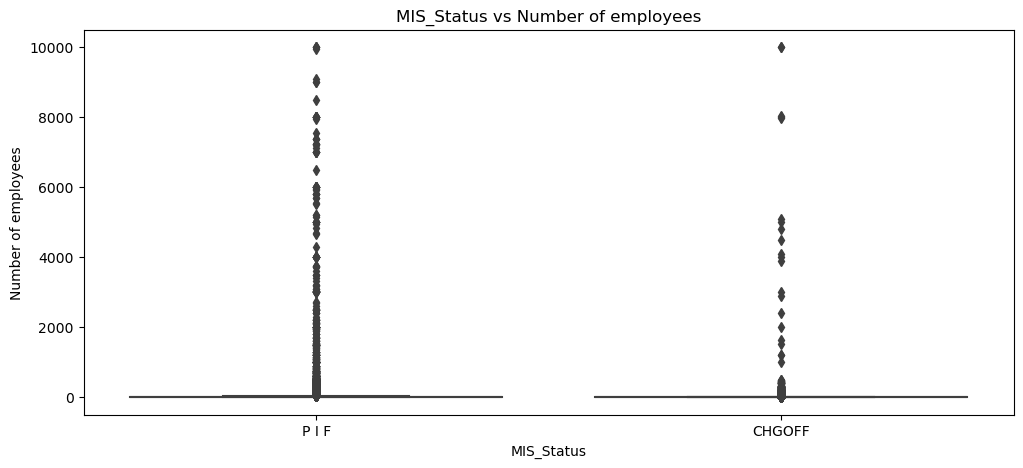

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'NoEmp', data = loans)  
plt.title("MIS_Status vs Number of employees");
ax.set(xlabel='MIS_Status', ylabel='Number of employees');

Let's do a violin plot to see if it looks better.

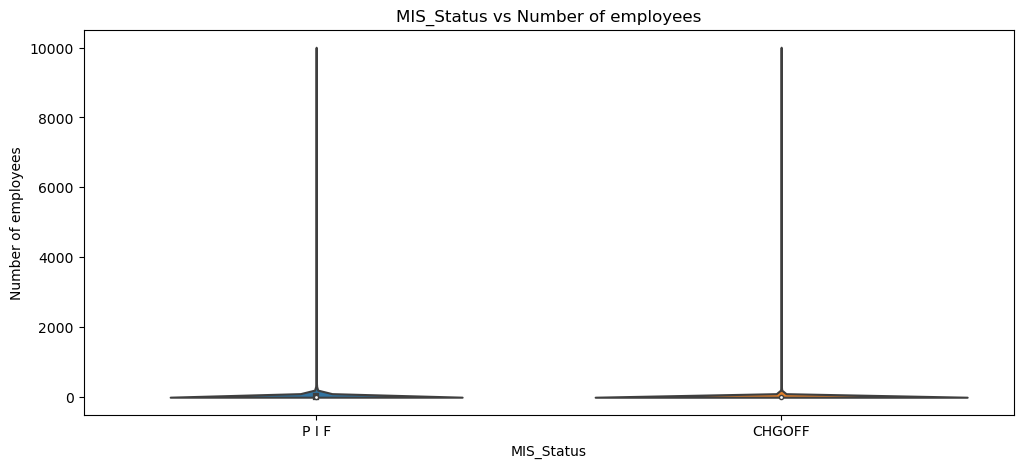

In [249]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(x = 'MIS_Status', y='NoEmp', data=loans );
plt.title("MIS_Status vs Number of employees");
ax.set(xlabel='MIS_Status', ylabel='Number of employees');

It's not the case. There are many outliers and the plot is not very understandable. Let's remove the outliers from the plot.

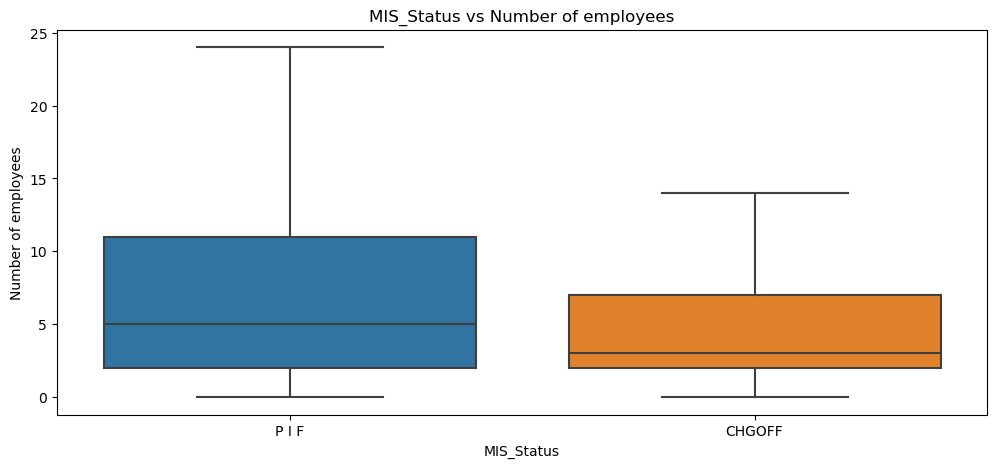

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'NoEmp', data = loans,  showfliers = False)  
plt.title("MIS_Status vs Number of employees");
ax.set(xlabel='MIS_Status', ylabel='Number of employees');

Recall that those who had problems are those classified as 'CHGOFF', and those who did not have problems are those classified as 'P I F' (paid in full).

We see that, taking outliers, the companies that did not present problems when paying have more employees. This tells us that the greater the number of employees, the more likely payment is without a problem.

We estimate, in principle, that this is because the companies with the largest number of employees are better established. Which leads us to wonder what relationship there is between failing to comply and the company being new. The NewExist field is 1 if the company existed before the loan and 2 if it is new.
 

Let's discuss the percentages of MIS_Status values based on whether it is new or not.

In [21]:
loans[loans['NewExist']==2]['MIS_Status'].value_counts(normalize=True)

MIS_Status
P I F     0.812452
CHGOFF    0.187548
Name: proportion, dtype: float64

In [22]:
loans[loans['NewExist']==1]['MIS_Status'].value_counts(normalize=True)

MIS_Status
P I F     0.828868
CHGOFF    0.171132
Name: proportion, dtype: float64

Graphically:

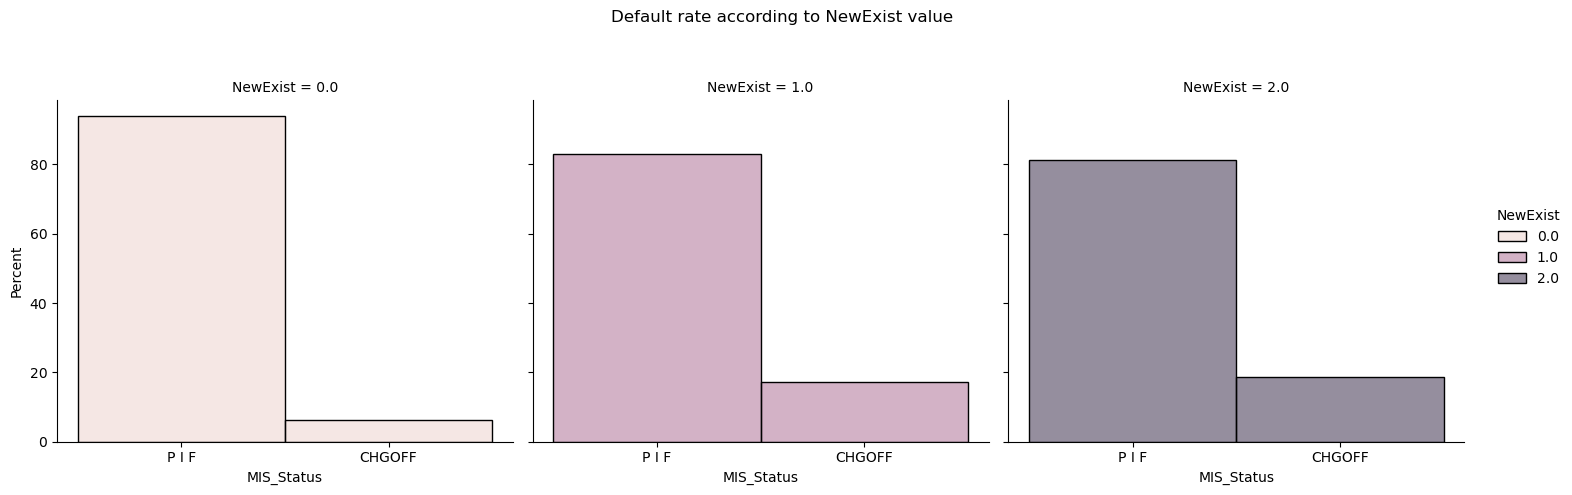

In [266]:
g=sns.displot(data=loans, x="MIS_Status", col="NewExist", hue="NewExist", stat='percent', common_norm=False);
g.fig.suptitle('Default rate according to NewExist value')
g.fig.subplots_adjust(top=.8)

In [271]:
new_vs_MIS_Status = loans.groupby('NewExist', dropna=False)['MIS_Status'].describe()
new_vs_MIS_Status['percent']=new_vs_MIS_Status['freq']/new_vs_MIS_Status['count'] # In this column we 
# have the percentage of data that have the mode value, that is, the percentage of loans paid in full.
new_vs_MIS_Status #the number count is the number of times that NewExist is equal to the number in the 
# left column if MIS_Status is NOT NULL.

count unique    top    freq   percent
NewExist                                        
0.0         1028      2  P I F     965  0.938716
1.0       643446      2  P I F  533332  0.828868
2.0       252559      2  P I F  205192  0.812452
NaN          134      2  P I F     120  0.895522

We see that there is very little difference in default rates between new and existing businesses. Which rules out the above conjecture.

On the other hand, we see that the NewExist parameter also has 0 values, which we associate with the fact that said parameter is not completed. It is not clear if there is a difference between 0 and the record for the 'NewExist' field being empty.

How many 0 values are in that column?

In [272]:
loans[loans['NewExist']==0].shape[0] #shape[0] returns the number of rows, that is, the number of 
#records where NewExist is equal to 0.
# The difference with the value in the above table is because here we are counting the values when 
# MIS_Status is null.

1034

In [270]:
loans.stb.freq(['NewExist'])

NewExist   count    percent  cumulative_count  cumulative_percent
0       1.0  644869  71.729579            644869           71.729579
1       2.0  253125  28.155408            897994           99.884987
2       0.0    1034   0.115013            899028          100.000000

This is a small number compared to the total. We see striking that there is a significant difference between the companies that are not classified (with 0) and those that are classified. This difference cannot be attributed to random error:

In [26]:
# We do an hypothesis test

#We create a column 'MIS_Status_numeric' for analysis. Since we don't want to 
#touch the original dataset in this first analysis, we do it on a copy.
loans_copy = loans.copy()
loans_copy['MIS_Status_numeric'] = loans_copy['MIS_Status']=='CHGOFF'#This new column is 
#True if there were problems with the payment, and False if not.
loans_copy['MIS_Status_numeric'] = loans_copy['MIS_Status_numeric'].astype(int) #We pass 
#this field into binary.

sample_0 = loans_copy[loans_copy['NewExist']==0]['MIS_Status_numeric']
sample_1 = loans_copy[loans_copy['NewExist']!=0]['MIS_Status_numeric']
# sample_0_mean = np.mean(sample_0)
# sample_1_mean = np.mean(sample_1)
# sample_0_std = np.std(sample_0)
# sample_1_std = np.std(sample_1)
# print("sample_0 mean value:",sample_0_mean)
# print("sample_1 mean value:",sample_1_mean)
# print("sample_0 std value:", sample_0_std)
# print("sample_1 std value:", sample_1_std)

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 3.898593127649492e-22
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


The hypothesis test tells us that the difference is real. With the information we have available we cannot explain this difference. We would have to ask the source of the data what exactly it means that the companies have been classified with 0 in this category, which is not explained in the managed documentation.

On the other hand, would zeros be the same as nulls? We see a difference in the default rate, but it may be a random error. Let's do a hypothesis test.

In [27]:
# We do an hypothesis test

#We create a column 'MIS_Status_numeric' for analysis. Since we don't want to 
#touch the original dataset in this first analysis, we do it on a copy.
loans_copy = loans.copy()
loans_copy['MIS_Status_numeric'] = loans_copy['MIS_Status']=='CHGOFF'#This new column is 
#True if there were problems with the payment, and False if not.
loans_copy['MIS_Status_numeric'] = loans_copy['MIS_Status_numeric'].astype(int) #We pass 
#this field into binary.

sample_0 = loans_copy[loans_copy['NewExist']==0]['MIS_Status_numeric']
sample_1 = loans_copy[loans_copy['NewExist'].isnull()]['MIS_Status_numeric']
# sample_0_mean = np.mean(sample_0)
# sample_1_mean = np.mean(sample_1)
# sample_0_std = np.std(sample_0)
# sample_1_std = np.std(sample_1)
# print("sample_0 mean value:",sample_0_mean)
# print("sample_1 mean value:",sample_1_mean)
# print("sample_0 std value:", sample_0_std)
# print("sample_1 std value:", sample_1_std)

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 0.06331571220641644
We accept null hypothesis.
(The null hypothesis is that the two populations have the same real means).


So probably 0's are the same as nulls. Before doing the model, we'll fill the nulls in this field with 0's.

----------------------------------------------------------------------

With respect to being an urban or rural company,

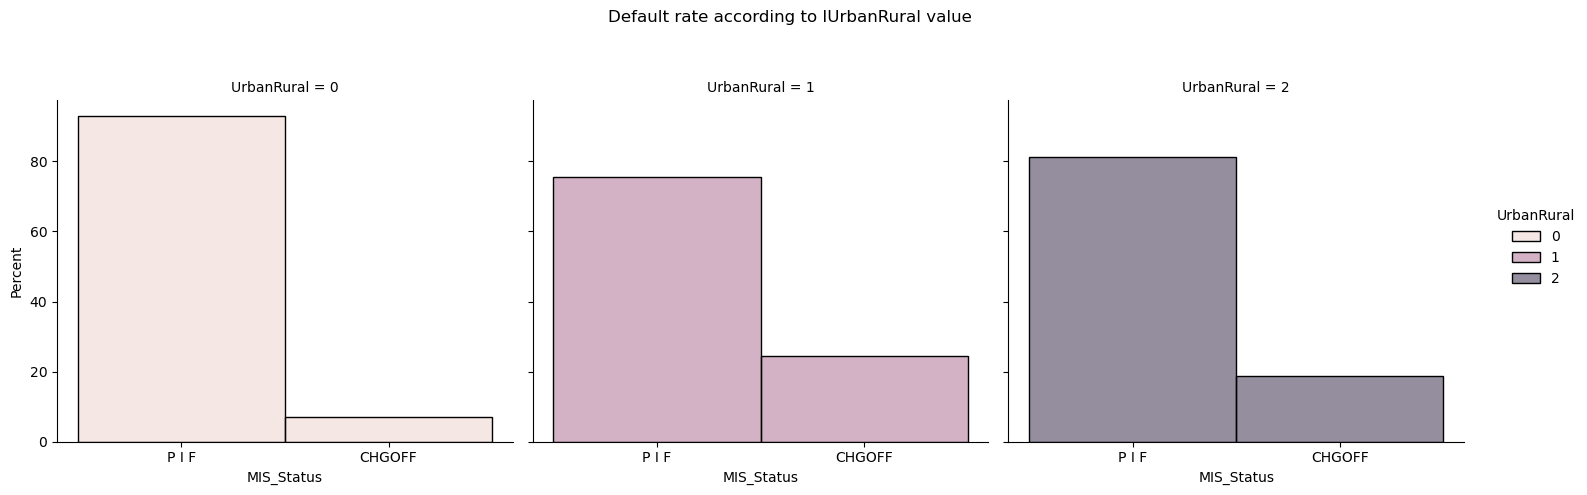

In [274]:
g=sns.displot(data=loans, x="MIS_Status", col="UrbanRural", hue="UrbanRural", stat='percent', common_norm=False);
g.fig.suptitle('Default rate according to IUrbanRural value')
g.fig.subplots_adjust(top=.8)

In [29]:
urban_vs_MIS_Status = loans.groupby('UrbanRural', dropna=False)['MIS_Status'].describe()
urban_vs_MIS_Status['percent']=urban_vs_MIS_Status['freq']/urban_vs_MIS_Status['count'] # In this column we have the percentage
#of data that have the mode value, that is, the percentage of loans paid in full.
urban_vs_MIS_Status

count unique    top    freq   percent
UrbanRural                                        
0           322826      2  P I F  299848  0.928822
1           469281      2  P I F  354414  0.755228
2           105060      2  P I F   85347  0.812364

We do not see a big difference in whether it is urban or not. We see a bigger difference if it is indefinite. This difference is also not due to chance:

In [30]:
sample_0 = loans_copy[loans['UrbanRural']==0]['MIS_Status_numeric']
sample_1 = loans_copy[loans['UrbanRural']==1]['MIS_Status_numeric']

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 0.0
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


Then it is not the same not to be urban and to have 0 in rural urban. It happens like with newexist, we don't know exactly what it is. Unlike newexist, urban rural value 0 has more than 50% participation but has no nulls:

In [275]:
loans.stb.freq(['UrbanRural'])

UrbanRural   count    percent  cumulative_count  cumulative_percent
0           1  470654  52.343510            470654            52.34351
1           0  323167  35.940829            793821            88.28434
2           2  105343  11.715660            899164           100.00000

----------------------------------------------------------------------

Another field that could provide us with information is 'FranchiseCode'. Let's look at it quickly.

In [276]:
loans.stb.freq(['FranchiseCode'])

FranchiseCode   count    percent  cumulative_count  cumulative_percent
0                 1  638554  71.016411            638554           71.016411
1                 0  208835  23.225463            847389           94.241874
2             78760    3373   0.375126            850762           94.617000
3             68020    1921   0.213643            852683           94.830643
4             50564    1034   0.114996            853717           94.945638
...             ...     ...        ...               ...                 ...
2763            837       1   0.000111            899160           99.999555
2764            827       1   0.000111            899161           99.999666
2765            456       1   0.000111            899162           99.999778
2766            426       1   0.000111            899163           99.999889
2767            404       1   0.000111            899164          100.000000

[2768 rows x 5 columns]

The franchise code itself is not going to give us useful information, there are too many different values to include it in a predictive model and we have no way of knowing what each code represents. On the other hand, it does seem useful to us to have indicated if it is a franchise or not. According to the information in the dataset, if the code is 0 or 1 it is not a franchise, the rest of the codes mean that it is. So we are going to replace the franchise code field with a field that tells us if it is a franchise or not.

### First insights and conclusions

*   The LoanNr_ChkDgt column is an id so it must be removed.
*   Column 9, that is, ApprovalFY, has multiple types. It should be a date format (if it is date) or integer (if it is year).
*   Columns Name, City, State, Bank, BankState, NewExist, RevLineCr, LowDoc, ChgOffDate, DisbursementDate, MIS_Status have null values.

    The Name, Bank, and ChgOffDate columns we don't think are important and we will remove them. The first 2 because they have too many different values and we don't think they can be included in a model. The third clearly has no predictive value because it indicates the date the default started (if any).
    
     On the other hand, MIS_Status is critical, and all rows with null MIS_Status should be removed as it is the target variable.
*   The NAICS column has zeros. The zeros in this case represent null values. They are more than 22% of the cases.
*   The DisbursementGross, BalanceGross, GrAppv, and SBA_Appv columns are currency values and should be passed to numbers (int or float).
*   The ApprovalDate, DisbursementDate, and ChgOffDate is date data, but they are as strings. In any case, since they are date variables, they are influenced by contextual and unpredictable issues and by themselves cannot be in a predictive model. Before assembling the model we are going to remove them.
*   There are rows with identical data, rows with duplicate data will be removed.
*   The first two digits of the NAICS column indicate the company's industry sector and should be taken as a new column. The third is the subsector of that industry and we are going to check if it has an impact. Other than those two pieces of information, we don't think the original NAICS column is any more useful and we're going to remove it.
*   The RevLineCr field takes 18 different values when it should take 2. Same thing with LowDoc, it 8 different values when it should take 2. Im both fields, we are going to eliminate all the values that are not 'Y' or 'N', leaving them as NaN. Otherwise we run the risk of introducing an error that can dirty the model. For convenience, we are going to transform them into binary, where 'Y' is 1 and 'N' is 0.
*   The target variable, MIS_Status, would be better having it boolean, it would have to be transformed. we think that for clarity it is a good idea to rename it to 'Default'.
*   There is a clear relationship between the number of employees and the risk of non-payment. The greater the number of employees, the less risk. This relationship is not due to the company being new or not.
*   Loans where the NewExist variable has a value of 0, which is apparently the same as not being classified (null), have less risk of default than those with this variable well classified.

    The nulls of the NewExist variable will be filled with zeros.
    
    
*   Whether the company is rural or not does not have much impact on payments. It does have some incidence if it is categorized as indefinite.
*   It is necessary to do all the mentioned transformations to be able to graph and try to answer most of the questions.
*   The only useful information that the 'FranchiseCode' field gives us is if the company is a franchise or not. We are going to replace this field with a field that simply indicates whether it is a franchise or not.

### Transformation and creation of fields

#### Pending transformations of the first contact

Let's apply the transformations that we saw necessary in the first part of the EDA.

Looking at the first values of the 'ApprovalFY' column we see that it should be an integer since it is the number of the fiscal year of loan approval. But there is a problem, you can check that NOT all the rows are a pure year. So let's first load that column as a string and then clean up the errors.

In [32]:
loans = pd.read_csv(path + "Should This Loan be Approved or Denied.csv", dtype={'ApprovalFY': str})

In [33]:
print (loans[~loans['ApprovalFY'].str.isdigit()].ApprovalFY) #These are all the rows where the field is not a pure number.

699732    1976A
704030    1976A
705375    1976A
710381    1976A
713245    1976A
748029    1976A
751519    1976A
769515    1976A
775002    1976A
775430    1976A
775978    1976A
776367    1976A
780120    1976A
781090    1976A
784351    1976A
788539    1976A
788661    1976A
793733    1976A
Name: ApprovalFY, dtype: object


In [34]:
loans['ApprovalFY']=loans['ApprovalFY'].str.replace("1976A","1976")    
loans['ApprovalFY']=loans['ApprovalFY'].astype('int')

Now that problem has disappeared, the ApprovalFY field has only one type:

In [35]:
for column in loans.columns:
  print(column, ' ---> ', pd.api.types.infer_dtype(loans[column]))

LoanNr_ChkDgt  --->  integer
Name  --->  string
City  --->  string
State  --->  string
Zip  --->  integer
Bank  --->  string
BankState  --->  string
NAICS  --->  integer
ApprovalDate  --->  string
ApprovalFY  --->  integer
Term  --->  integer
NoEmp  --->  integer
NewExist  --->  floating
CreateJob  --->  integer
RetainedJob  --->  integer
FranchiseCode  --->  integer
UrbanRural  --->  integer
RevLineCr  --->  string
LowDoc  --->  string
ChgOffDate  --->  string
DisbursementDate  --->  string
DisbursementGross  --->  string
BalanceGross  --->  string
MIS_Status  --->  string
ChgOffPrinGr  --->  string
GrAppv  --->  string
SBA_Appv  --->  string


----------------------------------------------------------

Let's throw out the id column:

In [36]:
loans.drop(['LoanNr_ChkDgt'], axis=1, inplace=True);

----------------------------------------------------------

Now we convert the currency fields 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv' into float format.

In [37]:
loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']] = (loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']]).replace({"[\$]": "", "[,]": ""}, regex=True) 
loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']]=loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].astype('float')

Now, the fields 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv' are in correct format:


In [38]:
loans[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']].head()

DisbursementGross  BalanceGross    GrAppv  SBA_Appv
0            60000.0           0.0   60000.0   48000.0
1            40000.0           0.0   40000.0   32000.0
2           287000.0           0.0  287000.0  215250.0
3            35000.0           0.0   35000.0   28000.0
4           229000.0           0.0  229000.0  229000.0

----------------------------------------------------------

Let's delete duplicate entries.

In [39]:
loans.duplicated().sum()

128

In [40]:
loans.drop_duplicates(inplace=True)

In [41]:
loans.duplicated().sum()

0

----------------------------------------------------------

Let's replace the field 'FranchiseCode'.

In [42]:
def change_franchise(x):
    if (x == 1) | (x == 0):
        return 0
    else :
        return 1

In [43]:
loans['Is_franchise'] = loans['FranchiseCode'].apply(lambda x: change_franchise(x))

In [44]:
loans.drop(['FranchiseCode'], axis=1,inplace=True)

----------------------------------------------------------

Let's convert the 'MIS_Status' column in a boolean column. In order not to have a problem with some commands, we are going to set them with the values 0 and 1.We are going to call this new column 'Default', so that the value 1 means that the loan had problems in its payment.

In [45]:
loans['Default'] = loans['MIS_Status']=='CHGOFF'#This new column is True if there were problems with the payment, and False if not.
loans['Default'] = loans['Default'].astype(int) #We go to binary.

Because of the way we created this new column, the null values of 'MIS_Status' are zeros of 'Default', but in reality they should be nulls of 'Default' as well. Also remember that rows with null values in 'MIS_Status' must be deleted, so we can directly delete those rows and then the values of 'Default' will be correct.

In [46]:
loans.dropna(axis=0, subset=['MIS_Status'], inplace=True)

Now, we can delete 'MIS_Status' column .

In [47]:
loans.drop(['MIS_Status'], axis=1,inplace=True);

----------------------------------------------------------

Although the ApprovalDate, DisbursementDate, and ChgOffDate will be eliminated later because it does not have a predictive value. It will be interesting to plot them to see what incidence the dates on which the events occur have. So let's transform them to date format. Let's see first what format they have.

In [48]:
print(pd.api.types.infer_dtype(loans['ApprovalDate']))
print(pd.api.types.infer_dtype(loans['DisbursementDate']))
print(pd.api.types.infer_dtype(loans['ChgOffDate']))

string
string
string


In [49]:
loans[['ApprovalDate', 'DisbursementDate', 'ChgOffDate']].sample(5)

ApprovalDate DisbursementDate ChgOffDate
154795    15-Nov-06        30-Nov-06        NaN
246263    25-Jan-99        30-Jun-99        NaN
49430     21-Jul-05        31-Aug-05        NaN
492997     1-Jul-11         1-Aug-11        NaN
628297    10-Apr-03        31-Jul-03        NaN

Let's remember that the 'ChgOffDate' column only has content on the loans that had no problems.

In [50]:
print(loans[loans['Default']==True].ChgOffDate.sample(15));

202245    28-Apr-10
227003    19-Nov-09
784021    11-Oct-07
381753     1-Jul-11
323124    21-Dec-10
104888    31-Mar-10
177621    28-Nov-88
62873     10-Apr-12
194831    21-Jun-12
253097    29-Jan-02
144903    22-May-08
447454    14-Aug-13
502902     3-Jul-14
154753    16-May-11
121807    22-Dec-09
Name: ChgOffDate, dtype: object


The three columns have a conflicting format because they contain the last two digits of the year, which does not allow them to be transformed directly. Doing a little analysis you can see that the loans are not older than 1966: 

In [51]:
print(loans['ApprovalFY'].min())
print(loans['ApprovalFY'].max())

1966
2014


So it is not difficult to know what should be put in the first two digits of the year.

We make a function that reformats those fields to proper dates.


In [52]:
def clean_date(date_str): 
  '''If a cell is in the format DD-MM-YY where YY are the last two digits of a 
  year between 1924 and 2023, transforms it to DD-MM-YYYY.'''
  if pd.isna(date_str)!=True: #If the string is null, we do nothing.
    date_list = date_str.split('-') 
    if (len(date_list[2])<3):

      if int(date_list[2])<23:
        date_list[2] = '20' + date_list[2]
      else:
        date_list[2] = '19' + date_list[2]
  else:
    date_list=''
  return '-'.join(date_list)

Let's apply this function to the dates fields.

In [53]:
loans['ApprovalDate']=loans['ApprovalDate'].apply(clean_date)
loans['ApprovalDate'] = pd.to_datetime(loans['ApprovalDate'], format='%d-%b-%Y')

In [54]:
loans['DisbursementDate']=(loans['DisbursementDate']).apply(clean_date)
loans['DisbursementDate'] = pd.to_datetime(loans['DisbursementDate'], format='%d-%b-%Y', errors='coerce') #The option 
#errors='coerces' is set to be able to treat nulls, in the previous conversion it was not necessary because it 
#did not have nulls.

In [55]:
loans['ChgOffDate']=(loans['ChgOffDate']).apply(clean_date)
loans['ChgOffDate'] = pd.to_datetime(loans['ChgOffDate'], format='%d-%b-%Y', errors='coerce') 

Now those columns were properly formatted:

In [56]:
loans[['ApprovalDate', 'DisbursementDate', 'ChgOffDate']].sample(15)

ApprovalDate DisbursementDate ChgOffDate
333623   1988-10-28       1989-01-31        NaT
58975    2005-09-08       2005-10-31 2009-10-16
894295   1997-01-10       1997-07-31        NaT
830073   2005-06-08       2005-06-30 2010-07-19
332626   2009-02-11       2009-03-31        NaT
50512    2005-07-27       2005-10-31 2010-03-23
824072   1995-11-30       1996-01-31        NaT
91698    2006-02-27       2006-03-31        NaT
456145   1991-03-29       1991-10-31        NaT
431625   2001-01-04       2001-03-31        NaT
101864   1997-12-19       1998-02-28        NaT
438400   2001-01-29       2001-05-31        NaT
509506   2001-09-21       2001-11-30        NaT
607027   1993-10-29       1994-01-31 2002-12-11
807631   2005-02-28       2005-03-31        NaT

In [57]:
print(pd.api.types.infer_dtype(loans['ApprovalDate']))
print(pd.api.types.infer_dtype(loans['DisbursementDate']))
print(pd.api.types.infer_dtype(loans['ChgOffDate']))

datetime64
datetime64
datetime64


-----------------------------------------------------------------------------------

Let's make the changes we mentioned to the 'RevLineCr' and 'LowDoc' columns.

In [58]:
def Y_and_N_to_binary(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0

In [59]:
# We remove 'RevLineCr' values that shouldn't be there.
loans.loc[~loans['RevLineCr'].isin(['Y', 'N']), 'RevLineCr']=np.nan
# We convert the field in a binary field.
loans['RevLineCr']= loans['RevLineCr'].apply(lambda x: Y_and_N_to_binary(x))

In [60]:
# We remove 'LowDoc' values that shouldn't be there.
loans.loc[~loans['LowDoc'].isin(['Y', 'N']), 'LowDoc']=np.nan 
# We convert the field in a binary field.
loans['LowDoc']= loans['LowDoc'].apply(lambda x: Y_and_N_to_binary(x))

----------------------------------------------------------

Let's create the Sector field.

In [61]:
loans['Sector'] = (loans['NAICS'].astype(str).str[:2])#The str[:2] command extracts the first two digits,
#but it has to be a string, so we put .astype(str) before it.

In the appendix we explore the creation of a subsector field. Based on that, we decided not to include it because we don't think it would contribute much.

### More fields and a little more cleaning

Let's look at the data in the date fields.

In [62]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897072 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Name               897058 non-null  object        
 1   City               897042 non-null  object        
 2   State              897059 non-null  object        
 3   Zip                897072 non-null  int64         
 4   Bank               895567 non-null  object        
 5   BankState          895560 non-null  object        
 6   NAICS              897072 non-null  int64         
 7   ApprovalDate       897072 non-null  datetime64[ns]
 8   ApprovalFY         897072 non-null  int32         
 9   Term               897072 non-null  int64         
 10  NoEmp              897072 non-null  int64         
 11  NewExist           896938 non-null  float64       
 12  CreateJob          897072 non-null  int64         
 13  RetainedJob        897072 non-null  int64        

In [63]:
loans.describe(include = 'all').T

count  unique                         top    freq   
Name                 897058  778679                      SUBWAY    1269  \
City                 897042   32566                 LOS ANGELES   11550   
State                897059      51                          CA  130462   
Zip                897072.0     NaN                         NaN     NaN   
Bank                 895567    5801  BANK OF AMERICA NATL ASSOC   86768   
BankState            895560      56                          CA  118014   
NAICS              897072.0     NaN                         NaN     NaN   
ApprovalDate         897072     NaN                         NaN     NaN   
ApprovalFY         897072.0     NaN                         NaN     NaN   
Term               897072.0     NaN                         NaN     NaN   
NoEmp              897072.0     NaN                         NaN     NaN   
NewExist           896938.0     NaN                         NaN     NaN   
CreateJob          897072.0     NaN                         NaN     NaN   
RetainedJob        897072.0     NaN                         NaN     NaN   
UrbanRural         897072.0     NaN                         NaN     NaN   
RevLineCr          619832.0     NaN                         NaN     NaN   
LowDoc             891074.0     NaN                         NaN     NaN   
ChgOffDate           162437     NaN                         NaN     NaN   
DisbursementDate     894897     NaN                         NaN     NaN   
DisbursementGross  897072.0     NaN                         NaN     NaN   
BalanceGross       897072.0     NaN                         NaN     NaN   
ChgOffPrinGr         897072   83106                      $0.00   735318   
GrAppv             897072.0     NaN                         NaN     NaN   
SBA_Appv           897072.0     NaN                         NaN     NaN   
Is_franchise       897072.0     NaN                         NaN     NaN   
Default            897072.0     NaN                         NaN     NaN   
Sector               897072      25                           0  201657   

                                            mean                  min   
Name                                         NaN                  NaN  \
City                                         NaN                  NaN   
State                                        NaN                  NaN   
Zip                                 53856.416209                  0.0   
Bank                                         NaN                  NaN   
BankState                                    NaN                  NaN   
NAICS                              398546.333664                  0.0   
ApprovalDate       2001-05-28 09:48:25.580822784  1966-05-18 00:00:00   
ApprovalFY                           2001.139639               1966.0   
Term                                  110.851919                  0.0   
NoEmp                                  11.410908                  0.0   
NewExist                                1.280413                  0.0   
CreateJob                               8.444346                  0.0   
RetainedJob                            10.807413                  0.0   
UrbanRural                              0.757283                  0.0   
RevLineCr                               0.323723                  0.0   
LowDoc                                  0.123636                  0.0   
ChgOffDate         2008-07-05 10:11:15.998695424  1926-10-22 00:00:00   
DisbursementDate   2001-09-16 20:34:36.590267008  1928-06-18 00:00:00   
DisbursementGross                  201597.232526               4000.0   
BalanceGross                             2.99632                  0.0   
ChgOffPrinGr                                 NaN                  NaN   
GrAppv                             193057.823886               1000.0   
SBA_Appv                            149779.00372                500.0   
Is_franchise                            0.057663                  0.0   
Default                

We see that the minimum values of 'ChgOffPrinGr' and 'DisbursementeDate' are errors, since we have already seen that there are no loans prior to the year 1966.

In [64]:
print(loans['ChgOffDate'].sort_values())

598791   1926-10-22
45932    1988-10-03
39407    1988-10-03
231281   1988-10-03
92765    1988-10-03
            ...    
899158          NaT
899159          NaT
899160          NaT
899161          NaT
899163          NaT
Name: ChgOffDate, Length: 897072, dtype: datetime64[ns]


In [65]:
loans.loc[598791]

Name                        AMG INDUSTRIES, INC.
City                                 GLENS FALLS
State                                         NY
Zip                                        12804
Bank                 GLENS FALLS NATL BK & TR CO
BankState                                     NY
NAICS                                          0
ApprovalDate                 1993-09-14 00:00:00
ApprovalFY                                  1993
Term                                          66
NoEmp                                         85
NewExist                                     1.0
CreateJob                                      0
RetainedJob                                    0
UrbanRural                                     0
RevLineCr                                    0.0
LowDoc                                       0.0
ChgOffDate                   1926-10-22 00:00:00
DisbursementDate             1994-01-31 00:00:00
DisbursementGross                       300000.0
BalanceGross        

The loan was approved in 1993, but there were payment problems in 1926. It is clearly a mistake. On the other hand, the rest of the fields seem coherent. So since this column is going to be deleted at the end, we can ignore it. In any case, we are going to delete this value so that when we graph with respect to this parameter the graphs do not change the scale.

In [66]:
loans['ChgOffDate'].replace('1926-10-22 00:00:00', np.nan, inplace=True)

The same goes for the minimum value and the maximum value of 'DisbursementDate'.

In [67]:
print(loans['DisbursementDate'].sort_values())
print('------------------------------------------------------------')
print(loans['DisbursementDate'].sort_values(ascending=False))

642915   1928-06-18
54648    1948-09-17
49244    1966-08-16
697801   1968-03-19
732056   1968-11-22
            ...    
896387          NaT
897215          NaT
897268          NaT
897488          NaT
897494          NaT
Name: DisbursementDate, Length: 897072, dtype: datetime64[ns]
------------------------------------------------------------
379815   2020-04-14
709337   2014-12-31
402166   2014-07-30
498326   2014-07-05
669507   2014-06-30
            ...    
896387          NaT
897215          NaT
897268          NaT
897488          NaT
897494          NaT
Name: DisbursementDate, Length: 897072, dtype: datetime64[ns]


In [68]:
print(loans.loc[642915])
print('------------------------------------------------------------')
print(loans.loc[54648 ])
print('------------------------------------------------------------')
print(loans.loc[379815])

Name                           KINGS INN
City                             SEATTLE
State                                 WA
Zip                                98121
Bank                           BBCN BANK
BankState                             CA
NAICS                             721110
ApprovalDate         2003-06-18 00:00:00
ApprovalFY                          2003
Term                                 300
NoEmp                                 12
NewExist                             1.0
CreateJob                              0
RetainedJob                            0
UrbanRural                             1
RevLineCr                            0.0
LowDoc                               0.0
ChgOffDate                           NaT
DisbursementDate     1928-06-18 00:00:00
DisbursementGross              1330000.0
BalanceGross                         0.0
ChgOffPrinGr                      $0.00 
GrAppv                         1330000.0
SBA_Appv                        997500.0
Is_franchise    

As before, the rest of the columns appear to contain correct data so we simply delete those values so we don't get scale broken in later visualizations.

In [69]:
loans['DisbursementDate'].replace('1928-06-18', np.nan, inplace=True)
loans['DisbursementDate'].replace('1948-09-17', np.nan, inplace=True)
loans['DisbursementDate'].replace('2020-04-14', np.nan, inplace=True)

----------------------------------------------------------------------------------------------

In the next part of the analysis we are going to analyze the terms of the loans and other date variables. It will be useful to create some fields related to this.

According to the accompanying documentation, the loans of 240 months or more are backed by real estate. This surely influences the default rate, so let's create a new variable indicating this.

In [70]:
def real_estate(x) :
    if x >= 240:
        return 1
    else:
        return 0
    
loans['Real_Estate'] = loans['Term'].apply(lambda x: real_estate(x)) # This field takes the value 1 if the
# loans is backed by real estate, and otherwise.


It's going to be useful to have separate years of loan approval and delivery, so we're going to create columns with those values. 

As we will see later, the period between approval and delivery can be several years. Let's create a field that measures the time difference between loan approval and loan delivery to see what impact it has on compliance. 


In [71]:
loans['DisbursementYear']=loans['DisbursementDate'].dt.year
loans['DisbursementYear']= loans['DisbursementYear'].astype('Int64') #We transform to Int64, because it doesn't 
#let transform to int when there are nulls.
loans['ApprovalYear']=loans['ApprovalDate'].dt.year
loans['ApprovalYear']= loans['ApprovalYear'].astype('Int64') #We transform to Int64, because it doesn't let transform to int when there are nulls.

In [72]:
loans['Days_waiting']=loans['DisbursementDate']-loans['ApprovalDate']

Since the economic situation influences payment compliance, we are going to create related variables. On one hand, we are going to create a variable that indicates whether the fiscal year of the loan was between 2007 and 2009, because the mortgage crisis occurred in those years.

On the other hand, in the appendix we try bringing external data from the most important stock market indices and inflation at the time the loan is granted, to analyze the relationship with defaults. The reason why we do it in the appendix is because the process is quite long and ended up not getting good enough results to include in the final model.

The easy part is to create a variable indicating whether the fiscal year is between 2007 and 2009:

In [73]:
loans['GreatRecession']=loans["ApprovalFY"].between(2007, 2009, inclusive='both')  
loans['GreatRecession'] = loans['GreatRecession'].astype(int) # We go to binary.

-------------------------------------------------------------------------

Another useful fields:

We create a new field which indicates if the company state is the same as the branch bank state or not.

In [74]:
loans['SameState']=loans['State'].eq(loans['BankState']) 

In [75]:
loans.loc[loans['BankState'].isnull(),'SameState']=np.nan # We want field 'SameState' to be null if field 'BankState' is null.
loans.loc[loans['State'].isnull(),'SameState']=np.nan # Same thing if the field State is null.

Fields quantifying the difference between the disbursed amount and the approved amount:

In [76]:
loans['Disb_vs_GrAppv']=loans['DisbursementGross']-loans['GrAppv']
loans['Disb_vs_GrAppv_is_positive']=loans['Disb_vs_GrAppv'].apply(lambda x: np.sign(x)*(np.sign(x)+1)/2) # This 
#formula makes the field equal to 1 if the difference is positive, and 0 otherwise.

----------------------------------------------------------------------------------------------

We are not going to use the NAICS column for anything else so we can throw it away. (The only problem would have been not being able to identify the 'NAICS' zeroes, but we just mentioned that the 'NAICS' zeroes translate exactly to zeros in 'Sector' and '' in 'Subsector').

In [77]:
#loans.to_pickle('Should This Loan be Approved or Denied - After first contact.pkl')

In [284]:
#loans = pd.read_pickle(path + 'Should This Loan be Approved or Denied - After first contact.pkl') 

In [285]:
loans.drop(['NAICS'], axis=1,inplace=True)

### A deeper analysis

Now that we've reformatted several columns, cleaned up the date fields, and added some useful columns, we can take a deeper look at the data and draw more conclusions regarding the questions asked in Business Target.

Let's make a correlation table for all the fields.

In [287]:
matrix_correlation = loans.corr(method='spearman', numeric_only = True) 
matrix_correlation

Zip  ApprovalFY      Term     NoEmp   
Zip                         1.000000   -0.037291  0.142021  0.058338  \
ApprovalFY                 -0.037291    1.000000 -0.297596 -0.226573   
Term                        0.142021   -0.297596  1.000000  0.200100   
NoEmp                       0.058338   -0.226573  0.200100  1.000000   
NewExist                   -0.045468    0.042463 -0.027447 -0.252421   
CreateJob                   0.025184    0.268305  0.081731  0.033290   
RetainedJob                -0.025046    0.545965 -0.157349  0.123323   
UrbanRural                 -0.070053    0.763407 -0.213597 -0.177841   
RevLineCr                  -0.047594    0.448100 -0.397727 -0.206860   
LowDoc                     -0.029773   -0.219559 -0.066778 -0.085551   
DisbursementGross           0.113149   -0.221462  0.522206  0.445449   
BalanceGross               -0.000501    0.002936 -0.000027 -0.000360   
GrAppv                      0.117162   -0.299925  0.558661  0.455376   
SBA_Appv                    0.129362   -0.365766  0.589981  0.449315   
Is_franchise                0.009281   -0.032068  0.075770  0.042903   
Default                    -0.003762    0.254399 -0.409594 -0.117281   
Real_Estate                 0.127360   -0.214148  0.656294  0.219412   
DisbursementYear           -0.042701    0.992589 -0.288247 -0.221966   
ApprovalYear               -0.036885    0.996481 -0.297365 -0.226622   
GreatRecession              0.012870    0.550360 -0.165812 -0.119818   
SameState                   0.057675   -0.246666  0.149682  0.131665   
Disb_vs_GrAppv             -0.053929    0.341142 -0.290763 -0.119598   
Disb_vs_GrAppv_is_positive -0.049046    0.382457 -0.300541 -0.133217   

                            NewExist  CreateJob  RetainedJob  UrbanRural   
Zip                        -0.045468   0.025184    -0.025046   -0.070053  \
ApprovalFY                  0.042463   0.268305     0.545965    0.763407   
Term                       -0.027447   0.081731    -0.157349   -0.213597   
NoEmp                      -0.252421   0.033290     0.123323   -0.177841   
NewExist                    1.000000   0.050815    -0.152636    0.028980   
CreateJob                   0.050815   1.000000     0.377038    0.230258   
RetainedJob                -0.152636   0.377038     1.000000    0.467357   
UrbanRural                  0.028980   0.230258     0.467357    1.000000   
RevLineCr                  -0.088781   0.106165     0.482753    0.466107   
LowDoc                      0.161950  -0.240514    -0.352983   -0.156158   
DisbursementGross          -0.091960   0.109542    -0.069480   -0.145382   
BalanceGross                0.001921   0.002555     0.000197    0.002411   
GrAppv                     -0.070764   0.093025    -0.137278   -0.201965   
SBA_Appv                   -0.049745   0.077309    -0.203792   -0.258091   
Is_franchise                0.141762   0.048917    -0.044925   -0.009801   
Default                     0.020103   0.052946     0.155498    0.172524   
Real_Estate                -0.099439   0.209166    -0.049672   -0.155246   
DisbursementYear            0.042517   0.276676     0.543449    0.762240   
ApprovalYear                0.042067   0.268834     0.546860    0.763224   
GreatRecession              0.042413   0.132232     0.256422    0.280670   
SameState                   0.034750  -0.020284    -0.242091   -0.165374   
Disb_vs_GrAppv             -0.067283   0.015011     0.275205    0.245620   
Disb_vs_GrAppv_is_positive -0.070915   0.031814     0.309325    0.283157   

                            RevLineCr    LowDoc  DisbursementGross   
Zip                         -0.047594 -0.029773           0.113149  \
ApprovalFY                   0.448100 -0.219559          -0.221462   
Term                        -0.397727 -0.066778           0.522206   
NoEmp                       -0.206860 -0.085551           0.445449   
NewExist                    -0.088781  0.161950          -0.091960   
CreateJob                    0.106165 -0.240514           0

We look at the pairs of variables whose Spearman correlation has an absolute value greater than or equal to 0.5.

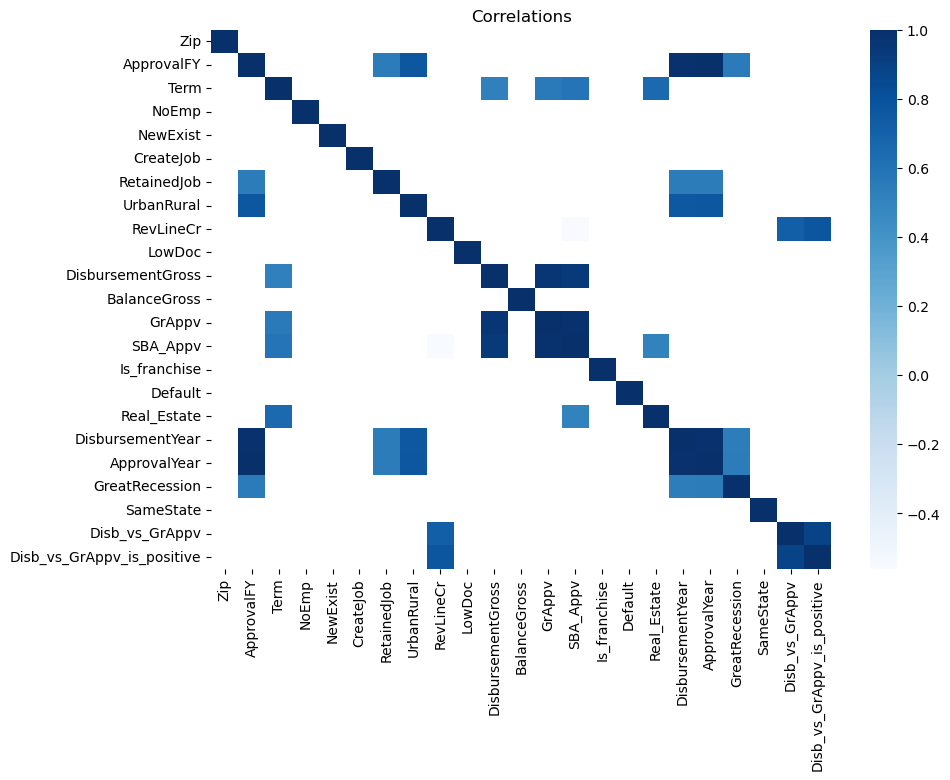

In [289]:
high_corr = matrix_correlation[np.abs(matrix_correlation)>=.5] 
plt.figure(figsize=(10,7))
sns.heatmap(high_corr, cmap="Blues")
plt.title('High correlations');

With one exception, in all correlated pairs one of the variables is a date or quantity variable. The date or amount variables will be removed from the machine learning model because they do not provide information, have no predictive value, or are unknown before the loan is approved.
The exception is the pair term and real estate, where the two are clearly correlated because real estate is a binary variable that only depends on the term value. We're going to leave them for now because the method doesn't find them to be that strongly correlated (0.656294). In any case, if after the selection of variables there are few variables left and they are both, we will eliminate one.

Another correlated variable that exists but is not detected by this method is the SameState variable. This variable indicates whether the variable State and BankState are equal. The method does not detect it because it only detects correlations between two variables, and not between a set of variables and another variable.

#### Banks

Let's analyze the banks that grant the loans. Will there be banks where there are more defaults than in others?

First let's look at how many different banks there are.

In [83]:
print(loans['Bank'].unique().size)

5802


In [292]:
loans.stb.freq(['Bank'])

Bank  count   percent  cumulative_count   
0         BANK OF AMERICA NATL ASSOC  86768  9.688611             86768  \
1        WELLS FARGO BANK NATL ASSOC  63459  7.085902            150227   
2     JPMORGAN CHASE BANK NATL ASSOC  48126  5.373802            198353   
3     U.S. BANK NATIONAL ASSOCIATION  35109  3.920310            233462   
4           CITIZENS BANK NATL ASSOC  33769  3.770684            267231   
...                              ...    ...       ...               ...   
5796       1ST NATL BK OF BROWNSTOWN      1  0.000112            895563   
5797            1ST NATL BK OF BARRY      1  0.000112            895564   
5798          1ST NATL BK IN TREMONT      1  0.000112            895565   
5799                 1ST LIB NATL BK      1  0.000112            895566   
5800    1ST & FARMERS BK HOLDING CO.      1  0.000112            895567   

      cumulative_percent  
0               9.688611  
1              16.774513  
2              22.148315  
3              26.068625  
4              29.839309  
...                  ...  
5796           99.999553  
5797           99.999665  
5798           99.999777  
5799           99.999888  
5800          100.000000  

[5801 rows x 5 columns]

We see that there are 5801 different banks, with very varied amounts of loans (when we ask for unique values it returns 5802 because it includes the case where the bank name is null). There are banks with tens of thousands of loans, while there are others with only one. 

In [293]:
group_bank= loans.groupby(['Bank']).agg(Default_rate=('Default', 'mean'), 
        Amount_of_loans=('Bank', 'count'), 
        Average_disbursement_amount=('DisbursementGross', 'mean')).sort_values(by=['Amount_of_loans'], 
                                                                               ascending=False)                                     
group_bank=group_bank.reset_index() # We put the bank as a column, creating a new index.
group_bank # Note that we order the banks from highest to lowest number of loans.

Bank  Default_rate  Amount_of_loans   
0         BANK OF AMERICA NATL ASSOC      0.275609            86768  \
1        WELLS FARGO BANK NATL ASSOC      0.141304            63459   
2     JPMORGAN CHASE BANK NATL ASSOC      0.275007            48126   
3     U.S. BANK NATIONAL ASSOCIATION      0.174685            35109   
4           CITIZENS BANK NATL ASSOC      0.223015            33769   
...                              ...           ...              ...   
5796         GATEWAY COMMERCIAL BANK      0.000000                1   
5797      TECHE BANK & TRUST COMPANY      1.000000                1   
5798         G W JONES EXCHANGE BANK      1.000000                1   
5799          AMER BK & TR WISCONSIN      0.000000                1   
5800    1ST & FARMERS BK HOLDING CO.      0.000000                1   

      Average_disbursement_amount  
0                    7.974725e+04  
1                    2.238968e+05  
2                    1.282564e+05  
3                    1.770605e+05  
4                    7.465729e+04  
...                           ...  
5796                 5.000000e+06  
5797                 2.600000e+05  
5798                 3.500000e+05  
5799                 3.500000e+04  
5800                 1.750000e+04  

[5801 rows x 4 columns]

Half of the banks have fewer than 10 loans:

In [86]:
group_bank['Amount_of_loans'].describe()

count     5801.000000
mean       154.381486
std       1831.563925
min          1.000000
25%          3.000000
50%          9.000000
75%         38.000000
max      86768.000000
Name: Amount_of_loans, dtype: float64

Let's see what happens with the default rate of each bank.

In [87]:
group_bank['Default_rate'].describe()

count    5801.000000
mean        0.171263
std         0.263405
min         0.000000
25%         0.000000
50%         0.076923
75%         0.200000
max         1.000000
Name: Default_rate, dtype: float64

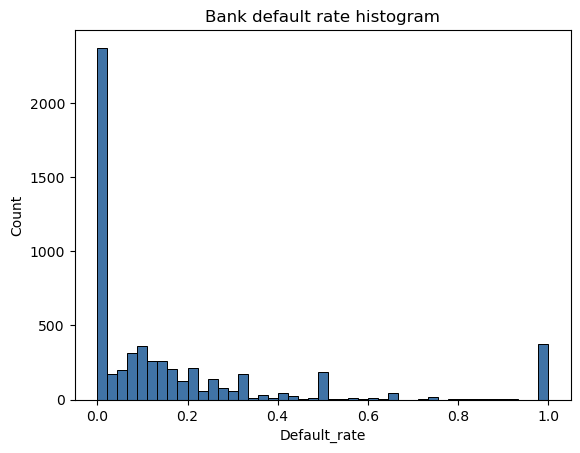

In [88]:
sns.histplot(x='Default_rate',
            data=group_bank,
            color='#004488').set(title='Bank default rate histogram');

50% of banks have a default rate of 7% or less, but this is because of what we just saw: Most banks have very few loans.

In [308]:
univariate_info(group_bank).T

Bank Default_rate Amount_of_loans   
Count                           5801         5801            5801  \
Type                          object      float64           int64   
Missing                            0            0               0   
Unique                          5801          979             548   
Numeric                        False         True            True   
top       BANK OF AMERICA NATL ASSOC            0               0   
mean                               0     0.171263      154.381486   
std                                0     0.263405     1831.563925   
min                                0          0.0             1.0   
25%                                0          0.0             3.0   
50%                                0     0.076923             9.0   
75%                                0          0.2            38.0   
max                                0          1.0         86768.0   
skew                               0     2.122214       32.205786   
kurtosis                           0     3.801009     1247.566492   

         Average_disbursement_amount  
Count                           5801  
Type                         float64  
Missing                            0  
Unique                          4864  
Numeric                         True  
top                                0  
mean                   225829.285905  
std                     218942.53426  
min                      9819.083024  
25%                         105400.0  
50%                    165833.333333  
75%                         275100.0  
max                        5000000.0  
skew                        5.414912  
kurtosis                   65.352001

If we take the banks with at least 5,000 loans, the story is very different: 

In [310]:
group_bank_5000=group_bank[group_bank['Amount_of_loans']>4999];
group_bank_5000=group_bank_5000.sort_values(by='Default_rate', ascending=False);
print(group_bank_5000.info());
# There are 27 banks with 5000 or more loans, now it is more reasonable to make 
#a plot by putting the bank on the x-axis.

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 6 to 20
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Bank                         27 non-null     object 
 1   Default_rate                 27 non-null     float64
 2   Amount_of_loans              27 non-null     int64  
 3   Average_disbursement_amount  27 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB
None


In [90]:
group_bank_5000

Bank  Default_rate  Amount_of_loans   
6                        BBCN BANK      0.549569            22978  \
18     BANCO POPULAR NORTH AMERICA      0.423232             7171   
7           CAPITAL ONE NATL ASSOC      0.413044            22247   
22       BUSINESS LOAN CENTER, LLC      0.309334             6278   
0       BANK OF AMERICA NATL ASSOC      0.275609            86768   
2   JPMORGAN CHASE BANK NATL ASSOC      0.275007            48126   
24                     UMPQUA BANK      0.266439             6144   
9            READYCAP LENDING, LLC      0.266223            10664   
4         CITIZENS BANK NATL ASSOC      0.223015            33769   
15         CALIFORNIA BANK & TRUST      0.210919             7510   
5   PNC BANK, NATIONAL ASSOCIATION      0.195427            27335   
14       ZIONS FIRST NATIONAL BANK      0.188459             7954   
16                  CITIBANK, N.A.      0.185438             7458   
3   U.S. BANK NATIONAL ASSOCIATION      0.174685            35109   
21                    COMPASS BANK      0.170223             6421   
19                   COMERICA BANK      0.161989             7019   
23   GE CAP. SMALL BUS. FINAN CORP      0.148261             6212   
1      WELLS FARGO BANK NATL ASSOC      0.141304            63459   
10    THE HUNTINGTON NATIONAL BANK      0.132722             9599   
26                FIFTH THIRD BANK      0.130443             5213   
8    MANUFACTURERS & TRADERS TR CO      0.128714            11242   
11    KEYBANK NATIONAL ASSOCIATION      0.118575             9260   
12   TD BANK, NATIONAL ASSOCIATION      0.108210             9001   
13              BRANCH BK. & TR CO      0.106442             8258   
17                    REGIONS BANK      0.084530             7240   
25        BMO HARRIS BK NATL ASSOC      0.072494             5228   
20                BANK OF THE WEST      0.064323             6685   

    Average_disbursement_amount  
6                  76862.195535  
18                209510.261191  
7                  58247.629478  
22                410210.697197  
0                  79747.253146  
2                 128256.378673  
24                218677.251953  
9                 449590.229089  
4                  74657.291125  
15                215731.078162  
5                 140818.873313  
14                147139.473472  
16                132857.816707  
3                 177060.458885  
21                225404.203551  
19                391907.867930  
23                426727.730039  
1                 223896.813123  
10                172390.770184  
26                208435.465951  
8                 154900.082903  
11                177254.452916  
12                194868.654483  
13                235728.385929  
17                215380.751243  
25                192224.195103  
20                281156.924159

In [312]:
univariate_info(group_bank_5000).T

Bank Default_rate Amount_of_loans Average_disbursement_amount
Count            27           27              27                          27
Type         object      float64           int64                     float64
Missing           0            0               0                           0
Unique           27           27              27                          27
Numeric       False         True            True                        True
top       BBCN BANK            0               0                           0
mean              0     0.204616    17938.814815               208134.932794
std               0     0.115243     20074.95249               105303.897665
min               0     0.064323          5213.0                58247.629478
25%               0     0.129578          6852.0               143979.173393
50%               0     0.174685          8258.0               194868.654483
75%               0     0.266331         22612.5               224650.508337
max               0     0.549569         86768.0               449590.229089
skew              0     1.405746        2.235856                    0.979926
kurtosis          0     2.056305        4.966989                    0.572549

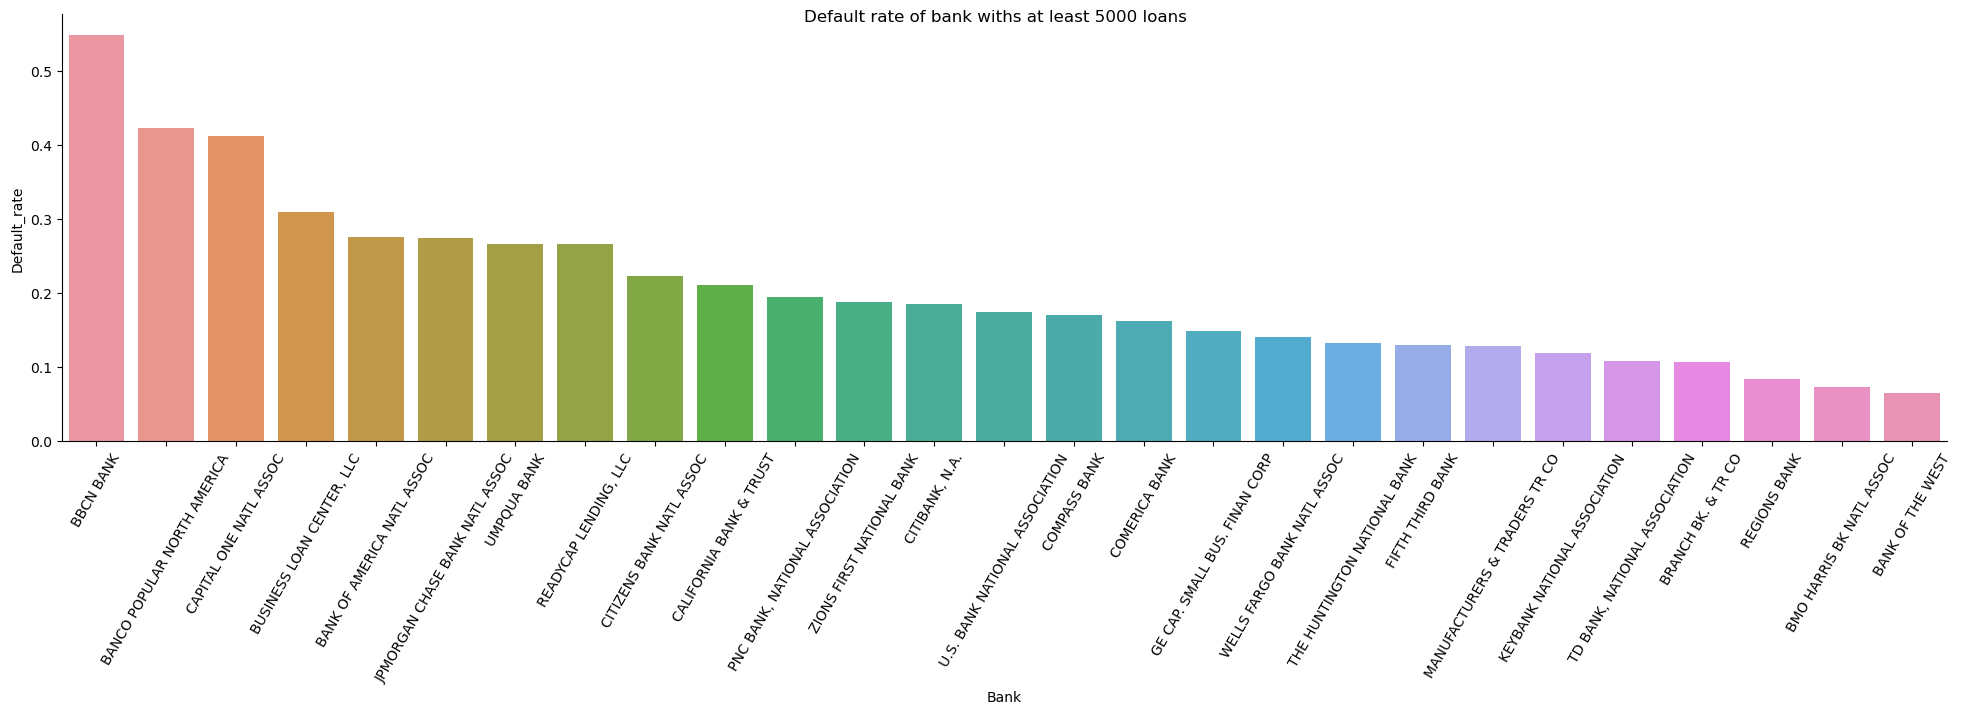

In [91]:
g=sns.catplot( data=group_bank_5000, x="Bank", y="Default_rate", kind="bar", aspect=4);
g.set_xticklabels(rotation=60);
g.fig.suptitle('Default rate of bank withs at least 5000 loans');

Wrapping up, the default rate is closely related to the bank, although we are not sure if this will help us to build a predictive model due to the large number of banks, at least without ruling out 'Bank' column.

Another idea we can explore is this: In a way, the amount of a bank's loans is a measure of how important it is. Will the default rate depend on how important it is? Or in terms of our data, is there a correlation between the default rate and the number of loans each bank took out?

The answer to this is no, but we leave this analysis in the appendix as it would be going too far off topic.

#### States

We ask ourselves how much is the incidence of the company's state of origin in the repayment of the loans.



In [352]:
loans.groupby('State')['Default'].describe().sort_values('mean', ascending=False).style.set_caption('Default vs. State (the mean column indicates the default rate of each state).').set_table_styles(styles)

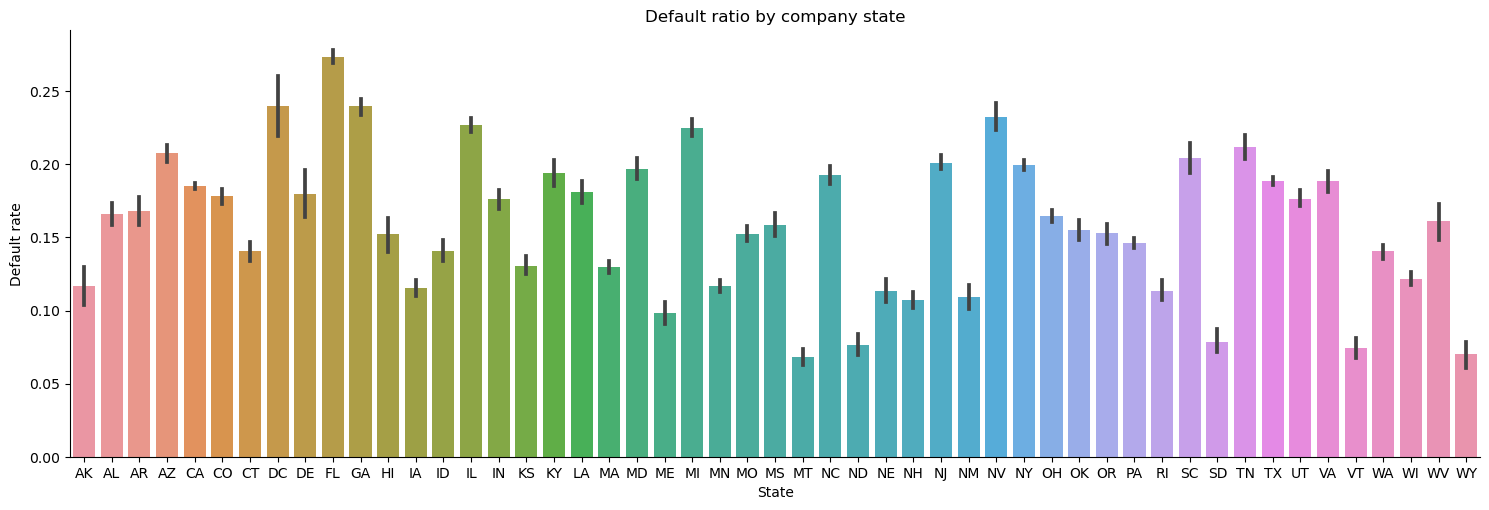

In [93]:
sns.catplot( data=loans.sort_values(by='State'), x="State", y="Default", kind="bar", aspect=3); # On the y-axis plots
#an average of 'Default' field. That is, the default ratio.
plt.ylabel('Default rate');
plt.title("Default ratio by company state");

#Versión en español
#plt.title("Tasa de default por estado origen de la empresa", size=12);
#plt.xlabel("Estado de la empresa", size=10)
#plt.ylabel("Tasa de default", size=10)
#plt.tight_layout()
#plt.savefig("Default_by_company_state.png", dpi=100)

(The lines over the bars indicate a 95% confidence interval of the mean assuming random sampling).

We see that there are states where the risk of default is significantly higher than in others. This may be due to employment laws, the wealth of the state, and cultural factors.

##### Will the same happen with the state of the bank?

One thing one might be tempted to do is look at banks by state where they are located. But it would be a mistake to look at things this way because the data we have (the 'BankState' field) is the state where the **branch** of the bank that made the loan is located. That is, each 'bank is in many states. For example:

In [585]:
loans[loans['Bank']=='BANK OF AMERICA NATL ASSOC'][['Bank', 'BankState']].head(15)

Bank BankState
11  BANK OF AMERICA NATL ASSOC        OR
15  BANK OF AMERICA NATL ASSOC        NC
17  BANK OF AMERICA NATL ASSOC        MD
22  BANK OF AMERICA NATL ASSOC        RI
26  BANK OF AMERICA NATL ASSOC        NC
45  BANK OF AMERICA NATL ASSOC        MA
51  BANK OF AMERICA NATL ASSOC        MA
53  BANK OF AMERICA NATL ASSOC        RI
66  BANK OF AMERICA NATL ASSOC        WA
73  BANK OF AMERICA NATL ASSOC        NC
74  BANK OF AMERICA NATL ASSOC        MI
75  BANK OF AMERICA NATL ASSOC        MA
82  BANK OF AMERICA NATL ASSOC        MA
85  BANK OF AMERICA NATL ASSOC        RI
86  BANK OF AMERICA NATL ASSOC        MA

So the idea of grouping banks by "their" state doesn't make sense, BankState is actually the state of the bank branch. Keeping this in mind from now on (even though we sometimes  write bank state), let's look at the default rate on each bank branch state.

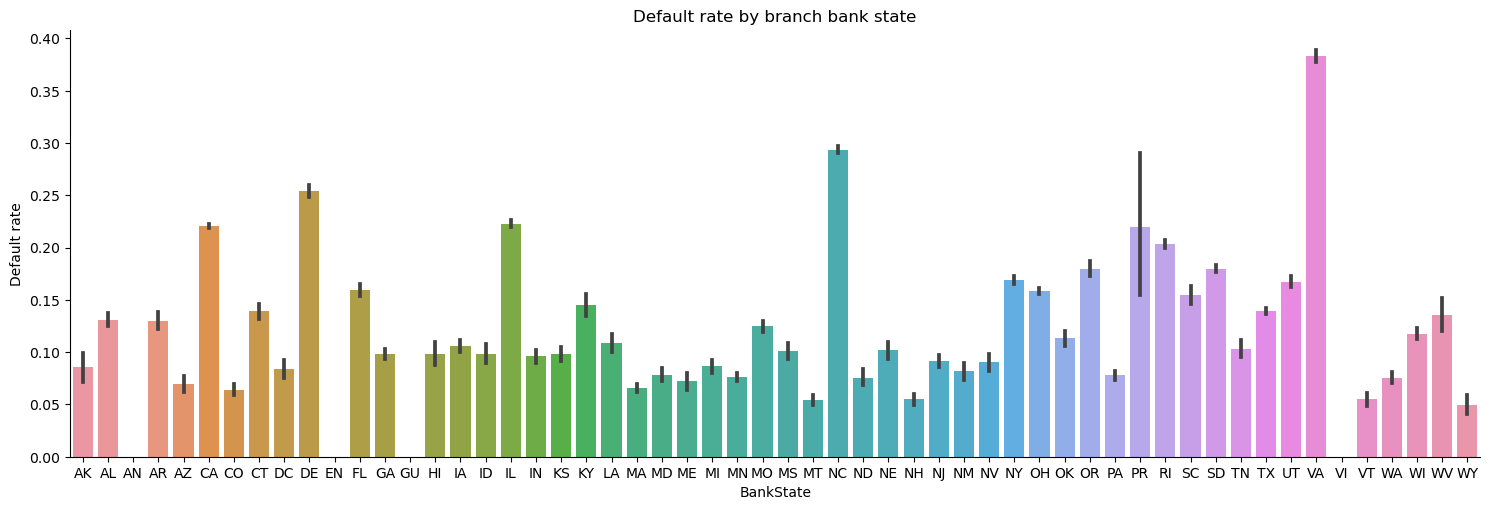

In [94]:
sns.catplot( data=loans.sort_values(by='BankState'), x="BankState", y="Default", kind="bar", aspect=3); 
plt.ylabel('Default rate');
plt.title("Default rate by branch bank state");

#plt.ylabel("Tasa de default", size=10)
#plt.title("Tasa de default por estado de la sucursal bancaria", size=12);
#plt.xlabel("Estado de la sucursal bancaria", size=10)


#plt.tight_layout()
#plt.savefig("Default_by_bank_state.png", dpi=100)

In [351]:
loans.groupby('BankState')['Default'].describe().sort_values('mean', ascending=False).style.set_caption('Default vs. Bank State (the mean column indicates the default rate of each bank state).').set_table_styles(styles)

It is interesting to see that the differences in the default rate with respect to the state of the bank branch is even greater than the differences regarding the state of the company. For example, if the bank is from VA (Virginia) the drawbacks are around 40%. A really high value.

Something interesting to look at is the relationship between the state of the company and that of the bank branch.

##### How are the state of the company and that of the branch related to the default rate?

Here is the default rate table of State vs. BankState:

In [591]:
State_vs_BankState_default=loans.pivot_table(index='State', columns=['BankState'], values=['Default'], aggfunc='mean', margins = True, margins_name='Total default rate')
print('Default rate:')
print(State_vs_BankState_default)

Default rate:
                     Default                                                
BankState                 AK        AL   AN        AR        AZ        CA   
State                                                                       
AK                  0.077849       NaN  NaN  0.333333       NaN  0.444444  \
AL                  1.000000  0.089157  NaN  0.111111  0.000000  0.538951   
AR                       NaN  0.216495  NaN  0.138959  0.000000  0.538462   
AZ                  1.000000  0.267574  NaN       NaN  0.059315  0.221585   
CA                  0.500000  0.511628  NaN  0.000000  0.155172  0.125979   
CO                  0.000000  0.382637  NaN  0.200000  0.157895  0.259858   
CT                       NaN  0.000000  NaN       NaN       NaN  0.211302   
DC                       NaN       NaN  NaN       NaN       NaN  0.484407   
DE                       NaN  0.000000  0.0  0.000000       NaN  0.500000   
FL                       NaN  0.144737  NaN  0.250000  1.00000

The tables is too big to understand anything, let's make a heatmap.

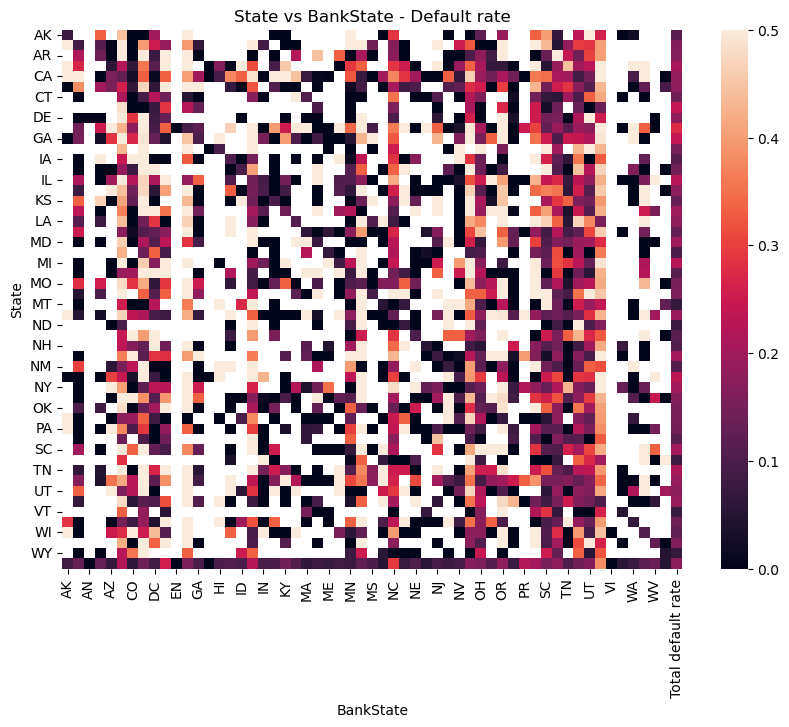

In [599]:
plt.figure(figsize=(10,7))
sns.heatmap(State_vs_BankState_default['Default'],vmax=0.5)
plt.title('State vs BankState - Default rate');

Note that the diagonal is close to black, which means that the default rate is very low in this case. But we have to be a bit careful because if you look at the state of the company and the state of the branch bank, the default rate in most of these combinations is calculated based on too few values to draw statistically reliable conclusions:

In [595]:
print('Number of loans:')
State_vs_BankState_count=loans.pivot_table(index='State', columns=['BankState'], values=['Default'], aggfunc='count', margins = True, margins_name='Total counts')
print(State_vs_BankState_count)

Number of loans:
             Default                                                            
BankState         AK       AL   AN      AR      AZ        CA       CO      CT   
State                                                                           
AK            1413.0      NaN  NaN     3.0     NaN     144.0      3.0     3.0  \
AL               1.0   5395.0  NaN     9.0     1.0     629.0      4.0     5.0   
AR               NaN     97.0  NaN  4764.0     2.0     208.0      1.0     4.0   
AZ               3.0    441.0  NaN     NaN  3709.0    1918.0    185.0    81.0   
CA               2.0     43.0  NaN     2.0    58.0   76378.0   1997.0   127.0   
CO               1.0    311.0  NaN     5.0    19.0    1978.0   7618.0    17.0   
CT               NaN      3.0  NaN     NaN     NaN     407.0      1.0  5475.0   
DC               NaN      NaN  NaN     NaN     NaN     481.0      1.0    10.0   
DE               NaN      1.0  1.0     1.0     NaN     126.0      7.0     2.0   
FL         

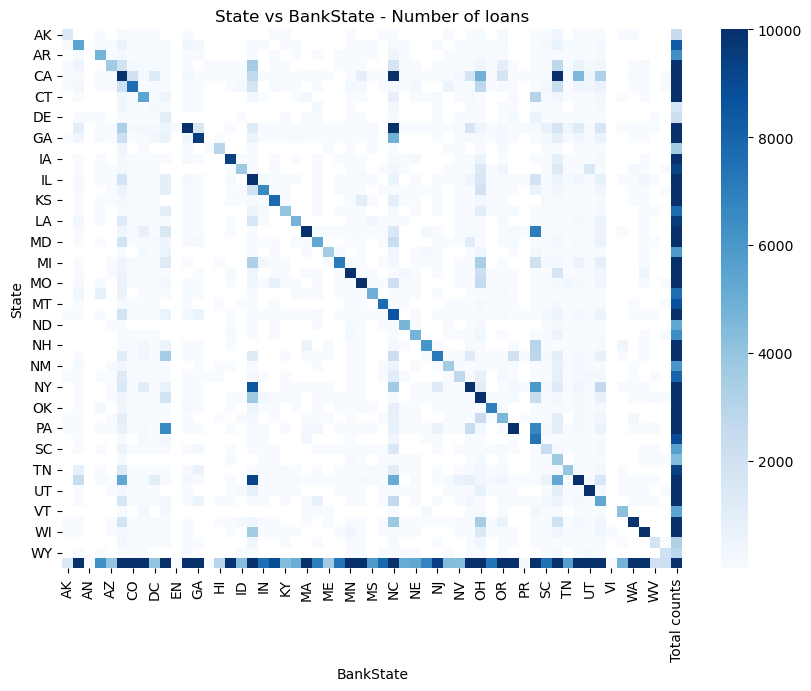

In [600]:
plt.figure(figsize=(10,7))
sns.heatmap(State_vs_BankState_count['Default'], cmap="Blues", vmax=10000)
plt.title('State vs BankState - Number of loans');

Maybe it is more useful to consider whether the state of the company is the same as the state of the branch bank or not. Let's look at the statistics of the default column according to this field.

In [584]:
print(f"There are {loans[loans['SameState']==True]['Default'].count()} loans where the state of the company is equal \
to the state of the branch bank. The\n corresponding default rate in this case is: \
{loans[loans['SameState']==True]['Default'].mean()*100}%.")    
print(f"There are {loans[loans['SameState']==False]['Default'].count()} loans where the state of the company is \
different than the state of the branch bank. The\n corresponding default rate in this case is: \
{loans[loans['SameState']==False]['Default'].mean()*100}%.")

There are 473358 loans where the state of the company is equal to the state of the branch bank. The
 corresponding default rate in this case is: 10.516142116537589%.
There are 423714 loans where the state of the company is different than the state of the branch bank. The
 corresponding default rate in this case is: 25.436497259944208%.


In [95]:
loans.groupby('SameState', dropna=False)['Default'].describe() # Describe_values can't handle null values.

count      mean       std  min  25%  50%  75%  max
SameState                                                       
False      422189.0  0.255108  0.435923  0.0  0.0  0.0  1.0  1.0
True       473358.0  0.105161  0.306762  0.0  0.0  0.0  0.0  1.0
NaN          1525.0  0.048525  0.214942  0.0  0.0  0.0  0.0  1.0

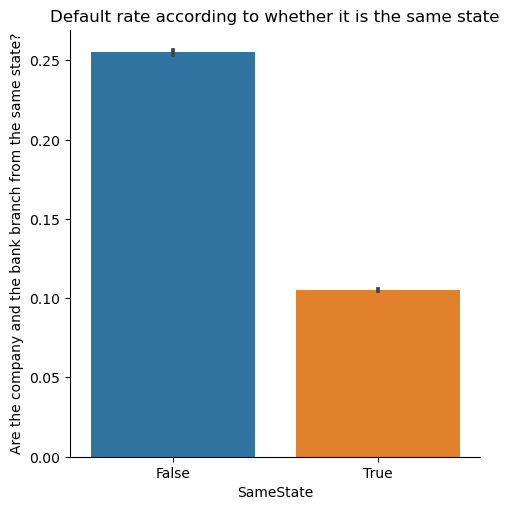

In [96]:
sns.catplot( data=loans, x='SameState', y="Default", kind="bar", aspect=1);
plt.title("Default rate according to whether it is the same state", size=12);
plt.ylabel('Default rate', size=10);
plt.ylabel('Are the company and the bank branch from the same state?', size=10);

#For pdf:
#sns.catplot( data=loans, x='SameState', y="Default", kind="bar", aspect=1);
#plt.title("Tasa de default según si es mismo estado", size=12);
#plt.ylabel('Tasa de default', size=10);
#plt.xlabel('¿Empresa y sucursal son del mismo estado?', size=10);

#plt.tight_layout()
#plt.savefig("Default_by_samestate.png", dpi=100)

The default rate when the state of the branch bank is different from that of the company is 2.5 times higher! This is definitely an important fact to keep in mind.

On the other hand, according to the default rate table of 'SameState' category (it is just above the last plot), the null values would seem to be closer to being the bank and the company from the same state. But we cannot guarantee this and a null value would be more associated with not being categorized. By construction, that null value of the 'SameState' field is because the StateBank field is empty (and most likely the Bank field) or the State field is empty. We decided to fill all the nulls in the 'State', 'Bank', 'BankState' and 'SameState' fields with the new value 'Unknown'. There are not many rows of these:

In [97]:
(loans['BankState'].isnull()|loans['State'].isnull()).sum()

1525

 --------------------------

If we break down the state of the branch bank according to whether it is different from that of the company requesting the loan, we can see the following:

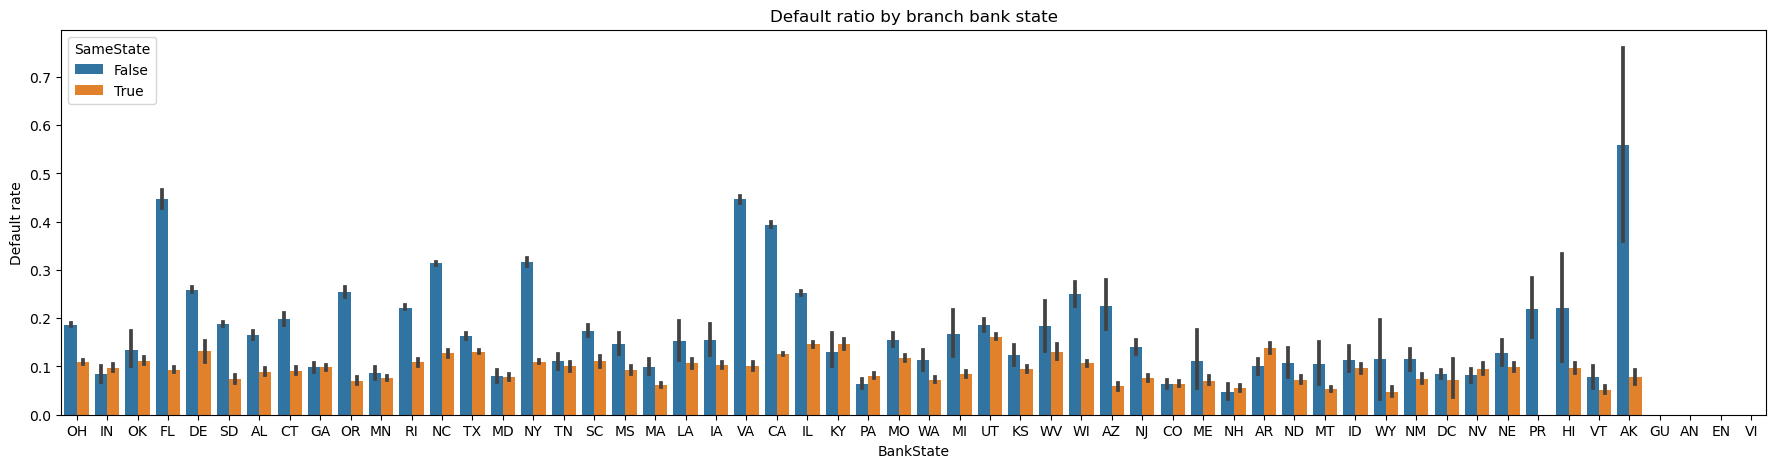

In [98]:
ax=sns.barplot(y='Default', x='BankState', data=loans, hue='SameState')
ax.figure.set_size_inches(22,5)
plt.ylabel('Default rate');
plt.title("Default ratio by branch bank state"); 

Here we see again the great difference that there is if the bank branch is in the same state or not. If we only look at the state of the bank branches for banks where the state is the same as that of the company, the default rate in the states of the branches remains much more even and similar.

We notice that there are some states ('GU', 'AN', 'EN', 'VI') that do not have bars, but that is because they have very few loans and the default rate is not calculated:

In [357]:
loans.stb.freq(['BankState'])

BankState   count    percent  cumulative_count  cumulative_percent
0         CA  118014  13.177677            118014           13.177677
1         NC   79449   8.871432            197463           22.049109
2         IL   65855   7.353499            263318           29.402608
3         OH   58425   6.523851            321743           35.926459
4         SD   51065   5.702019            372808           41.628478
5         TX   47758   5.332753            420566           46.961231
6         RI   44115   4.925968            464681           51.887199
7         NY   39544   4.415561            504225           56.302760
8         VA   28959   3.233619            533184           59.536379
9         DE   24520   2.737952            557704           62.274331
10        MN   19950   2.227656            577654           64.501988
11        UT   18994   2.120908            596648           66.622895
12        PA   17036   1.902273            613684           68.525169
13        WI   15402   1.719818            629086           70.244986
14        MO   14840   1.657064            643926           71.902050
15        MA   13843   1.545737            657769           73.447787
16        GA   13805   1.541494            671574           74.989280
17        FL   13803   1.541270            685377           76.530551
18        AL   12127   1.354125            697504           77.884676
19        OR   11369   1.269485            708873           79.154161
20        WA   10687   1.193332            719560           80.347492
21        CO   10580   1.181384            730140           81.528876
22        CT    9905   1.106012            740045           82.634888
23        IA    9860   1.100987            749905           83.735875
24        NJ    9434   1.053419            759339           84.789294
25        KS    8869   0.990330            768208           85.779624
26        MT    7848   0.876323            776056           86.655947
27        IN    7618   0.850641            783674           87.506588
28        SC    7471   0.834227            791145           88.340815
29        MI    7365   0.822390            798510           89.163205
30        OK    7322   0.817589            805832           89.980794
31        MD    6993   0.780852            812825           90.761646
32        NH    6794   0.758631            819619           91.520278
33        AR    6311   0.704699            825930           92.224977
34        MS    5923   0.661374            831853           92.886350
35        TN    5619   0.627429            837472           93.513779
36        NE    5333   0.595493            842805           94.109272
37        ND    5103   0.569811            847908           94.679083
38        LA    5057   0.564675            852965           95.243758
39        VT    4751   0.530506            857716           95.774264
40        NM    4416   0.493099            862132           96.267363
41        KY    4380   0.489079            866512           96.756443
42        NV    4323   0.482715            870835           97.239158
43        ID    4313   0.481598            875148           97.720756
44        DC    4003   0.446983            879151           98.167739
45        AZ    3957   0.441846            883108           98.609585
46        ME    3689   0.411921            886797           99.021506
47        HI    2989   0.333758            889786           99.355264
48        WY    2167   0.241972            891953           99.597235
49        WV    2006   0.223994            893959           99.821229
50        AK    1438   0.160570            895397           99.981799
51        PR     155   0.017308            895552           99.999107
52        GU       5   0.000558            895557           99.999665
53        VI       1   0.000112            895558           99.999777
54        EN       1   0.000112            895559           99.999888
55        AN       1   0.000112            895560          100.000000

We conclude that it is more important if the state of the bank branch is equal to that of the company than the state of the branch itself.

#### Franchise

Is there much difference in the default rate if the company is a franchise or not?

In [100]:
describe_values(loans, 'Is_franchise', 'Default')

count  missing  unique_values      mean       std  mode  min   
Is_franchise                                                                    
0             845344.0      0.0            2.0  0.177084  0.381740   0.0  0.0  \
1              51728.0      0.0            2.0  0.151949  0.358975   0.0  0.0   

              25%  50%  75%  max      skew  kurtosis  
Is_franchise                                          
0             0.0  0.0  0.0  1.0  1.691814  0.862237  
1             0.0  0.0  0.0  1.0  1.939217  1.760631

We see that no, there is little difference in the default rate if the company is a franchise or not. It is a variable that is not important in the model.

#### Business sector

And what happens with the industry sector? Will the default rate depend a lot on the sector?

Text(0.5, 1.0, 'Non-compliance with payments by sector')

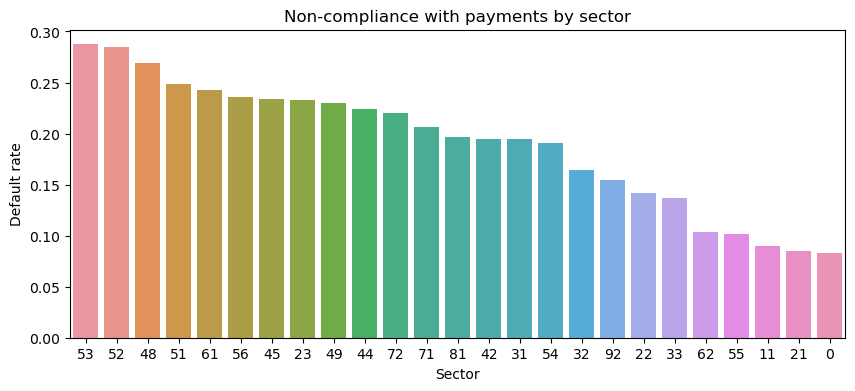

In [101]:
plt.figure(figsize=(10,4))
g=loans.groupby('Sector')['Default'].mean().sort_values(ascending=False)
sns.barplot(x=g.index, y=g.values)
plt.xlabel("Sector", size=10)
plt.ylabel("Default rate", size=10)
plt.title("Non-compliance with payments by sector", size=12)
#plt.xlabel("Sector industrial", size=10)
#plt.ylabel("Tasa de default", size=10)
#plt.title("Inconvenientes en los pagos por sector", size=12)

#plt.tight_layout()
#plt.savefig("Default_by_sector.png", dpi=100)

To understand this better, let's look at the table of sector codes again.

|Sector |	Description|
|-------|----------------|
11 | Agriculture, forestry, fishing and hunting
21 |	Mining, quarrying, and oil and gas extraction
22 |	Utilities
23 |	Construction
31–33 |	Manufacturing
42 |	Wholesale trade
44–45 |	Retail trade
48–49 |	Transportation and warehousing
51 |	Information
52 |	Finance and insurance
53 |	Real estate and rental and leasing
54 |	Professional, scientific, and technical services
55 |	Management of companies and enterprises
56 |	Administrative and support and waste management and remediation services
61 |	Educational services
62 |	Health care and social assistance
71 |	Arts, entertainment, and recreation
72 |	Accommodation and food services
81 |	Other services (except public administration)
92 |  Public administration

We see that there are sectors such as 52 and 53 ("Finance and insurance" and "Real estate and rental and leasing", respectively) where the default rate is close to 30%, while other sectors such as 11 and 21 (" Agriculture, forestry, fishing and hunting" and "Mining, quarrying, and oil and gas extraction", respectively) where the percentage is less than 10%.

The statistical values of the Default field for each sector are:

In [102]:
default_by_sector = describe_values(loans, 'Sector', 'Default').sort_values(by='mean')
default_by_sector
# Short version of this: loans.groupby('Sector')['Default'].describe().sort_values(by='mean')

count  missing  unique_values      mean       std  mode  min  25%   
Sector                                                                         
0       201657.0      0.0            2.0  0.083305  0.276343   0.0  0.0  0.0  \
21        1851.0      0.0            2.0  0.084819  0.278687   0.0  0.0  0.0   
11        8994.0      0.0            2.0  0.090282  0.286602   0.0  0.0  0.0   
55         256.0      0.0            2.0  0.101562  0.302664   0.0  0.0  0.0   
62       55263.0      0.0            2.0  0.103795  0.304997   0.0  0.0  0.0   
33       38195.0      0.0            2.0  0.136431  0.343251   0.0  0.0  0.0   
22         662.0      0.0            2.0  0.141994  0.349308   0.0  0.0  0.0   
92         227.0      0.0            2.0  0.154185  0.361924   0.0  0.0  0.0   
32       17903.0      0.0            2.0  0.163883  0.370180   0.0  0.0  0.0   
54       67918.0      0.0            2.0  0.190774  0.392914   0.0  0.0  0.0   
31       11791.0      0.0            2.0  0.194470  0.395809   0.0  0.0  0.0   
42       48671.0      0.0            2.0  0.194777  0.396033   0.0  0.0  0.0   
81       72393.0      0.0            2.0  0.196552  0.397393   0.0  0.0  0.0   
71       14616.0      0.0            2.0  0.206144  0.404549   0.0  0.0  0.0   
72       67506.0      0.0            2.0  0.220454  0.414556   0.0  0.0  0.0   
44       84560.0      0.0            2.0  0.223959  0.416898   0.0  0.0  0.0   
49        2210.0      0.0            2.0  0.229864  0.420841   0.0  0.0  0.0   
23       66465.0      0.0            2.0  0.232634  0.422514   0.0  0.0  0.0   
45       42407.0      0.0            2.0  0.234159  0.423477   0.0  0.0  0.0   
56       32528.0      0.0            2.0  0.235520  0.424330   0.0  0.0  0.0   
61        6401.0      0.0            2.0  0.242462  0.428606   0.0  0.0  0.0   
51       11362.0      0.0            2.0  0.248284  0.432036   0.0  0.0  0.0   
48       20180.0      0.0            2.0  0.269128  0.443518   0.0  0.0  0.0   
52        9469.0      0.0            2.0  0.284296  0.451102   0.0  0.0  0.0   
53       13587.0      0.0            2.0  0.287333  0.452535   0.0  0.0  0.0   

        50%  75%  max      skew  kurtosis  
Sector                                     
0       0.0  0.0  1.0  3.015811  7.095188  
21      0.0  0.0  1.0  2.982768  6.904365  
11      0.0  0.0  1.0  2.859777  6.179699  
55      0.0  0.0  1.0  2.653603  5.081245  
62      0.0  0.0  1.0  2.598191  4.750768  
33      0.0  0.0  1.0  2.118496  2.488156  
22      0.0  0.0  1.0  2.056014  2.233933  
92      0.0  0.0  1.0  1.927967  1.732242  
32      0.0  0.0  1.0  1.816168  1.298612  
54      0.0  0.0  1.0  1.574058  0.477672  
31      0.0  0.0  1.0  1.544085  0.384263  
42      0.0  0.0  1.0  1.541464  0.376126  
81      0.0  0.0  1.0  1.527233  0.332450  
71      0.0  0.0  1.0  1.452958  0.111102  
72      0.0  0.0  1.0  1.348690 -0.181042  
44      0.0  0.0  1.0  1.324293 -0.246255  
49      0.0  0.0  1.0  1.284954 -0.349210  
23      0.0  0.0  1.0  1.265636 -0.398178  
45      0.0  0.0  1.0  1.255572 -0.423559  
56      0.0  0.0  1.0  1.246653 -0.445884  
61      0.0  0.0  1.0  1.202123 -0.555075  
51      0.0  0.0  1.0  1.165460 -0.641815  
48      0.0  1.0  1.0  1.041199 -0.915995  
52      0.0  1.0  1.0  0.956543 -1.085254  
53      0.0  1.0  1.0  0.940028 -1.116512

In [103]:
print(f'The median default rate for the sectors is {default_by_sector["mean"].median()}. In other words, half of the sectors have a default rate less or equal to {default_by_sector["mean"].median()}.')

The median default rate for the sectors is 0.19655215283245617. In other words, half of the sectors have a default rate less or equal to 0.19655215283245617.


#### Variables related to the credit line and loan amounts

Recall the difference between the 'DisbursementGross', 'GrAppv' and 'SBA_Appv' fields. 'GrAppv' is the amount approved by the bank for the loan; SBA_Appv' is the amount guaranteed by the SBA, that is to say that this amount is given by the SBA to the bank in case the loan defaults and the company does not repay it; 'DisbursementGross' is the total amount delivered.

In [104]:
loans[['DisbursementGross', 'GrAppv', 'SBA_Appv']].head(10)

DisbursementGross    GrAppv  SBA_Appv
0            60000.0   60000.0   48000.0
1            40000.0   40000.0   32000.0
2           287000.0  287000.0  215250.0
3            35000.0   35000.0   28000.0
4           229000.0  229000.0  229000.0
5           517000.0  517000.0  387750.0
6           600000.0  600000.0  499998.0
7            45000.0   45000.0   36000.0
8           305000.0  305000.0  228750.0
9            70000.0   70000.0   56000.0

<Figure size 1200x1200 with 0 Axes>

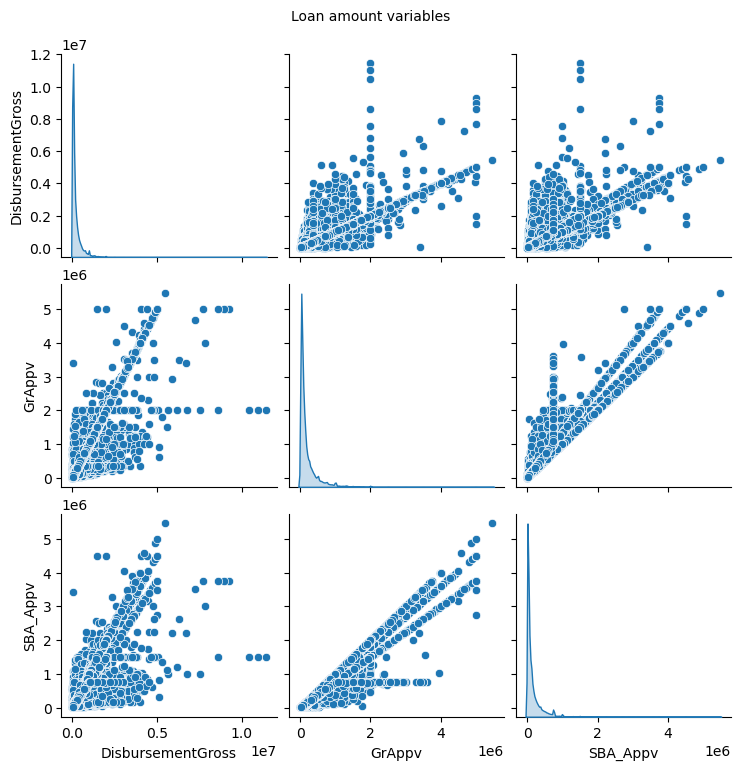

In [363]:
plt.figure(figsize=(12, 12));

g = sns.pairplot(loans[['DisbursementGross', 'GrAppv', 'SBA_Appv']], diag_kind='kde');
g.fig.suptitle("Loan amount variables", fontsize=10, y=1.02);

Let's analyze the influence between whether the line of credit is renewable or not. To do this, let's first see the difference between the amount granted and the amount approved by the bank. If we define a new field equal to this difference, a positive value indicates that more was delivered than approved. This is closely related to the type of credit line, if this credit line is renewable, it is not uncommon for said difference to be positive because credit can continue to be requested after having paid part of what was previously delivered.

The latter is clearly seen in the following graph:

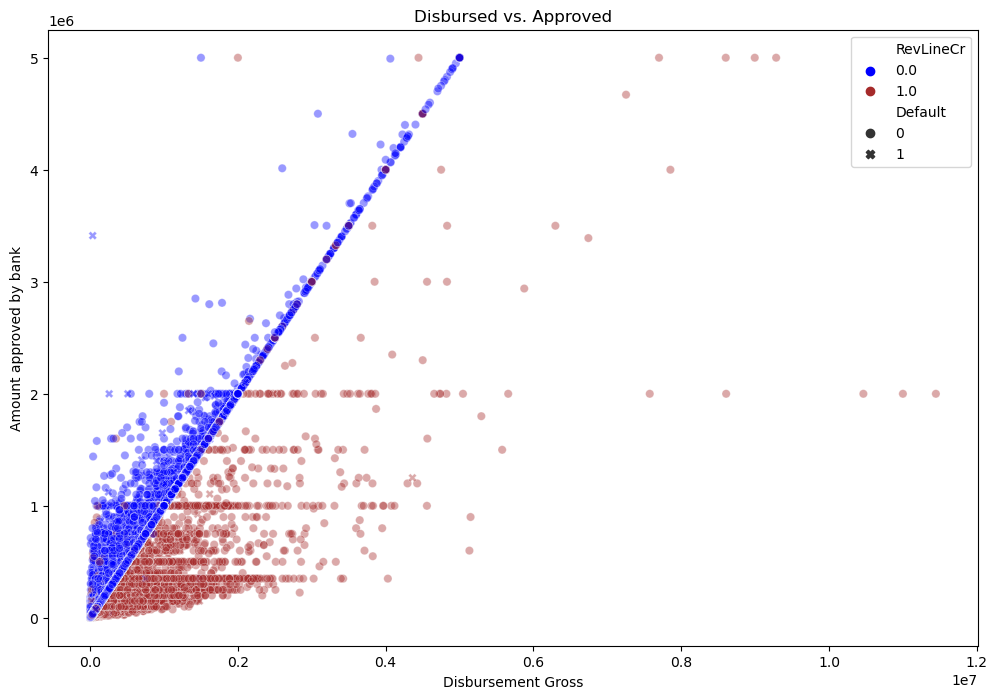

In [105]:
fig, ax = plt.subplots(figsize=(12, 8))
ax=sns.scatterplot(x=loans['DisbursementGross'] , y=loans['GrAppv'], hue=loans['RevLineCr'], style=loans['Default'], alpha=0.4, palette=['blue','brown']);
plt.legend(loc='upper right');
ax.set(xlabel='Disbursement Gross', ylabel='Amount approved by bank',title = 'Disbursed vs. Approved') ;

The diagonal line represents when the same amount of money was disbursed as that approved by the bank. We see that to the right of that diagonal there are no points that have '0.0' in the 'RevLineCr' field (although we will see in a while that there are, but they are very few).

But with the graph above we realize that the difference between what is lent and what the bank approves can serve as a variable to analyze other variables. This difference already has a name, we called it 'Disb_vs_GrAppv'. And we have a variable that indicates if this difference is positive or not, 'Disb_vs_GrAppv_is_positive'.

These new variables are good tools to try to classify the null values that the 'RevLineCr' field has. Let's do that.

In [106]:
loans.groupby(['RevLineCr'], dropna=False).agg(Number_of_loans=('DisbursementGross', 'count'), 
    Mean_disbursed=('DisbursementGross', 'mean'), Max_Disb_vs_GrAppv =('Disb_vs_GrAppv', 'max'), 
    Min_Disb_vs_GrAppv =('Disb_vs_GrAppv', 'min'), Mean_Disb_vs_GrAppv =('Disb_vs_GrAppv', 'mean'), 
    Disb_vs_GrAppv_positive_mean=('Disb_vs_GrAppv_is_positive', 'mean'), 
    Default_rate=('Default', 'mean')).sort_values(by='Number_of_loans', ascending=False)

Number_of_loans  Mean_disbursed  Max_Disb_vs_GrAppv   
RevLineCr                                                        
0.0                 419178   222235.275489           1121117.0  \
NaN                 277240   239885.764432           4784780.0   
1.0                 200654   105580.576201           9446325.0   

           Min_Disb_vs_GrAppv  Mean_Disb_vs_GrAppv   
RevLineCr                                            
0.0                -3500000.0         -2413.737484  \
NaN                -1719300.0         -1008.794232   
1.0                -3000000.0         44613.753785   

           Disb_vs_GrAppv_positive_mean  Default_rate  
RevLineCr                                              
0.0                            0.009905      0.146480  
NaN                            0.033888      0.162913  
1.0                            0.709634      0.254119

In [107]:
loans.drop(['Name', 'Zip', 'City', 'State', 'Bank', 'BankState', 'ChgOffDate','ChgOffPrinGr'], axis=1).groupby(['RevLineCr'], dropna=False).agg(['median', 'mean']).T


RevLineCr                                                    0.0   
ApprovalDate               median            1997-01-29 00:00:00  \
                           mean    1998-10-09 06:35:42.902537856   
ApprovalFY                 median                         1997.0   
                           mean                      1998.504948   
Term                       median                           84.0   
                           mean                       126.061341   
NoEmp                      median                            5.0   
                           mean                        14.425192   
NewExist                   median                            1.0   
                           mean                         1.296847   
CreateJob                  median                            0.0   
                           mean                        15.707788   
RetainedJob                median                            0.0   
                           mean                        16.859155   
UrbanRural                 median                            0.0   
                           mean                         0.499854   
LowDoc                     median                            0.0   
                           mean                         0.137927   
DisbursementDate           median            1997-07-23 00:00:00   
                           mean    1999-02-10 15:26:27.820376576   
DisbursementGross          median                       117000.0   
                           mean                    222235.275489   
BalanceGross               median                            0.0   
                           mean                         4.557763   
GrAppv                     median                       119000.0   
                           mean                    224649.012973   
SBA_Appv                   median                        94500.0   
                           mean                    181994.805498   
Is_franchise               median                            0.0   
                           mean                         0.055263   
Default                    median                            0.0   
                           mean                          0.14648   
Sector                     median                           33.0   
                           mean                              inf   
Real_Estate                median                            0.0   
                           mean                         0.223666   
DisbursementYear           median                         1997.0   
                           mean                      1998.613225   
ApprovalYear               median                         1997.0   
                           mean                      1998.272195   
Days_waiting               median               74 days 00:00:00   
                           mean      123 days 07:49:56.648717060   
GreatRecession             median                            0.0   
                           mean                         0.120445   
SameState                  median                            1.0   
                           mean                         0.634741   
Disb_vs_GrAppv             median                            0.0   
                           mean                     -2413.737484   
Disb_vs_GrAppv_is_positive median                            0.0   
                           mean                         0.009905   

RevLineCr                                                    1.0   
ApprovalDate               median            2005-10-26 00:00:00  \
                           mean    2005-07-13 06:27:23.784823552   
ApprovalFY                 median                         2006.0   
                           mean                       2005.26754   
Term                       median                           75.0   
                           mean                         61.50776   
NoEmp                      median                      

We see a large difference in the default rate between revolving line loans and non-revolving line loans. Those with renewable lines have a default rate of more than 10% higher.

The null values of 'RevLineCr' do not fully fit the characteristics of having, or not, a revolving line of credit. Perhaps they are credits that began in one way and spread in another. Since there are many null cases, we decided to fill the nulls in this field as a new category value: -1 (so that it remains a numeric field).

---------------------------------------------------------------------------------------------------------

Let's see if the distributions of the variables 'DisbursementGross', 'GrAppv' and 'SBA_Appv' are different for the loans that had problems compared to those that did not.

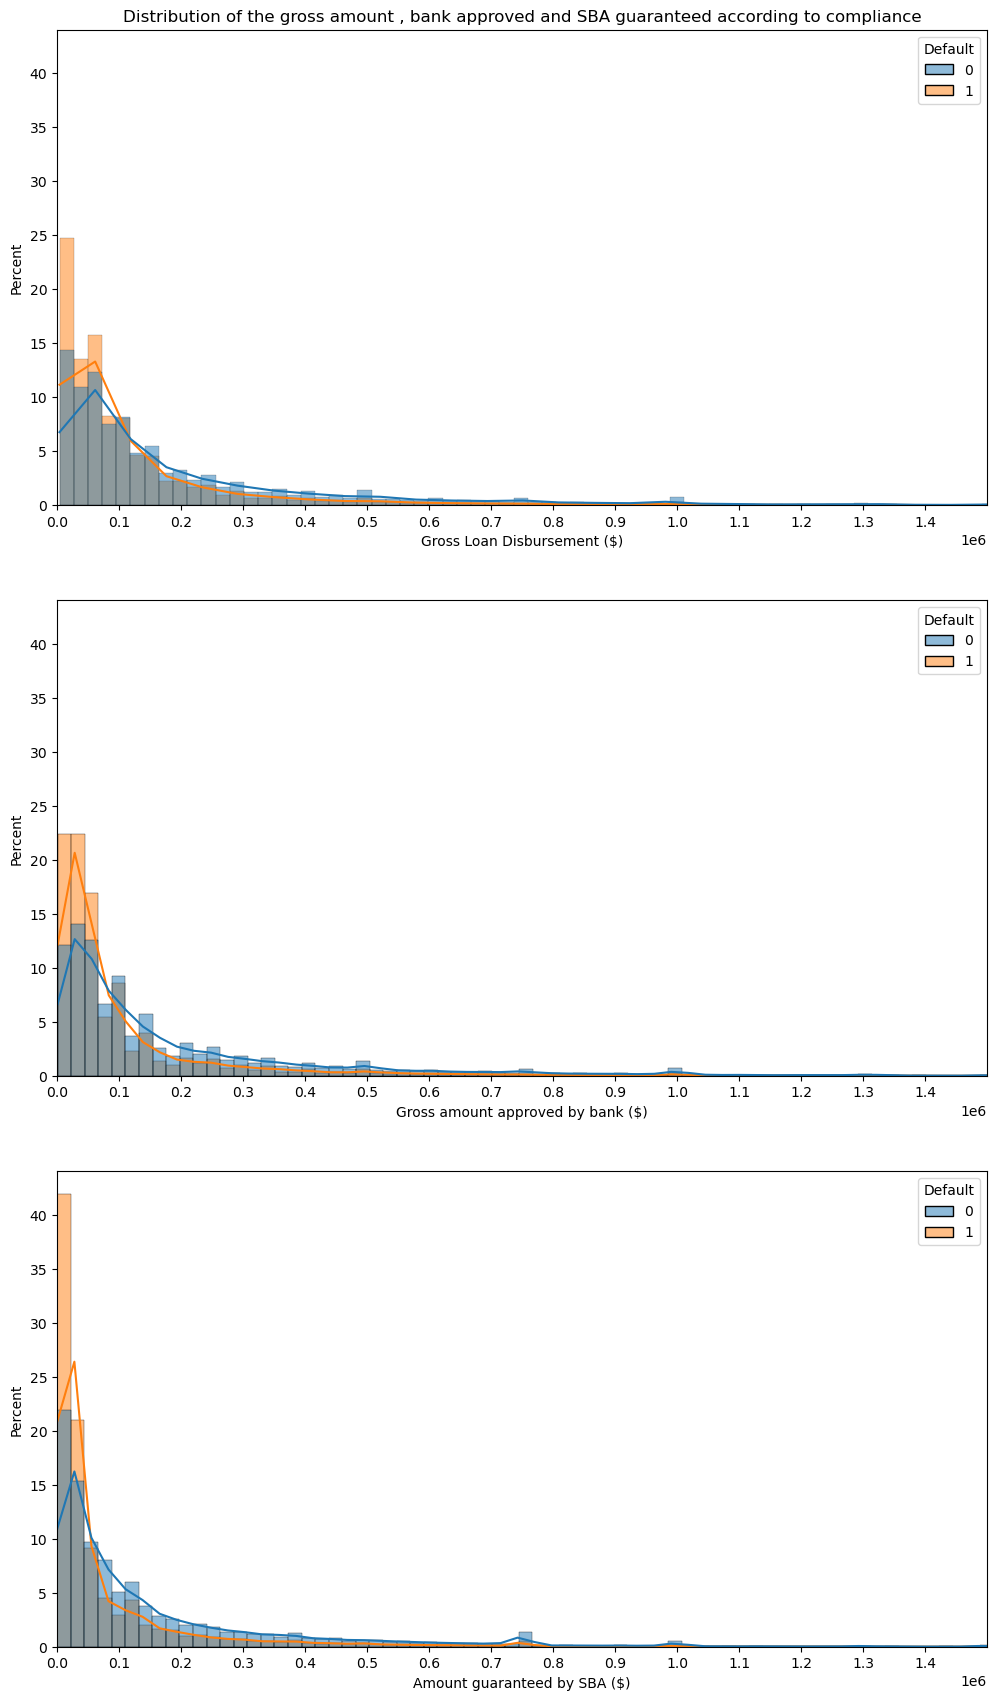

In [108]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,21), sharex=False, sharey=True)
sns.histplot(x= 'DisbursementGross', hue = 'Default',  data = loans, ax=ax[0],bins=500,stat='percent', common_norm=False, kde=True) 
#Common_norm = False --> do the percentages separately.             ) 
ax[0].set(xlabel='Gross Loan Disbursement ($)', ylabel='Percent')
ax[0].set_title("Distribution of the gross amount , bank approved and SBA guaranteed according to compliance")
ax[0].set_xlim(0, 1.5e6) #Due to the existence of extreme data, the graph looks small. We change the range so we can see it 
#in more detail.
ax[0].set(xticks=np.arange(0, 1.5e6, 1e5));

sns.histplot(x= 'GrAppv', hue = 'Default',  data = loans, ax=ax[1],bins=250,stat='percent', common_norm=False, kde=True) #Common_norm = False --> do the percentages separately.             ) 
ax[1].set(xlabel='Gross amount approved by bank ($)', ylabel='Percent')
ax[1].set_xlim(0, 1.5e6) #Due to the existence of extreme data, the graph looks small. We change the range so we can see it
#in more detail.
ax[1].set(xticks=np.arange(0, 1.5e6, 1e5));

sns.histplot(x= 'SBA_Appv', hue = 'Default',  data = loans, ax=ax[2],bins=250,stat='percent', common_norm=False, kde=True) #Common_norm = False --> do the percentages separately.              ) 
ax[2].set(xlabel='Amount guaranteed by SBA ($)', ylabel='Percent')
ax[2].set_xlim(0, 1.5e6) #Due to the existence of extreme data, the graph looks small. We change the range so we can see it
#in more detail.
ax[2].set(xticks=np.arange(0, 1.5e6, 1e5));


In [471]:
#Plot for pdf.

#fig, ax = plt.subplots(figsize=(10, 5))
#sns.histplot(x= 'DisbursementGross', hue = 'Default',  data = loans,bins=500,stat='percent', common_norm=False) #Common_norm = False --> do the percentages separately.             ) 
#ax.set(xlabel='Monto total prestado ($)', ylabel='Porcentaje')
#ax.set_title("Distribución del monto total prestado según cumplimiento")
#ax.set_xlim(0, 1.5e6) #Due to the existence of extreme data, the graph looks small. We change the range so we can see it in more detail.
#ax.set(xticks=np.arange(0, 1.5e6, 1e5));

#plt.tight_layout()
#plt.savefig("Distribution_and_gross.png", dpi=100)

The percentage refers to each total. For example, in the first range (first bar) of the first chart, 25% of all defaults occurred and just under 15% of all those paid on time.
The graphs show us that the majority of problematic loans are in the range of between 0 and 100,000 USD, either on the full amount or on the approved amounts.
We can also see that the 3 distributions are similar, which is not surprising. The three variables are closely related. Despite this, something to highlight is that the default rate is higher in loans where the SBA approved less than USD 50,000 than in any other case.  This shows us the importance of the amount approved by the SBA and should be taken into account in the analysis after our work.

Due to this close relationship between these three variables, in most visualizations and analyzes we will focus on only one. We chose the 'DisbursementGross' field because we found it easier to understand.

Let's look at the gross disbursements against loans paid on time and those that were in trouble.

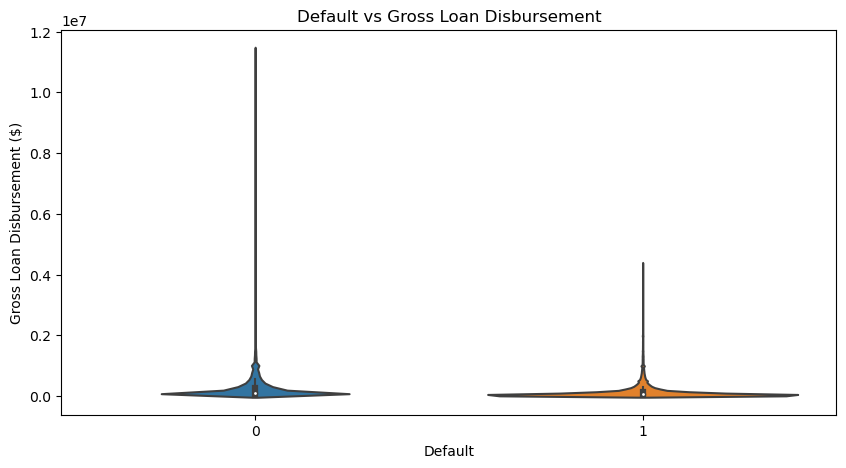

In [366]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(x = 'Default', y='DisbursementGross', data=loans );
plt.title("Default vs Gross Loan Disbursement");
ax.set(xlabel='Default', ylabel='Gross Loan Disbursement ($)');

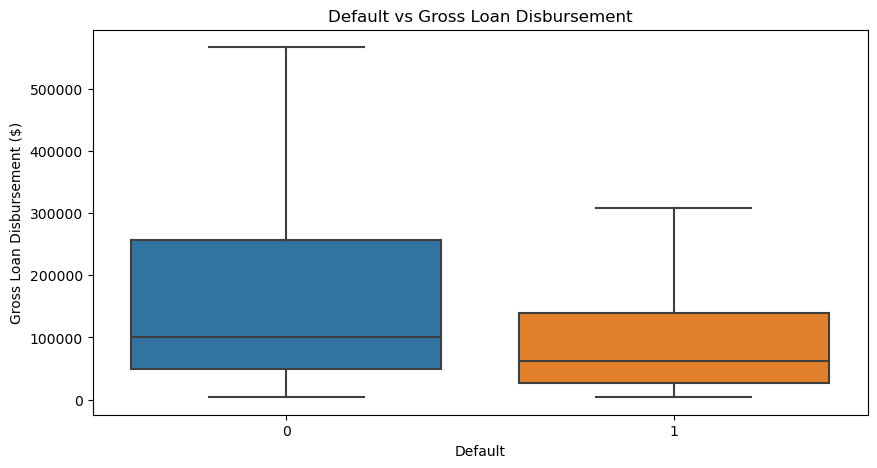

In [367]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='Default', y = 'DisbursementGross', data = loans, showfliers = False)  ## The existence of outliers makes the
# graph not look very good. That's why we remove them, with showfliers = False.
plt.title("Default vs Gross Loan Disbursement");
ax.set(xlabel='Default', ylabel='Gross Loan Disbursement ($)');

The last graph shows us more clearly that the loans that did not have problems tended to be larger. 

One hypothesis that could explain this is that the largest loans are associated with established and expanding companies, in such a company a loan is more likely to be repaid without problems. However, this hypothesis is not supported by the data and the analysis that we have already done: In the section "Variables related to the company" that is part of "A first contact with the dataset" we saw that the default ratio was not very different in new companies than in companies that are not new.

There is a simpler explanation than to think things backwards: smaller loans have a higher default rate because the size of the loan ends up depending largely on what the SBA approves (in the appendix we do an analysis between the amount approved by the bank and the one approved by the SBA), and this approved amount ends up being insufficient for the company to cover its needs. This low amount approved by the SBA may be due to different causes, such as low solvency of the company, carelessness in the processes and bureaucracy of the loan request by the company, a bad evaluation of the company or the SBA in the necessary amount for the company to get out of its financial problems (optimism, little margin in the face of unforeseen events such as economic crises, etc.), among others.

Now, let's combine the gross amount disbursed with the number of employees to study the payment problems. We have already seen in "Variables related to the company" that the number of employees is a factor that is related to the term payment of the loan. We are going to make the graph with a maximum of 30 employees to make it understandable.

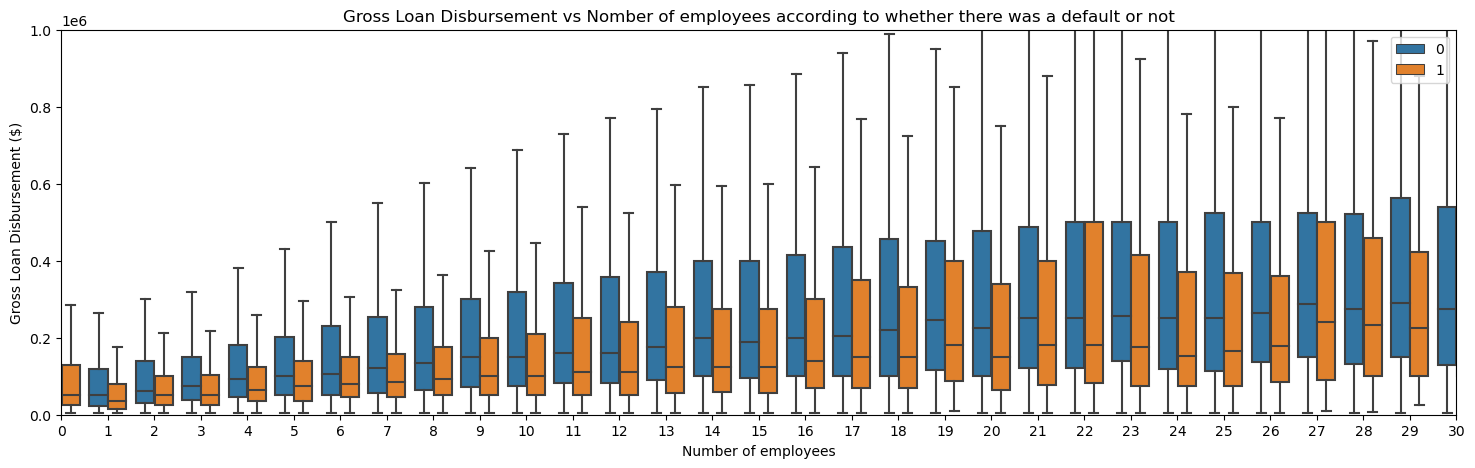

In [111]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='NoEmp', hue='Default', y = 'DisbursementGross', data = loans, showfliers=False)  
plt.title("Gross Loan Disbursement vs Nomber of employees according to whether there was a default or not");
ax.set(xlabel='Number of employees', ylabel='Gross Loan Disbursement ($)')
ax.set_xlim(0,30)
ax.set_ylim(0,1e6)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.0));

In [112]:
loans.groupby(['NoEmp', 'Default']).agg({'DisbursementGross':['mean', 'max', 'min', 'std'], 
                                         'GrAppv':['mean', 'max', 'min', 'std'],
                                         'SBA_Appv':['mean', 'max', 'min', 'std']}
                                       ).head(60)

DisbursementGross                                       
                           mean         max      min            std   
NoEmp Default                                                         
0     0           136198.268645   5000000.0   4000.0  286722.783118  \
      1           107390.448496   2000000.0   5000.0  156488.124387   
1     0           124364.662098   5000000.0   4000.0  224856.082897   
      1            77370.045521   2900000.0   4000.0  141857.405039   
2     0           125953.168741   3965329.0   4000.0  194564.223930   
      1            92833.193037   2065000.0   4000.0  146714.495461   
3     0           135127.805137   3637500.0   4000.0  189826.350240   
      1            95827.525674   4362157.0   4000.0  149515.892486   
4     0           159635.748034   5000000.0   4000.0  218531.250790   
      1           111720.662126   2000000.0   4450.0  159582.777604   
5     0           176929.591954   4563734.0   4000.0  229632.778746   
      1           123708.184699   2000000.0   4274.0  172325.726462   
6     0           194980.249109   5000000.0   4000.0  248357.812916   
      1           138944.292007   2250000.0   4228.0  192886.781524   
7     0           211782.790993  11446325.0   4000.0  267882.602604   
      1           148948.940917   2000000.0   5000.0  209151.512818   
8     0           229368.788418   5000000.0   4900.0  275522.450903   
      1           162634.036892   2085000.0   5000.0  226617.692820   
9     0           241592.642798   4900000.0   4000.0  282756.680726   
      1           173375.898739   2000000.0   5000.0  225288.518746   
10    0           258581.607785  10465000.0   4024.0  311457.578613   
      1           186360.757350   2000000.0   4300.0  250065.944653   
11    0           266657.253281   4750000.0   4046.0  298662.125324   
      1           205373.883456   2000000.0   5000.0  264552.465997   
12    0           280980.854849   5000000.0   4369.0  327296.514958   
      1           199468.589182   2000000.0   4826.0  253877.327516   
13    0           283548.717389   4000000.0   4981.0  307112.870440   
      1           230075.923007   2485000.0   5000.0  293546.095566   
14    0           305128.075421   5000000.0   4500.0  341061.787923   
      1           224258.116189   2000000.0   5000.0  285549.951885   
15    0           311571.530843   5000000.0   4100.0  349123.573827   
      1           232020.417012   2230000.0   5000.0  298953.350129   
16    0           311432.295195   2787000.0   5000.0  320457.561027   
      1           244887.801653   2000000.0   4783.0  294272.601928   
17    0           326598.615440   4788900.0   4000.0  351091.930805   
      1           266248.967033   2478481.0   5000.0  305494.057612   
18    0           340371.521010   5000000.0   4500.0  356356.700790   
      1           256778.115385   1999200.0   4590.0  288425.337038   
19    0           344968.897947   3734621.0   5000.0  340758.276536   
      1           300267.358491   1800000.0  10000.0  325958.209990   
20    0           351713.150192   7573881.0   4397.0  371107.400695   
      1           265509.232439   2000000.0   4584.0  309236.678735   
21    0           366439.053872   4750153.0   5000.0  377094.954357   
      1           304578.304813   1976000.0   5000.0  346022.166631   
22    0           371196.795264   3950000.0   5000.0  364052.345802   
      1           311228.946667   2289000.0   5000.0  330591.629159   
23    0           372692.160584   6743102.0   5000.0  369259.119154   
      1           319499.950920   2100000.0   5000.0  373642.151860   
24    0           367204.937224   5000000.0   5000.0  366661.608479   
      1           292357.930514   1995000.0   5000.0  341268.085652   
25    0           387788.653114   4300000.0   4530.0  388018.719757   
      1           293334.917266   2000000.0   4874.0  343789.187454   
26    0           372869.531923   3650440.0   4000.0  346001.915522   
      1           308971.280000   2000

Here we clearly see that what we said about larger loans usually having fewer drawbacks occurs regardless of the number of employees (at least if there is a maximum of 30): At a fixed number of employees we see that the default rate is lower in loans larger than the smaller ones. So the reason larger loans are less likely to default is not explained (solely) by the number of employees, but is another independent factor.

On the other hand, it is true that the greater the number of employees, the default rate tends to be lower if the number of employees is low:

In [373]:
describe_values(loans, 'NoEmp', 'Default').sort_values(by='NoEmp').head(31).style.set_caption('Default vs. Number of employees (the mean column indicates the default rate of each state).').set_table_styles(styles)

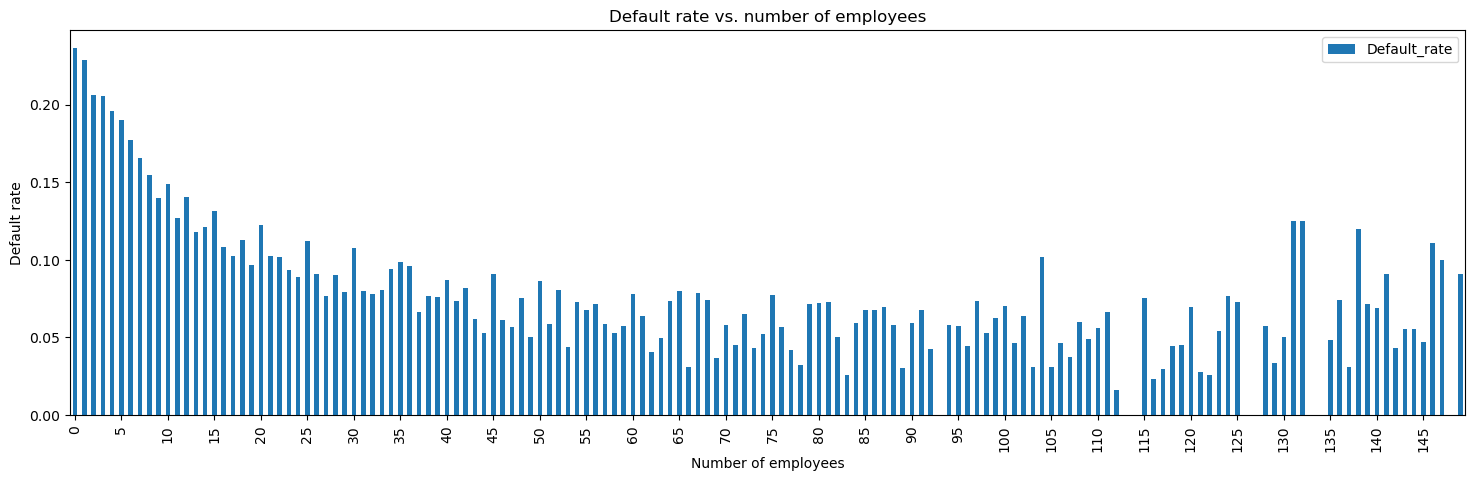

In [113]:
z=loans.groupby(['NoEmp']).agg(Default_rate=('Default', 'mean'), count=('Default', 'count'))
z=z.reset_index(drop=False)

fig, ax = plt.subplots(figsize=(18, 5))
z[z['NoEmp']<150].plot.bar(x='NoEmp', y='Default_rate', xlabel='Number of employees', ylabel='Default rate', 
                          title='Default rate vs. number of employees', xticks=np.arange(0, 150, step=5), ax=ax);

If the number of employees is approximately greater than 60, it seems to stop declining. Although it must be taken into account that the number of companies with a certain number of employees tends to decrease a lot with the number of employees and therefore there are few values to calculate an accurate default rate for a certain number of employees. 

For a better analysis, it is convenient to group the number of employees into ranges and calculate the default rate in each range. Because of the way the employees are distributed, it doesn't work to group them into equally spaced intervals. That is why we are going to group them considering the numbers of employees on a "logarithmic scale". We put that categorization in an auxiliary column called "NoEmp_grouped".

In [572]:
partition=(np.rint(partition_log(0,9999,15))).astype(int) # We choose to partition the interval in 15 subintervals. More than 
# that, the intervals with more employees have too few loans and the default rate would end up being too inaccurate.
partition[partition ==9999] = 10000 #We change the last border to 10000 because the maximum value of employees is 9999 and the
#pd.cut command creates intervals of the form [ ,) (we want 9999 to be included in the last interval).
partition

array([    0,     1,     2,     5,    11,    21,    39,    73,   135,
         250,   463,   857,  1584,  2928,  5411, 10000])

In [580]:
partition_log(23,9999,15)

array([  23.        ,   23.84756616,   25.4135007 ,   28.30666837,
         33.65198703,   43.52781689,   61.77406589,   95.48521803,
        157.76880178,  272.8418432 ,  485.44689997,  878.24880744,
       1603.97631764, 2944.80590389, 5422.07726825, 9999.        ])

In [573]:
loans['NoEmp_grouped']=pd.cut(loans['NoEmp'], partition, right=False) 

In [574]:
loans.groupby(['NoEmp_grouped']).agg(Amount_of_loans=('Default', 'count'),Average_number_of_employees= ('NoEmp', 'mean'), 
                                     Average_Term=('Term', 'mean'), Average_disbursement_amount=('DisbursementGross', 'mean'),
                                     Default_rate=('Default','mean'))

Amount_of_loans  Average_number_of_employees  Average_Term   
NoEmp_grouped                                                               
[0, 1)                    6618                     0.000000     75.825023  \
[1, 2)                  153474                     1.000000     91.010152   
[2, 5)                  301937                     2.786618     98.880250   
[5, 11)                 218239                     6.981360    116.175784   
[11, 21)                110901                    14.924942    131.547876   
[21, 39)                 59658                    27.853046    140.186781   
[39, 73)                 31075                    50.717844    145.768238   
[73, 135)                10712                    94.039768    150.581964   
[135, 250)                3102                   170.735332    149.327531   
[250, 463)                 895                   319.818994    153.536313   
[463, 857)                 177                   582.807910    147.960452   
[857, 1584)                104                  1150.076923    143.769231   
[1584, 2928)                63                  2074.190476    157.888889   
[2928, 5411)                62                  3936.919355    135.241935   
[5411, 10000)               55                  7350.872727    145.818182   

               Average_disbursement_amount  Default_rate  
NoEmp_grouped                                             
[0, 1)                       129394.608492      0.236174  
[1, 2)                       113628.783370      0.228449  
[2, 5)                       129080.502400      0.203400  
[5, 11)                      200209.817255      0.168636  
[11, 21)                     298071.056375      0.123615  
[21, 39)                     389067.557628      0.096601  
[39, 73)                     477615.688335      0.075012  
[73, 135)                    568506.320202      0.060960  
[135, 250)                   618997.449065      0.059961  
[250, 463)                   631429.480447      0.056983  
[463, 857)                   576692.836158      0.011299  
[857, 1584)                  395440.971154      0.038462  
[1584, 2928)                 386308.126984      0.063492  
[2928, 5411)                 360430.887097      0.129032  
[5411, 10000)                178242.054545      0.090909

The default rate seems to continue to decrease a little beyond 60 employees, but it is not very clear and there are probably random fluctuations due to the size of the samples.

<Figure size 1200x1200 with 0 Axes>

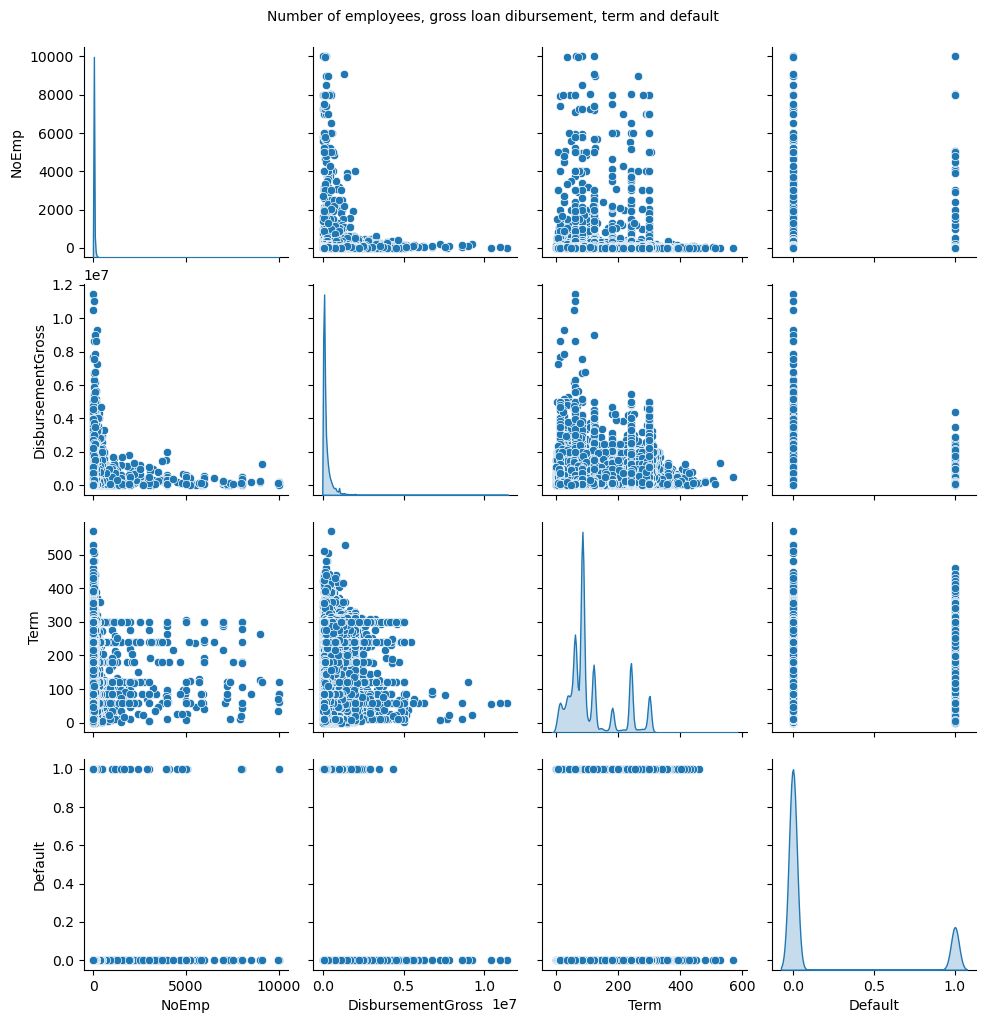

In [583]:
plt.figure(figsize=(12, 12));

g = sns.pairplot(loans[['NoEmp','DisbursementGross', 'Term', 'Default']], diag_kind='kde');
g.fig.suptitle("Number of employees, gross loan dibursement, term and default", fontsize=10, y=1.02);

-----------------------------------------------------------------------------------

Returning to the issue of the decrease in the default rate with the amount of the loan, another factor to take into account is that the largest loans have a greater chance of being backed by real estate (in a later section we will see that the latter have a default rate much lower):

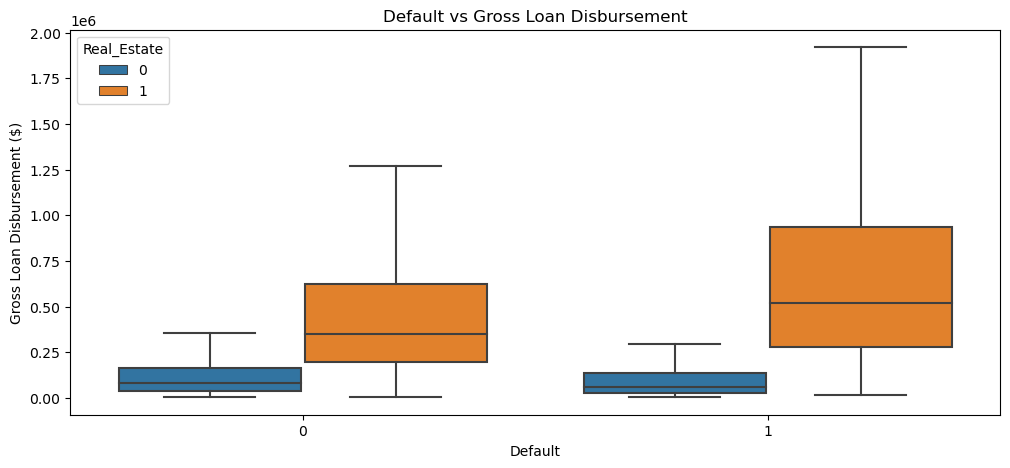

In [115]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='Default', y = 'DisbursementGross', data = loans, hue='Real_Estate', showfliers = False)  ## The existence of outliers makes the graph not look very good. That's why we remove them, with showfliers = False
plt.title("Default vs Gross Loan Disbursement");
ax.set(xlabel='Default', ylabel='Gross Loan Disbursement ($)');

The stats table of the disbursed amount values by 'Real_Estate' field is the following:

In [116]:
describe_values(loans, 'Real_Estate', 'DisbursementGross')

count  missing  unique_values           mean            std   
Real_Estate                                                                   
0            744979.0      0.0       112338.0  146600.780967  224948.197469  \
1            152093.0      0.0        12144.0  470979.791134  391515.329714   

                  mode     min       25%       50%       75%         max   
Real_Estate                                                                
0              50000.0  4000.0   35000.0   75000.0  154209.0  11446325.0  \
1            1000000.0  4600.0  195000.0  350000.0  628000.0   5472000.0   

                 skew   kurtosis  
Real_Estate                       
0            5.879989  87.823142  
1            2.070840   8.186908

-----------------------------------------------------------------------------------------------

Let's look at the 'LowDoc' field.

In [117]:
loans.groupby('LowDoc', dropna=False).agg(Number_of_loans=('DisbursementGross', 'count'), MeanDisbursed=('DisbursementGross', 'mean'), 
  MeanApproved=('GrAppv', 'mean'), Average_number_of_employees= ('NoEmp', 'mean'), Default_rate= ('Default', 'mean'))

Number_of_loans  MeanDisbursed   MeanApproved   
LowDoc                                                  
0.0              780905  220559.006883  210631.511336  \
1.0              110169   67873.804573   68653.535151   
NaN                5998  189065.043515  190076.111204   

        Average_number_of_employees  Default_rate  
LowDoc                                             
0.0                       12.041899      0.187060  
1.0                        6.998039      0.089898  
NaN                       10.313438      0.262921

We see that loans with low documentation have a much lower default rate. On the other hand, the null cases of this field appear to be of the same class as '0', that is, loans where the agile documentation procedure was not used. Let's do a hypothesis test to see if this makes sense.

In [118]:
sample_0 = loans[loans['LowDoc']==0]['Default']
sample_1 = loans[loans['LowDoc'].isnull()]['Default']

ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 8.298318279059437e-51
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


The hypothesis test distinguishes both values. So we decided to fill the null values with a new field value: -1 (so that it remains a numeric field).

#### Variables related to term and years

Let's start by pointing out the relationship between the variables ApprovalFY and ApprovalYear.

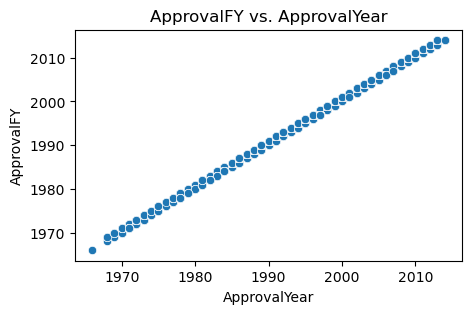

In [119]:
fig, ax = plt.subplots(figsize=(5, 3))
ax=sns.scatterplot(data=loans, x='ApprovalYear', y='ApprovalFY');
ax.set(xlabel='ApprovalYear', ylabel='ApprovalFY',title = 'ApprovalFY vs. ApprovalYear') ;

The 'ApprovalFY' (approval fiscal year) field and the 'ApprovalYear' field are simply a change of months from each other, as one might imagine. On the other hand, in the case of the year of delivery of the loan with respect to the year of approval, things are not so simple. There are disbursements that can be 5, even 10 years after approval. This should have an impact on the companies and therefore their ability to repay the loan. Unfortunately, this wait is a variable that cannot be included in a predictive model because it is known a posteriori. The analysis of this variable is included in the appendix, we prefer not to put it here for reasons of space.

Let's start to analyze the repayment time of the loan.

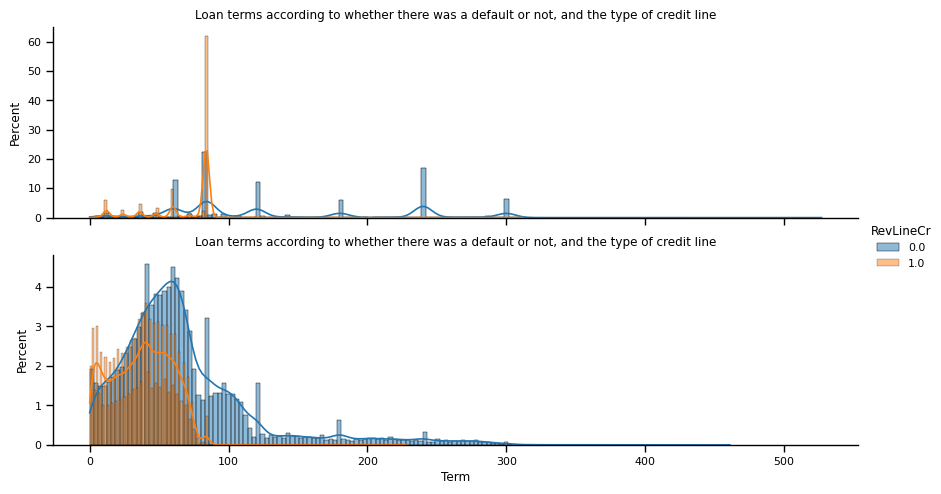

In [120]:
sns.set_context(context='paper', font_scale=0.9)
g = sns.FacetGrid(loans, row="Default", hue='RevLineCr',  aspect=3.5, height=2.5, sharey=False)
g.map(sns.histplot,"Term",  stat='percent', bins=150, kde=True);
g.add_legend();
g.set(title='Loan terms according to whether there was a default or not, and the type of credit line');

(The graph above is the loans paid on time, and the graph below is the loans that defaulted).

We see that the distributions have very different characteristics. Loans without drawbacks tend to have more precise and targeted durations, while those with drawbacks have a more dispersed distribution. This suggests to us that the loans that had payment problems had them from the beginning.

We also see that loans that defaulted on a revolving line of credit tend to have shorter durations. Another thing to note that we can see, especially in unsecured loans, is that there are peaks that correspond to a whole number of years. Let's corroborate this with a table:


In [121]:
loans.groupby(['Term']).agg(Number_of_loans=('DisbursementGross', 'count'), MeanDisbursed=('DisbursementGross', 'mean'), 
  MeanAmountApproved=('GrAppv', 'mean'), Mean_of_days_waiting=('Days_waiting', 'mean'), Default_rate= ('Default', 'mean')).sort_values(by='Number_of_loans', ascending=False).head(10)

Number_of_loans  MeanDisbursed  MeanAmountApproved   
Term                                                       
84             228911  104542.103162        88081.860147  \
60              89858   89375.725578        82089.575241   
240             85965  418968.401454       423723.654441   
120             77620  257585.275612       259972.035030   
300             44691  517904.970688       523020.395426   
180             28134  264668.169972       267618.680955   
36              19712   72747.036983        59109.513088   
12              16969  266442.364724       247279.809181   
48              15595   79479.265726        65463.971337   
72               9416  112032.466334       103884.709006   

            Mean_of_days_waiting  Default_rate  
Term                                            
84   105 days 20:03:10.855708380      0.008510  
60   106 days 05:13:04.955159952      0.027365  
240  243 days 19:43:35.406094028      0.002233  
120  100 days 07:27:36.612529001      0.013025  
300   98 days 05:04:39.563922903      0.001343  
180  140 days 08:50:30.284921566      0.012512  
36   108 days 13:24:19.658076040      0.101461  
12   157 days 11:17:22.717053336      0.071012  
48   101 days 01:19:44.581780804      0.136133  
72    94 days 11:20:11.229264143      0.149108

We see that the largest number of loans is for 7 years. We also see that 20-year loans have a particularly long lead time between approval and delivery. In fact, except for terms with few loans, 20-year terms have the longest average waiting time.

In [122]:
loans.groupby(['Term']).agg(Number_of_loans=('DisbursementGross', 'count'), MeanDisbursed=('DisbursementGross', 'mean'), 
  MeanAmountApproved=('GrAppv', 'mean'), Mean_of_days_waiting=('Days_waiting', 'mean'), 
    Default_rate= ('Default', 'mean')).sort_values(by='Mean_of_days_waiting', ascending=False).head(20)

Number_of_loans  MeanDisbursed  MeanAmountApproved   
Term                                                       
370                 2  179500.000000        1.795000e+05  \
346                 1   20000.000000        2.000000e+04   
480                 1  264000.000000        2.640000e+05   
398                 1  493000.000000        4.930000e+05   
386                 3  402000.000000        4.103333e+05   
443                 1   72000.000000        1.030000e+05   
430                 1  338000.000000        3.380000e+05   
389                 6  263333.333333        2.698333e+05   
352                 1  320000.000000        3.200000e+05   
319                 8  482837.500000        4.829625e+05   
445                 1  144000.000000        1.620000e+05   
351                 1  207000.000000        2.070000e+05   
372                 4  532375.000000        5.323750e+05   
412                 2  252500.000000        2.525000e+05   
381                 1  160000.000000        1.600000e+05   
240             85965  418968.401454        4.237237e+05   
324                10  339670.000000        3.396700e+05   
388                 3  377083.333333        3.770833e+05   
348                 9  427611.111111        4.276111e+05   
429                 1  743907.000000        1.025000e+06   

            Mean_of_days_waiting  Default_rate  
Term                                            
370            594 days 00:00:00      0.000000  
346            445 days 00:00:00      0.000000  
480            439 days 00:00:00      0.000000  
398            373 days 00:00:00      0.000000  
386            367 days 00:00:00      0.000000  
443            344 days 00:00:00      0.000000  
430            336 days 00:00:00      1.000000  
389            312 days 04:00:00      0.000000  
352            306 days 00:00:00      1.000000  
319            305 days 06:00:00      0.250000  
445            292 days 00:00:00      0.000000  
351            283 days 00:00:00      0.000000  
372            268 days 12:00:00      0.250000  
412            264 days 00:00:00      0.500000  
381            245 days 00:00:00      0.000000  
240  243 days 19:43:35.406094028      0.002233  
324            231 days 12:00:00      0.000000  
388            227 days 00:00:00      0.000000  
348            201 days 21:20:00      0.000000  
429            200 days 00:00:00      0.000000

This must have to do with backing in real estate. Remember that loans of 240 months or more are backed by real estate.

Does this support influence the default rate?

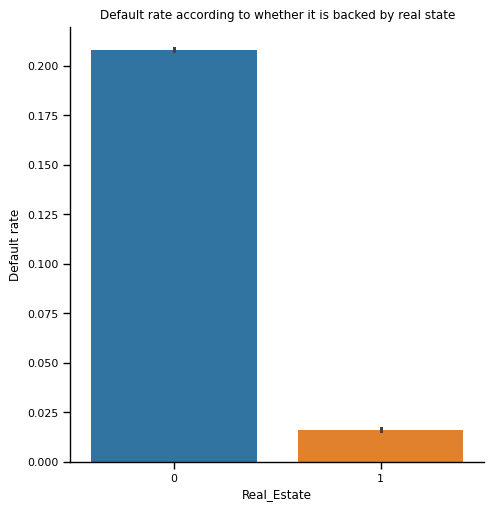

In [123]:
sns.catplot( data=loans, x='Real_Estate', y="Default", kind="bar", aspect=1);
plt.title("Default rate according to whether it is backed by real state");
plt.ylabel('Default rate');

In [124]:
loans.groupby(['Real_Estate']).agg(Number_of_loans=('DisbursementGross', 'count'), MeanDisbursed=('DisbursementGross', 'mean'), 
  MeanAmountApproved=('GrAppv', 'mean'), Mean_of_days_waiting=('Days_waiting', 'mean'), MeanTerm=('Term', 'mean'), 
                                  Default_rate= ('Default', 'mean'))

Number_of_loans  MeanDisbursed  MeanAmountApproved   
Real_Estate                                                       
0                     744979  146600.780967       135231.093017  \
1                     152093  470979.791134       476303.602033   

                   Mean_of_days_waiting    MeanTerm  Default_rate  
Real_Estate                                                        
0            99 days 09:10:09.404935626   79.883841      0.208167  
1           182 days 10:00:03.882933244  262.539164      0.016286

In [125]:
describe_values(loans, 'Real_Estate', 'Default')

count  missing  unique_values      mean       std  mode  min   
Real_Estate                                                                    
0            744979.0      0.0            2.0  0.208167  0.405997   0.0  0.0  \
1            152093.0      0.0            2.0  0.016286  0.126574   0.0  0.0   

             25%  50%  75%  max      skew   kurtosis  
Real_Estate                                           
0            0.0  0.0  0.0  1.0  1.437615   0.066738  
1            0.0  0.0  0.0  1.0  7.643285  56.420549

Real estate-backed installments are much more likely to be free of drawbacks. The difference is very large, a default rate of 20.8% if they are not backed by real estate versus 1.6% for those that are backed.

Let's look at the declared dates of problems with payments.

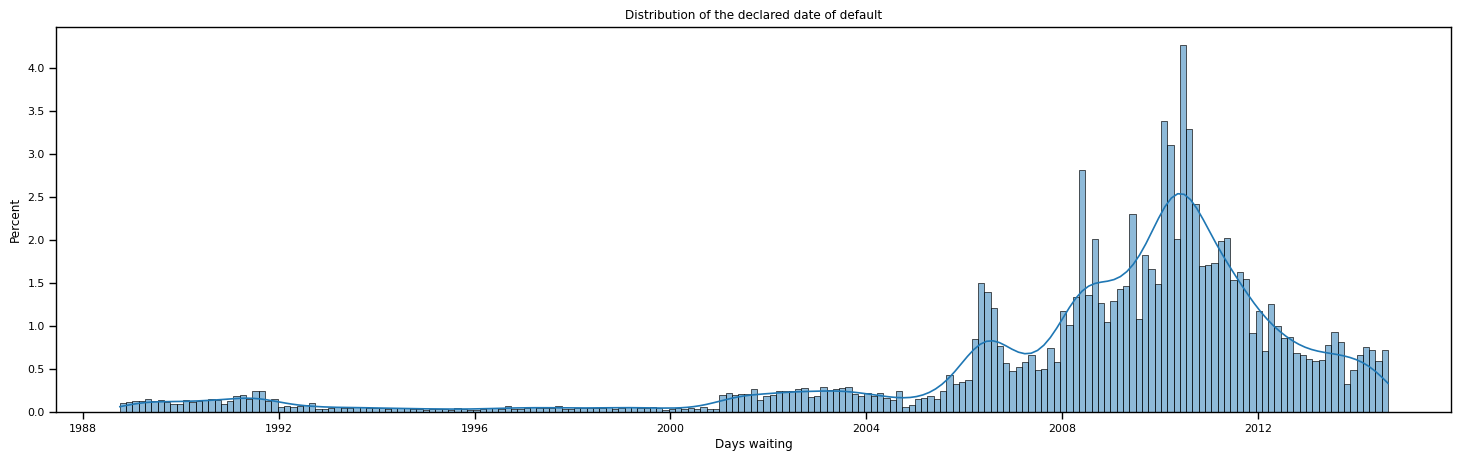

In [126]:
fig, ax = plt.subplots(figsize=(18, 5));
sns.histplot(data=loans, x='ChgOffDate', ax=ax, kde=True, stat='percent', common_norm=False);
ax.set(xlabel='Days waiting', title='Distribution of the declared date of default');

This shows that in the 2008-2012 range there were more drawbacks than in any other range of years. Remember that the mortgage crisis occurred within that range.
We wonder what happened to payments backed by real estate.

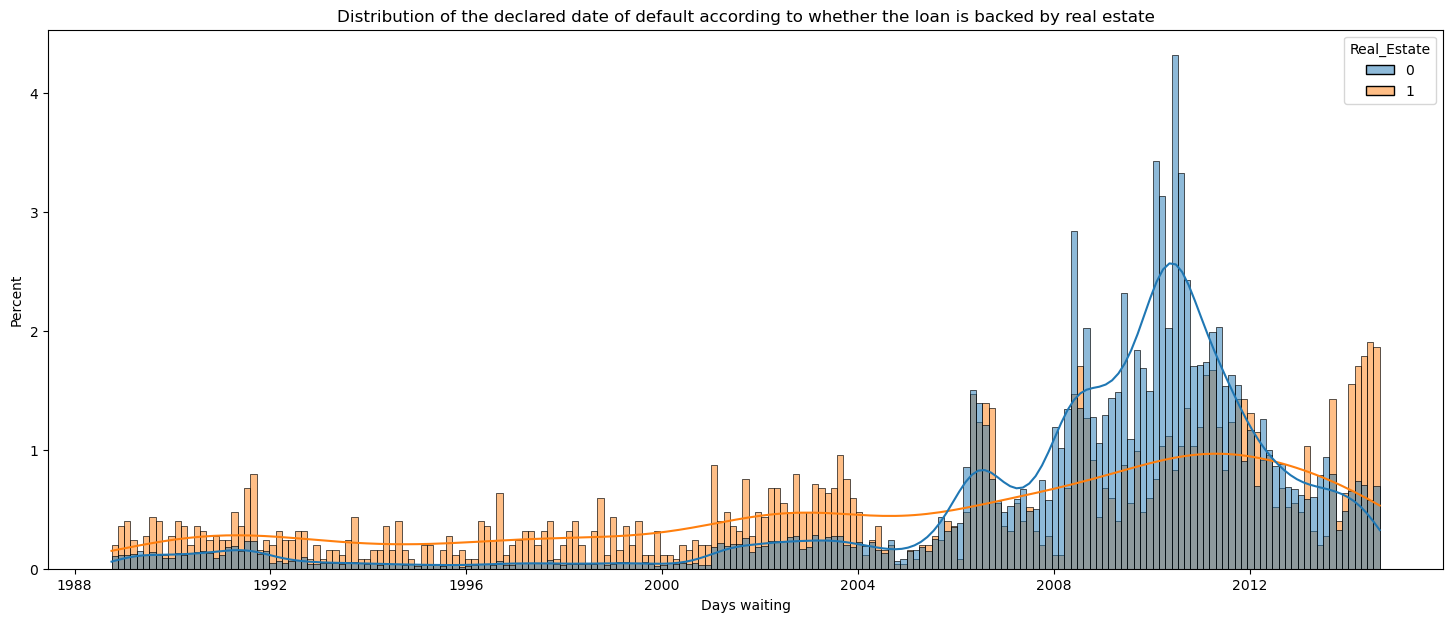

In [601]:
fig, ax = plt.subplots(figsize=(18, 7));
sns.histplot(data=loans, x='ChgOffDate', ax=ax, kde=True, stat='percent', hue = 'Real_Estate', common_norm=False);
ax.set(xlabel='Days waiting', title='Distribution of the declared date of default according to whether the loan is backed by real estate');

We see that loans backed by real estate were safer than unbacked ones during the peak of the mortgage crisisd but struggled later. We also see that there were years (2001-2005 for example) where these loans had more problems than those not backed by real estate.

Let's look at the number of loans with and without drawbacks, by year of delivery. We should see something similar.

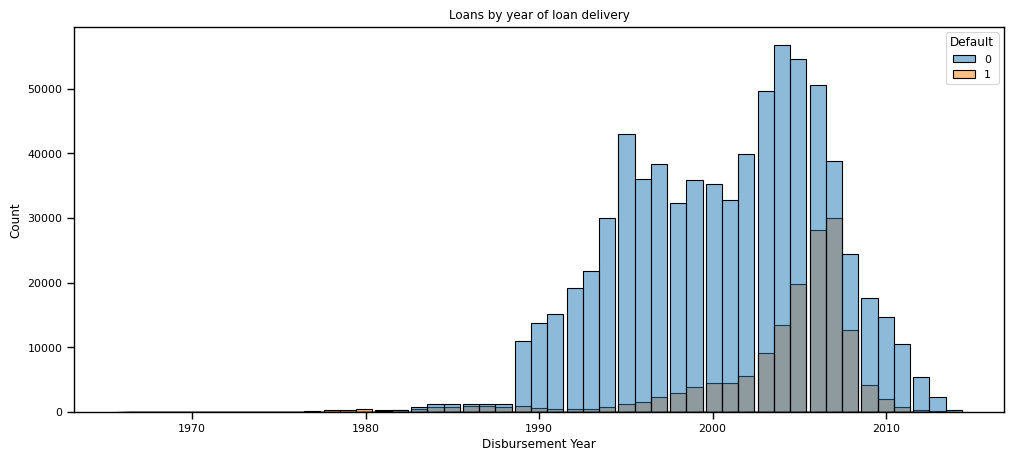

In [128]:
aux=loans # This dataframe is created to create the plot and not change the int64 format of loans['DirbursementYear']
#column, which we think is the most correct. In previous versions of Seaborn it accepts int64 as the dtype, but in this
#version it no longer accepts.
aux['DisbursementYear']=loans['DisbursementYear'].astype(float)

fig, ax = plt.subplots(figsize=(12, 5));
sns.histplot(data=aux, x='DisbursementYear', hue= 'Default', ax=ax , shrink=5,  legend=True);
ax.set(title='Loans by year of loan delivery');
ax.set_xlabel('Disbursement Year');

We see two things that seem relevant to us: 1) The number of loans with payment problems is very high for loans made around 2007. 2) The number of loans dated less than 1989 is much lower.

Let's look at a graph of the ratio of 1).

In [129]:
g=loans.groupby(['DisbursementYear']).mean(numeric_only=True)

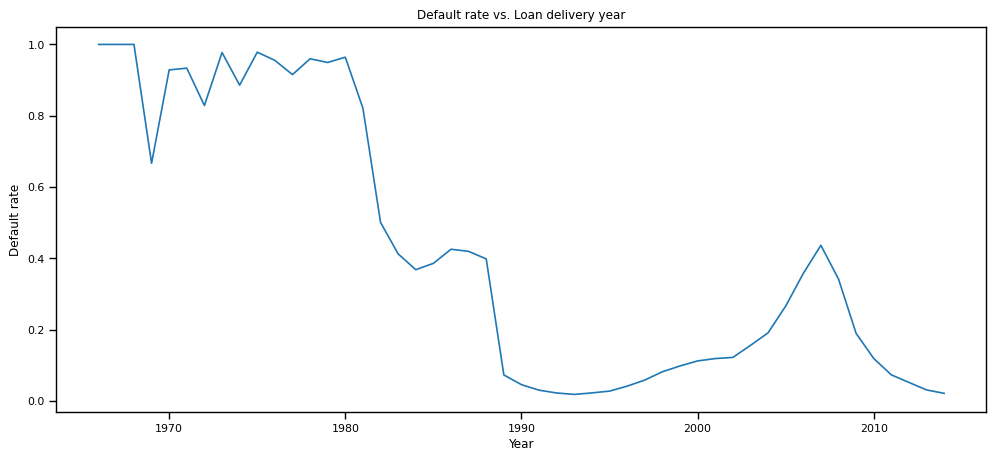

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
ax.plot(g.index, g['Default']);
ax.set_title('Default rate vs. Loan delivery year') 
ax.set_xlabel('Year')  
ax.set_ylabel('Default rate');


In [131]:
describe_values(loans, 'GreatRecession', 'Default')

count  missing  unique_values      mean       std  mode   
GreatRecession                                                               
0               766874.0      0.0            2.0  0.139108  0.346059   0.0  \
1               130198.0      0.0            2.0  0.390782  0.487927   0.0   

                min  25%  50%  75%  max      skew  kurtosis  
GreatRecession                                               
0               0.0  0.0  0.0  0.0  1.0  2.085733  2.350288  
1               0.0  0.0  0.0  1.0  1.0  0.447689 -1.799602

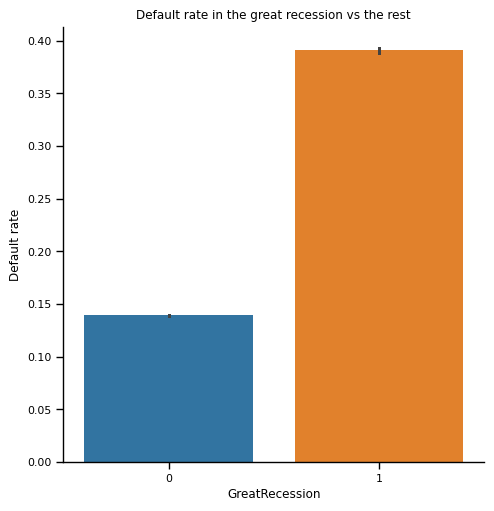

In [132]:
sns.catplot( data=loans, x='GreatRecession', y="Default", kind="bar", aspect=1);
plt.title("Default rate in the great recession vs the rest");
plt.ylabel('Default rate');

We see that around the real estate crisis of 2007-2008 we have a peak of problems. In fact, the default rate is 3 times higher. We conclude that the economic context is one of the most important factors. On the other hand, before 1990 we see that the proportion of defaults is very high, reaching 1 in years close to 1970. We conjecture that this may be due to less and selective data collection. Let's study that better.

In [133]:
default_by_disb_year=loans.groupby(['DisbursementYear']).agg(Number_of_loans=('Default', 'count'),
                                        Default_rate=('Default', 'mean'))
default_by_disb_year

Number_of_loans  Default_rate
DisbursementYear                               
1966.0                          1      1.000000
1968.0                          2      1.000000
1969.0                          3      0.666667
1970.0                         14      0.928571
1971.0                         15      0.933333
1972.0                         35      0.828571
1973.0                         44      0.977273
1974.0                         35      0.885714
1975.0                         46      0.978261
1976.0                         67      0.955224
1977.0                        130      0.915385
1978.0                        248      0.959677
1979.0                        336      0.949405
1980.0                        503      0.964215
1981.0                        452      0.820796
1982.0                        653      0.500766
1983.0                       1205      0.412448
1984.0                       1953      0.368152
1985.0                       2003      0.385921
1986.0                       2054      0.425511
1987.0                       2176      0.419577
1988.0                       2066      0.398354
1989.0                      11785      0.073059
1990.0                      14458      0.045719
1991.0                      15694      0.030266
1992.0                      19582      0.022367
1993.0                      22278      0.018359
1994.0                      30764      0.022624
1995.0                      44175      0.027617
1996.0                      37595      0.041548
1997.0                      40700      0.058550
1998.0                      35262      0.081901
1999.0                      39789      0.098193
2000.0                      39725      0.112297
2001.0                      37278      0.118944
2002.0                      45465      0.122160
2003.0                      58896      0.155817
2004.0                      70128      0.191065
2005.0                      74490      0.265995
2006.0                      78767      0.357599
2007.0                      68789      0.436552
2008.0                      37058      0.342031
2009.0                      21715      0.189454
2010.0                      16735      0.119151
2011.0                      11376      0.073136
2012.0                       5752      0.051982
2013.0                       2363      0.030893
2014.0                        234      0.021368

We found that before 1989 the number of loans per year was not much more than 2,000, and in years before 1970 there were only 6 loans, so we understand that very few were registered. Probably with a lot more emphasis on those who had problems. In other words, they are a biased selection.

In [134]:
#For pdf
#h=g=loans[loans['DisbursementYear']>1989].groupby(['DisbursementYear']).mean()
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
#ax.plot(h.index, h['Default']);
#ax.set_title('Tasa de default vs año de entrega del préstamo', size=12) 
#ax.set_xlabel('Año', size=10)  
#ax.set_ylabel('Tasa de default', size=10);
#plt.savefig("Default_vs_year.png", dpi=100)

### Observations on the data set and actions to perform for the model

* The Sector column has zeros, inherited from the NAICS column. The are Sector unclassified cases.

* We renamed the target variable and it is now called 'Default', and it is binary.

* The 'ApprovalFY' (approval fiscal year) field and the 'ApprovalYear' field are simply a change of months from each other, as one might imagine. So since it does not provide new information, we are going to delete the 'ApprovalFY' field.

* Because they are fields that are known after the loans are approved by the SBA, or have no predictive value, the fields 'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'ApprovalFY', 'DisbursementGross' and 'GrAppv' will be deleted.

* The null values of the fields 'State', 'Bank', 'BankState' and 'SameState' will be filled with the value 'Unknown'.

* The null values of the fields 'RevLineCr' and 'LowDoc' will be filled with the value -1.

### Insights and conclusions

* Although the default rate is highly related to the bank, since there are around 5,800 different banks, it cannot be used directly to build a predictive model. One possibility is to rule out banks with few credits (75% of banks have 38 credits or less), another is to use related variables such as the state of the bank, if it is from the same state as the company, or to create a variable that categorizes the banks according to your default rate (in the training set). 

* There is no correlation between the default rate and the amount of loans the bank has (see appendix).

* Although the state of the bank branch has an impact, it is much more important if the state of the branch is the same as that of the company or not.

* There is a little difference in the default rate if the company is a franchise. It is a variable that is not important in the model and we are going to remove it.

* The business sector has a notorious relationship with the default rate. 

* There is a small difference in the default rate between loans from companies that took several and those that took only one (see appendix).

* More than 50% of the loans that defaulted have the ratio Mount_approved_by_bank-Mount_guaranteed_by_SBA around 2 (see appendix).

* Revolving line credits have a default rate more than 10% higher than the other ones.

* Loans with low documentation have a much lower default rate on average, less than half that of the others.

* Loans without drawbacks tend to have more precise and targeted durations, while those with drawbacks have a more dispersed distribution. We see that the largest number of loans is for 8 years. We also see that 20-year loans have a particularly long lead time between approval and delivery. In fact, except for terms with few loans, 20-year terms have the longest average waiting time.

* Real estate-backed installments are much more likely to be free of drawbacks. The difference is very large, a default rate of 20.8% if they are not backed by real estate versus 1.6% for those that are backed.

* Disbursements on loans that defaulted are on average lower than those that did not. This can be reasonably explained by arguing that the problem loans are lower because the SBA approved less money, due to the solvency of the company, problems with the papers or a bad evaluation (by the company or the sba) of the amount necessary for the company to overcome their financial problems. Also, in part, this difference may be due to the fact that larger loans tend to be backed by real estate, and that makes them much more secure.

* For companies with fewer than 60 employees, as the number of employees increases, the default rate is usually lower. After 60 employees this decline is weaker, you see it drop down to the range \[250- 463) and then it's no longer very clear what happens, possibly because of sample size error.

* Loans backed by real estate were safer than unbacked ones during the peak of the mortgage crisis, but they ran into trouble later. On the other hand, there were years (2001-2005 for example) where these loans had more problems than those that were not backed by real estate.

* The number of loans with payment problems is very high for loans made around 2007. In fact, the default rate in the Great Recession were 3 times higher.

    Before 1989 the number of loans per year was not much more than 2,000, and in years before 1970 there were only 6 loans, so we understand that very few were registered. Probably with a lot more emphasis on those who had problems. In other words, they are a biased selection.
    
* As mentioned in the previous items, the economic context is very important, but we do not have contextual economic variables that work for us to predict (in the appendix we tested 3 indicators without much success). Because of this, it seems like a good idea to restrict the training data set to loans issued in the last 10 to 15 years.

    Unfortunately, the last 10 years of the data set has been through the great recession, where we saw the default rate skyrocket and it wouldn't be a good idea to just take that. We are going to try taking the records in which the loan was delivered from 1990 onwards and comparing them with a model of all the years, to see which is better.

In [135]:
#loans.to_pickle('Should This Loan be Approved or Denied - EDA complete.pkl')

### Cleaning and preparation before training

In [2]:
# For run from this section, uncomment this cell and run it. 

#%run "./loans - quick start.ipynb"

##from google.colab import drive # We mount a Google Drive folder where the dataset is.
##drive.mount('/content/drive', force_remount=True)

##path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
#path = "./"

#loans = pd.read_pickle(path + 'Should This Loan be Approved or Denied - EDA complete.pkl') 

In [604]:
loans.drop(['Name', 'City', 'Zip', 'ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'ApprovalYear', 
            'Days_waiting', 'GreatRecession', 'Disb_vs_GrAppv', 'Disb_vs_GrAppv_is_positive', 'NoEmp_grouped'], axis=1, inplace=True) 

We have not deleted the bank column yet because with it we are going to create a categorical variable based on the values of the training subset.

We are going to create two different models, one of the entire period, and another based on the records only from 1990.

In [605]:
loans_last_years = loans[loans['DisbursementYear']>=1990].copy(deep=True)

#### Records from all years

In [606]:
loans.drop(['DisbursementYear'], inplace=True, axis=1)

For the processes to work well, we need the columns to not have mixed types. SameState is a column that is boolean on the one hand, and string('Unknown') on the other. We convert it to string.

In [607]:
loans['SameState'] = loans['SameState'].replace({True: 'True', False: 'False', 'Unknown': 'Unknown'})

The column 'Bank' will be replaced by a category column, where its values will depend on the data set (training), so we have to split before we drop it.

In [608]:
X_train , X_test, y_train, y_test = train_test_split(loans, loans['Default'] , test_size=0.2, random_state=27, stratify=loans['Default'])
#We haven't thrown away the target column yet because we're going to use it to categorize the banks.

In [609]:
bank_classification= X_train.groupby(['Bank']).agg(Default_rate=('Default', 'mean'), Amount_of_loans=('Bank', 'count')).sort_values(by=['Amount_of_loans'], ascending=False)
bank_classification=bank_classification.reset_index() # We put the bank as a column, creating a new index.
bank_classification.head(5)

Bank  Default_rate  Amount_of_loans
0      BANK OF AMERICA NATL ASSOC      0.275319            69465
1     WELLS FARGO BANK NATL ASSOC      0.140923            50673
2  JPMORGAN CHASE BANK NATL ASSOC      0.275681            38657
3  U.S. BANK NATIONAL ASSOCIATION      0.175599            28195
4        CITIZENS BANK NATL ASSOC      0.221510            26974

To establish a pattern of which is a low risk bank or which is a high risk bank, let's look at the default rate of all banks with at least 100 loans (we only look at these banks because if a bank has less than 100 loans the default rate is very inaccurate).

In [610]:
bank_classification[bank_classification['Amount_of_loans']>99].describe()

Default_rate  Amount_of_loans
count    668.000000       668.000000
mean       0.103150       961.878743
std        0.096726      4229.854931
min        0.000000       100.000000
25%        0.042584       143.750000
50%        0.091562       221.000000
75%        0.139237       457.250000
max        0.873926     69465.000000

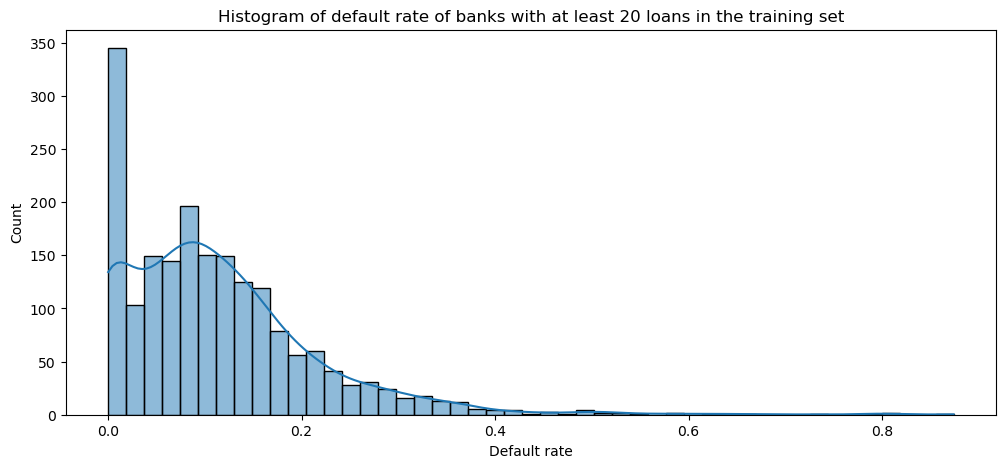

In [611]:
fig, ax = plt.subplots(figsize=(12, 5));
sns.histplot(data=bank_classification[bank_classification['Amount_of_loans']>19], x="Default_rate", legend=False, ax=ax, kde=True)
ax.set(title='Histogram of default rate of banks with at least 20 loans in the training set');
ax.set_xlabel('Default rate');

Taking all this into account, we will consider the following categories:

* If a bank has less than 20 loans, the category is Unknown.

* If a bank has at least 20 loans:

                           if Default_rate < 0.05 , the category is 'Very low risk';
                           if 0.05<= Default_rate < 0.10 , the category is 'Low risk';
                           if 0.10<= Default_rate < 0.15 , the category is 'Medium risk';
                           if 0.15<= Default_rate < 0.20 , the category is 'High risk';
                           if 0.20<= Default_rate, the category is 'Very high risk'.

In [612]:
def bank_class(def_rate, amount_loans):
    if amount_loans>=20:
        if def_rate < 0.05:
            return 'Very low risk'
        elif (0.05<= def_rate)&(def_rate<0.10):
            return 'Low risk'
        elif (0.10<= def_rate)&(def_rate<0.15):
            return 'Medium risk'
        elif (0.15<= def_rate)&(def_rate<0.20):
            return 'High risk'
        else:
            return 'Very high risk'
    else:
        return 'Unknown'  

In [613]:
bank_classification['Category']=bank_classification.apply(lambda x: bank_class(x['Default_rate'], x['Amount_of_loans']), axis=1)

The distribution of banks with this new category is as follows:

In [614]:
bank_classification.stb.freq(['Category'])

Category  count    percent  cumulative_count  cumulative_percent
0         Unknown   3678  65.984930              3678           65.984930
1   Very low risk    552   9.903122              4230           75.888052
2        Low risk    432   7.750269              4662           83.638321
3     Medium risk    379   6.799426              5041           90.437747
4  Very high risk    297   5.328310              5338           95.766057
5       High risk    236   4.233943              5574          100.000000

In [615]:
bank_classification['Category'].isnull().sum() # the function filled all the rows (if it didn't fill them all it would be
# a symptom that something didn't work well).

0

In [616]:
bank_classification.drop(['Default_rate', 'Amount_of_loans'], inplace=True, axis=1)
bank_classification.set_index('Bank', inplace=True)

Finally, we create the classification dictionary:

In [617]:
bank_class_dict = (bank_classification.to_dict())['Category']

Now we add the new field in the training sets according to the dictionaries of each model.

In [618]:
X_train['BankClass']= X_train['Bank'].map(bank_class_dict)
X_train.loc[X_train['Bank'].isnull(), 'BankClass']='Unknown' # In the rows that have the empty field 'bank' we fill 
#with 'Unknown'.

We can now drop the bank and default columns of the training set.

In [619]:
X_train.drop(['Bank', 'Default'], axis=1, inplace=True)

In [620]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717657 entries, 449021 to 652168
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   State         717646 non-null  object 
 1   BankState     716431 non-null  object 
 2   Term          717657 non-null  int64  
 3   NoEmp         717657 non-null  int64  
 4   NewExist      717546 non-null  float64
 5   CreateJob     717657 non-null  int64  
 6   RetainedJob   717657 non-null  int64  
 7   UrbanRural    717657 non-null  int64  
 8   RevLineCr     496203 non-null  float64
 9   LowDoc        712825 non-null  float64
 10  Is_franchise  717657 non-null  int64  
 11  Sector        717657 non-null  object 
 12  Real_Estate   717657 non-null  int64  
 13  SameState     717657 non-null  object 
 14  BankClass     717657 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 87.6+ MB


We are going to make a pipeline of transformations for the x_train dataframe.

In [23]:
# We generate a pipeline for numeric columns.
numeric_transformer = Pipeline(
    steps=[('fill', SimpleImputer(strategy='constant', fill_value=-1)), 
           ("scaler", StandardScaler())])

# We generate pipelines for categories. Depending on which column it is, I will use onehotencoder or ordinalencoder.
h_encoder = OneHotEncoder(handle_unknown='ignore', #we put ignore to be able to omit when it can happen that the same values
                          #do not exist
                        sparse=False) # generate it as matrix to be able to generate the proper columns
le = OrdinalEncoder(handle_unknown='use_encoded_value' , # the encoded value of unknown categories will be set to the value given for 
                    unknown_value=-1) # the parameter unknown_value
le_bank_class = OrdinalEncoder(categories=[['Unknown','Very low risk','Low risk', 'Medium risk', 'High risk', 
                                            'Very high risk' ]], handle_unknown='use_encoded_value', unknown_value=-1) # We 
# pass the order of the categories so that it encodes 0 for 'Unknown', 1 for 'Very low risk', 2 for 'Low risk', 3 for 
#'Medium risk', 4 for 'High risk' and 5 for 'Very high risk'. Making the numbers consistent with the risk is better 
# for the algorithm. 

# We define different pipelines for the categorical columns.

categorical_transformer_1 = Pipeline(
    steps=[('fill', SimpleImputer(strategy='constant', fill_value='Unknown')), ('encode_1', h_encoder), ("scaler", StandardScaler())])
categorical_transformer_2 = Pipeline(
    steps=[('fill', SimpleImputer(strategy='constant', fill_value='Unknown')), ('encode_2', le), ("scaler", StandardScaler())])
categorical_transformer_3 = Pipeline(
    steps=[('fill', SimpleImputer(strategy='constant', fill_value='Unknown')), ('encode_3', le_bank_class), ("scaler", StandardScaler())])

# Function that performs the work for each pipeline and then join it.
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ("cat_1", categorical_transformer_1, ['SameState']),
        ("cat_2", categorical_transformer_2, ['State', 'BankState', 'Sector']),
        ("cat_3", categorical_transformer_3, ['BankClass'])
    ]
)

# Training of the pipeline.
preprocessor.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000028EE3851730>),
                                ('cat_1',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encode_1',
                                                  OneHotEncoder(handl...
                                 ['State', 'BankState', 'Sector']),
                                ('cat_3',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encode_3',
                                                  OrdinalEncoder(categories=[['Unknown',
                                                                              'Very '
                                                                              'low '
                                                                              'risk',
                                                                              'Low '
                                                                              'risk',
                                                                              'Medium '
                                                                              'risk',
                                                                              'High '
                                                                              'risk',
                                                                              'Very '
                                                                              'high '
                                                                              'risk']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('scaler', StandardScaler())]),
                                 ['BankClass'])])

In [24]:
# Transformation of X_train
X_train_array_enc = preprocessor.transform(X_train)
X_train_array_enc # X_train_array_enc is an array.

array([[-1.21437898,  0.24692656, -0.61877206, ..., -0.20029755,
         0.68021889,  1.12072577],
       [-0.33984711, -0.12589173,  1.59116071, ..., -1.45860652,
         1.17165558,  1.12072577],
       [-0.64403211, -0.13920667, -0.61877206, ..., -1.45860652,
        -0.17979532, -0.22779353],
       ...,
       [-1.16368148, -0.12589173,  1.59116071, ...,  0.11427969,
         0.68021889,  1.12072577],
       [-0.60600898, -0.13920667, -0.61877206, ..., -1.08111383,
         1.5402331 ,  1.12072577],
       [-0.64403211, -0.13920667,  1.59116071, ..., -0.70362114,
        -0.17979532,  0.44646612]])

In [25]:
columns_enc = np.concatenate((X_train.select_dtypes(exclude='object').columns, 
                        preprocessor.named_transformers_['cat_1'].get_feature_names_out(),
                        preprocessor.named_transformers_['cat_2'].get_feature_names_out(),       
                        preprocessor.named_transformers_['cat_3'].get_feature_names_out())) # Get the columns name.
columns_enc 

array(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'Real_Estate',
       'SameState_False', 'SameState_True', 'SameState_Unknown', 'State',
       'BankState', 'Sector', 'BankClass'], dtype=object)

In [26]:
X_train_enc = pd.DataFrame(X_train_array_enc, columns = columns_enc, index=X_train.index)
X_train_enc.head() # This is the training set encoded.

Term     NoEmp  NewExist  CreateJob  RetainedJob  UrbanRural   
449021 -1.214379  0.246927 -0.618772  -0.014571     0.080842    1.921573  \
725091 -0.339847 -0.125892  1.591161  -0.035661    -0.037130    0.374855   
743319 -0.644032 -0.139207 -0.618772  -0.031443    -0.041343    0.374855   
136039 -0.339847 -0.112577  1.591161  -0.031443    -0.045557    0.374855   
80364  -0.339847 -0.072632 -0.618772  -0.031443    -0.016063    0.374855   

        RevLineCr    LowDoc  Is_franchise  Real_Estate  SameState_False   
449021   1.495828 -0.340305     -0.246813     -0.45152        -0.942561  \
725091  -1.262886 -0.340305     -0.246813     -0.45152         1.060939   
743319  -1.262886 -0.340305     -0.246813     -0.45152        -0.942561   
136039   1.495828 -0.340305     -0.246813     -0.45152         1.060939   
80364    0.116471 -0.340305     -0.246813     -0.45152         1.060939   

        SameState_True  SameState_Unknown     State  BankState    Sector   
449021        0.945827          -0.041553 -0.119935  -0.200298  0.680219  \
725091       -1.057276          -0.041553  0.208100  -1.458607  1.171656   
743319        0.945827          -0.041553 -1.300858  -1.458607 -0.179795   
136039       -1.057276          -0.041553  1.257809  -0.703621 -0.671232   
80364        -1.057276          -0.041553  0.404920   0.932181 -0.302654   

        BankClass  
449021   1.120726  
725091   1.120726  
743319  -0.227794  
136039   1.120726  
80364    1.120726

In [27]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717657 entries, 449021 to 652168
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               717657 non-null  float64
 1   NoEmp              717657 non-null  float64
 2   NewExist           717657 non-null  float64
 3   CreateJob          717657 non-null  float64
 4   RetainedJob        717657 non-null  float64
 5   UrbanRural         717657 non-null  float64
 6   RevLineCr          717657 non-null  float64
 7   LowDoc             717657 non-null  float64
 8   Is_franchise       717657 non-null  float64
 9   Real_Estate        717657 non-null  float64
 10  SameState_False    717657 non-null  float64
 11  SameState_True     717657 non-null  float64
 12  SameState_Unknown  717657 non-null  float64
 13  State              717657 non-null  float64
 14  BankState          717657 non-null  float64
 15  Sector             717657 non-null  float64
 16  Ba

This training set is already ready to train. It remains to apply all the same transformations to the test set.

In [28]:
X_test['BankClass']= X_test['Bank'].map(bank_class_dict)
X_test.loc[X_test['Bank'].isnull(), 'BankClass']='Unknown' # In the rows that have the empty field 'bank' we fill 
#with 'Unknown'.

In [29]:
X_test.isnull().sum()

State               2
Bank              285
BankState         286
Term                0
NoEmp               0
NewExist           23
CreateJob           0
RetainedJob         0
UrbanRural          0
RevLineCr       55786
LowDoc           1166
Is_franchise        0
Default             0
Sector              0
Real_Estate         0
SameState         288
BankClass         258
dtype: int64

The banks that were not classified are banks that were not in the training, so in the classification they have to be unknown.

In [30]:
X_test['BankClass'].fillna(value='Unknown', inplace=True)

We can now drop the bank and default columns of the test set. (We could have thrown away the default column of X_test much earlier, as soon as X_test was created, since to categorize the banks only the default column of X_train was used).

In [31]:
X_test.drop(['Bank', 'Default'], axis=1, inplace=True)

And we continue with the rest of the procedure. This procedure is the preprocessing pipeline we created earlier, so we just need to run that pipeline.

In [32]:
X_test_array_enc = preprocessor.transform(X_test)

In [33]:
X_test_enc = pd.DataFrame(X_test_array_enc, columns = columns_enc, index=X_test.index)
X_test_enc.head() # This is the training set encoded.

Term     NoEmp  NewExist  CreateJob  RetainedJob  UrbanRural   
785946  0.116430 -0.112577 -0.618772  -0.035661    -0.045557    0.374855  \
312721 -0.339847 -0.139207  1.591161  -0.035661    -0.045557    0.374855   
482999 -0.948217 -0.059317  1.591161  -0.031443    -0.045557    1.921573   
350499 -0.339847  0.380076 -0.618772  -0.035661    -0.045557   -1.171863   
693259 -0.339847 -0.139207 -0.618772  -0.035661    -0.041343    0.374855   

        RevLineCr    LowDoc  Is_franchise  Real_Estate  SameState_False   
785946   0.116471 -0.340305     -0.246813     -0.45152        -0.942561  \
312721  -1.262886  2.597108      4.051654     -0.45152        -0.942561   
482999   0.116471 -0.340305     -0.246813     -0.45152        -0.942561   
350499   0.116471 -0.340305     -0.246813     -0.45152        -0.942561   
693259   1.495828 -0.340305     -0.246813     -0.45152         1.060939   

        SameState_True  SameState_Unknown     State  BankState    Sector   
785946        0.945827          -0.041553 -1.300858  -1.458607 -0.302654  \
312721        0.945827          -0.041553  1.257809   1.183842 -1.285528   
482999        0.945827          -0.041553  0.929775   0.806350  0.557360   
350499        0.945827          -0.041553 -0.644789  -0.703621 -0.302654   
693259       -1.057276          -0.041553 -0.972824   0.114280 -0.302654   

        BankClass  
785946   0.446466  
312721  -0.227794  
482999  -1.576313  
350499  -0.902053  
693259   1.120726

In [34]:
X_test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179415 entries, 785946 to 439013
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               179415 non-null  float64
 1   NoEmp              179415 non-null  float64
 2   NewExist           179415 non-null  float64
 3   CreateJob          179415 non-null  float64
 4   RetainedJob        179415 non-null  float64
 5   UrbanRural         179415 non-null  float64
 6   RevLineCr          179415 non-null  float64
 7   LowDoc             179415 non-null  float64
 8   Is_franchise       179415 non-null  float64
 9   Real_Estate        179415 non-null  float64
 10  SameState_False    179415 non-null  float64
 11  SameState_True     179415 non-null  float64
 12  SameState_Unknown  179415 non-null  float64
 13  State              179415 non-null  float64
 14  BankState          179415 non-null  float64
 15  Sector             179415 non-null  float64
 16  Ba

#### Records from last years

We do the same as with the set that includes the entire range of years.

In [35]:
loans_last_years.drop(['DisbursementYear'], inplace=True, axis=1)

In [36]:
loans_last_years['SameState'] = loans_last_years['SameState'].replace({True: 'True', False: 'False', 'Unknown': 'Unknown'})

The column 'Bank' will be replaced by a category column, where its values will depend on the data set (training), so we have to split before we drop it. 

In [37]:
X_last_years_train , X_last_years_test, y_last_years_train, y_last_years_test = train_test_split(loans_last_years, 
                                                                                                 loans_last_years['Default'],
                                                                                                 test_size=0.2, 
                                                                                                 random_state=27, 
                                                                                                 stratify=loans_last_years['Default'])
#We haven't thrown away the target column yet because we're going to use it to categorize the banks.

In [38]:
bank_classification_last_years= X_last_years_train.groupby(['Bank']).agg(Default_rate=('Default', 'mean'), Amount_of_loans=('Bank', 'count')).sort_values(by=['Amount_of_loans'], ascending=False)
bank_classification_last_years=bank_classification_last_years.reset_index() # We put the bank as a column, creating a new index.
bank_classification_last_years.head(5)

Bank  Default_rate  Amount_of_loans
0      BANK OF AMERICA NATL ASSOC      0.271907            67810
1     WELLS FARGO BANK NATL ASSOC      0.133476            49170
2  JPMORGAN CHASE BANK NATL ASSOC      0.273488            37636
3  U.S. BANK NATIONAL ASSOCIATION      0.166011            26932
4        CITIZENS BANK NATL ASSOC      0.225362            26788

For the classification, we use the same rating scale that we used before (i.e. bank_class function):

In [39]:
bank_classification_last_years['Category']=bank_classification_last_years.apply(lambda x: bank_class(x['Default_rate'], x['Amount_of_loans']), axis=1)

In [40]:
bank_classification_last_years['Category'].value_counts(normalize=True) # The percentages of the different categories are 
# very similar to the previous case.

Category
Unknown           0.650943
Very low risk     0.111698
Low risk          0.085660
Medium risk       0.063396
Very high risk    0.049811
High risk         0.038491
Name: proportion, dtype: float64

In [41]:
bank_classification_last_years.drop(['Default_rate', 'Amount_of_loans'], inplace=True, axis=1)
bank_classification_last_years.set_index('Bank', inplace=True)
bank_class_ly_dict = (bank_classification_last_years.to_dict())['Category']

In [42]:
X_last_years_train['BankClass']= X_last_years_train['Bank'].map(bank_class_ly_dict)
X_last_years_train.loc[X_last_years_train['Bank'].isnull(), 'BankClass']='Unknown'  # In the rows that have the empty 
#field 'bank' we fill with 'Unknown'.

In [43]:
X_last_years_train.drop(['Bank', 'Default'], axis=1, inplace=True)

In [44]:
X_last_years_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695254 entries, 600759 to 651512
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   State         695248 non-null  object 
 1   BankState     694403 non-null  object 
 2   Term          695254 non-null  int64  
 3   NoEmp         695254 non-null  int64  
 4   NewExist      695149 non-null  float64
 5   CreateJob     695254 non-null  int64  
 6   RetainedJob   695254 non-null  int64  
 7   UrbanRural    695254 non-null  int64  
 8   RevLineCr     473663 non-null  float64
 9   LowDoc        690500 non-null  float64
 10  Is_franchise  695254 non-null  int64  
 11  Sector        695254 non-null  object 
 12  Real_Estate   695254 non-null  int64  
 13  SameState     694397 non-null  object 
 14  BankClass     695254 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 84.9+ MB


We can take advantage of the pipeline that we made before because the transformations that we will apply are the same, but we must retrain it for this dataset.

In [45]:
# Training of the pipeline.
preprocessor.fit(X_last_years_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000028EE3851730>),
                                ('cat_1',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encode_1',
                                                  OneHotEncoder(handl...
                                 ['State', 'BankState', 'Sector']),
                                ('cat_3',
                                 Pipeline(steps=[('fill',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('encode_3',
                                                  OrdinalEncoder(categories=[['Unknown',
                                                                              'Very '
                                                                              'low '
                                                                              'risk',
                                                                              'Low '
                                                                              'risk',
                                                                              'Medium '
                                                                              'risk',
                                                                              'High '
                                                                              'risk',
                                                                              'Very '
                                                                              'high '
                                                                              'risk']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('scaler', StandardScaler())]),
                                 ['BankClass'])])

In [46]:
# Transformation of X_last_years_train
X_last_years_train_array_enc = preprocessor.transform(X_last_years_train)
X_last_years_train_array_enc # X_last_years_train_array_enc is an array.

array([[ 0.13211372,  0.01464765, -0.62087847, ..., -1.39511502,
        -0.45387289, -0.20575247],
       [-0.63432517, -0.13138819, -0.62087847, ...,  1.24597123,
        -0.70116624,  0.46078169],
       [ 0.13211372,  0.1606835 , -0.62087847, ...,  0.55425816,
        -0.45387289, -1.53882078],
       ...,
       [-0.63432517,  0.02925124,  1.58598053, ...,  0.55425816,
         1.52447389,  0.46078169],
       [-0.58322925, -0.14599178,  1.58598053, ...,  1.18308822,
        -0.20657955, -0.87228662],
       [-0.32774962, -0.14599178, -0.62087847, ...,  0.11407712,
        -0.45387289,  1.12731584]])

We already had the names of the columns from the previous model so we can now build the encoded training dataframe.

In [47]:
X_last_years_train_enc = pd.DataFrame(X_last_years_train_array_enc, columns = columns_enc, index=X_last_years_train.index)
X_last_years_train_enc.head() # This is the training set encoded.

Term     NoEmp  NewExist  CreateJob  RetainedJob  UrbanRural   
600759  0.132114  0.014648 -0.620878  -0.054079     0.292160    0.343574  \
37199  -0.634325 -0.131388 -0.620878  -0.103304    -0.099521    0.343574   
847684  0.132114  0.160683 -0.620878   0.388954    -0.177857    0.343574   
523196 -0.634325 -0.102181 -0.620878  -0.103304    -0.177857   -1.212105   
7627   -0.327750 -0.072974 -0.620878  -0.103304    -0.177857    1.899254   

        RevLineCr    LowDoc  Is_franchise  Real_Estate  SameState_False   
600759  -1.239112 -0.347233      -0.24857    -0.444412        -0.956443  \
37199    1.484010 -0.347233      -0.24857    -0.444412        -0.956443   
847684  -1.239112 -0.347233      -0.24857    -0.444412        -0.956443   
523196   0.122449 -0.347233      -0.24857    -0.444412        -0.956443   
7627     0.122449 -0.347233      -0.24857    -0.444412         1.045541   

        SameState_True  SameState_Unknown     State  BankState    Sector   
600759        0.958808          -0.035131 -1.234411  -1.395115 -0.453873  \
37199         0.958808          -0.035131  1.322737   1.245971 -0.701166   
847684        0.958808          -0.035131  0.667058   0.554258 -0.453873   
523196        0.958808          -0.035131  1.257169   1.183088  1.524474   
7627         -1.042961          -0.035131  0.863761   1.371737  1.524474   

        BankClass  
600759  -0.205752  
37199    0.460782  
847684  -1.538821  
523196   0.460782  
7627     1.127316

In [48]:
X_last_years_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695254 entries, 600759 to 651512
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               695254 non-null  float64
 1   NoEmp              695254 non-null  float64
 2   NewExist           695254 non-null  float64
 3   CreateJob          695254 non-null  float64
 4   RetainedJob        695254 non-null  float64
 5   UrbanRural         695254 non-null  float64
 6   RevLineCr          695254 non-null  float64
 7   LowDoc             695254 non-null  float64
 8   Is_franchise       695254 non-null  float64
 9   Real_Estate        695254 non-null  float64
 10  SameState_False    695254 non-null  float64
 11  SameState_True     695254 non-null  float64
 12  SameState_Unknown  695254 non-null  float64
 13  State              695254 non-null  float64
 14  BankState          695254 non-null  float64
 15  Sector             695254 non-null  float64
 16  Ba

This training set is already ready to train. It remains to apply all the same transformations to the test set.

In [49]:
X_last_years_test['BankClass']= X_last_years_test['Bank'].map(bank_class_ly_dict)
X_last_years_test.loc[X_last_years_test['Bank'].isnull(), 'BankClass']='Unknown' # In the rows that have the empty field 'bank' we fill 
# with 'Unknown'.

In [50]:
X_last_years_test.isnull().sum()

State               2
Bank              214
BankState         215
Term                0
NoEmp               0
NewExist           29
CreateJob           0
RetainedJob         0
UrbanRural          0
RevLineCr       55520
LowDoc           1203
Is_franchise        0
Default             0
Sector              0
Real_Estate         0
SameState         217
BankClass         184
dtype: int64

The banks that were not classified are banks that were not in the training, so in the classification they have to be unknown.

In [51]:
X_last_years_test['BankClass'].fillna(value='Unknown', inplace=True)

We can now drop the bank and default columns of the test set.

In [52]:
X_last_years_test.drop(['Bank', 'Default'], axis=1, inplace=True)

And we continue with the rest of the procedure. This procedure is the preprocessing pipeline we created earlier, so we just need to run that pipeline.

In [53]:
X_last_years_test_array_enc = preprocessor.transform(X_last_years_test)

In [54]:
X_last_years_test_enc = pd.DataFrame(X_last_years_test_array_enc, columns = columns_enc, index=X_last_years_test.index)
X_last_years_test_enc.head() # This is the training set encoded.

Term     NoEmp  NewExist  CreateJob  RetainedJob  UrbanRural   
386763  1.664991  0.043855 -0.620878   0.881213    -0.177857    1.899254  \
808110 -0.634325 -0.043767  1.585981  -0.103304    -0.177857   -1.212105   
510781  1.281772 -0.145992 -0.620878  -0.103304     0.213824    0.343574   
642767  1.422286 -0.145992  1.585981  -0.054079    -0.177857    0.343574   
362604 -0.979223 -0.131388  1.585981   0.585858    -0.099521    0.343574   

        RevLineCr    LowDoc  Is_franchise  Real_Estate  SameState_False   
386763   0.122449 -0.347233      -0.24857     2.250165        -0.956443  \
808110   0.122449  2.549446      -0.24857    -0.444412         1.045541   
510781  -1.239112 -0.347233      -0.24857    -0.444412         1.045541   
642767  -1.239112 -0.347233      -0.24857    -0.444412        -0.956443   
362604   0.122449 -0.347233      -0.24857    -0.444412         1.045541   

        SameState_True  SameState_Unknown     State  BankState    Sector   
386763        0.958808          -0.035131  1.060465   0.994439  1.153534  \
808110       -1.042961          -0.035131  0.470354   0.805790  0.288007   
510781       -1.042961          -0.035131 -0.972140   0.114077 -0.082933   
642767        0.958808          -0.035131 -0.054189  -0.137455  1.524474   
362604       -1.042961          -0.035131 -0.316461  -1.332232  1.400827   

        BankClass  
386763  -1.538821  
808110  -1.538821  
510781   1.127316  
642767  -0.205752  
362604   0.460782

In [55]:
X_last_years_test_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173814 entries, 386763 to 648564
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               173814 non-null  float64
 1   NoEmp              173814 non-null  float64
 2   NewExist           173814 non-null  float64
 3   CreateJob          173814 non-null  float64
 4   RetainedJob        173814 non-null  float64
 5   UrbanRural         173814 non-null  float64
 6   RevLineCr          173814 non-null  float64
 7   LowDoc             173814 non-null  float64
 8   Is_franchise       173814 non-null  float64
 9   Real_Estate        173814 non-null  float64
 10  SameState_False    173814 non-null  float64
 11  SameState_True     173814 non-null  float64
 12  SameState_Unknown  173814 non-null  float64
 13  State              173814 non-null  float64
 14  BankState          173814 non-null  float64
 15  Sector             173814 non-null  float64
 16  Ba

In [56]:
#y_train.to_pickle('y_train.pkl')
#y_last_years_train.to_pickle('y_last_years_train.pkl')
#y_test.to_pickle('y_test.pkl')
#y_last_years_test.to_pickle('y_last_years_test.pkl')
#X_train_enc.to_pickle('X_train_enc.pkl')
#X_last_years_train_enc.to_pickle('X_last_years_train_enc.pkl')
#X_test_enc.to_pickle('X_test_enc.pkl')
#X_last_years_test_enc.to_pickle('X_last_years_test_enc.pkl')

## Training and testing the model

In [3]:
# This block of code is made so that the entire notebook can be run from here. If the previous part is run, 
#this block should be skipped.

#%run "./loans - quick start.ipynb"

##from google.colab import drive # We mount a Google Drive folder where the dataset is.
##drive.mount('/content/drive', force_remount=True)

##path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
#path = "./"

#y_train=pd.read_pickle(path +'y_train.pkl')
#y_last_years_train=pd.read_pickle(path +'y_last_years_train.pkl')
#y_test=pd.read_pickle(path +'y_test.pkl')
#y_last_years_test= pd.read_pickle(path +'y_last_years_test.pkl') 
#X_train_enc = pd.read_pickle(path +'X_train_enc.pkl')  
#X_last_years_train_enc = pd.read_pickle(path +'X_last_years_train_enc.pkl') 
#X_test_enc = pd.read_pickle(path +'X_test_enc.pkl') 
#X_last_years_test_enc = pd.read_pickle(path +'X_last_years_test_enc.pkl') 

### Training with default hyperparameters

The idea is to train different models with default hyperparameters the two data sets (every year, and the last years) and see which combination has the scores. We have chosen Decision Tree Classifier, Logistic Regression, Random Forest, K-nearest neighbors and XGBoost Classifier  as the algorithms to test. We also add the dummy Classifier algorithm as a comparison, which makes a "prediction" that does not depend on the training data.

We are going to train all the models, collect the results in a dictionary and then display them in a summary table. Then we will discuss what we got.

In [77]:
all_years_training_default_dict = {}
last_years_training_default_dict = {}

#loop for the algorithms
for model in [DummyClassifier(strategy="most_frequent"), tree.DecisionTreeClassifier() ,LogisticRegression(),
              KNN(), RFC(), XGBClassifier()]:
  print(f'Start training {model.__class__.__name__} with all years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_train_enc, y_train)

  y_pred = model.predict(X_test_enc)
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_pred_train = model.predict(X_train_enc)

  # Save results
  all_years_training_default_dict[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_test, y_pred) ,
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),                           
                    'f1 (train)': f1_score(y_train, y_pred_train),
                    'f1 (test)': f1_score(y_test, y_pred),
                    'accuracy': accuracy_score(y_test, y_pred),
                    'balanced accuracy (train)': bas(y_train, y_pred_train),
                    'balanced accuracy (test)': bas(y_test, y_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }
print('-------------------------------------------------------------------------------')

for model in [DummyClassifier(strategy="most_frequent"), tree.DecisionTreeClassifier() ,LogisticRegression(), KNN(), RFC(),
              XGBClassifier()]:
  print(f'Start training {model.__class__.__name__}  with last years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_last_years_train_enc, y_last_years_train)

  y_last_years_pred = model.predict(X_last_years_test_enc)
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_ly_pred_train = model.predict(X_last_years_train_enc)

  # Save results
  last_years_training_default_dict[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_last_years_test, y_last_years_pred) ,
                    'precision': precision_score(y_last_years_test, y_last_years_pred),
                    'recall': recall_score(y_last_years_test, y_last_years_pred),  
                    'f1 (train)': f1_score(y_last_years_train, y_ly_pred_train),
                    'f1 (test)': f1_score(y_last_years_test, y_last_years_pred),
                    'accuracy': accuracy_score(y_last_years_test, y_last_years_pred),
                    'balanced accuracy (train)': bas(y_last_years_train, y_ly_pred_train),
                    'balanced accuracy (test)': bas(y_last_years_test, y_last_years_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }

Start training DummyClassifier with all years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Start training DecisionTreeClassifier with all years dataset.
Start training LogisticRegression with all years dataset.
Start training KNeighborsClassifier with all years dataset.
Start training RandomForestClassifier with all years dataset.
Start training XGBClassifier with all years dataset.
-------------------------------------------------------------------------------
Start training DummyClassifier  with last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Start training DecisionTreeClassifier  with last years dataset.
Start training LogisticRegression  with last years dataset.
Start training KNeighborsClassifier  with last years dataset.
Start training RandomForestClassifier  with last years dataset.
Start training XGBClassifier  with last years dataset.


In [78]:
all_years_training_default = pd.DataFrame.from_dict(all_years_training_default_dict, orient='index')
last_years_training_default = pd.DataFrame.from_dict(last_years_training_default_dict, orient='index')

In [239]:
all_years_training_default.style.set_caption('Table 1. Training with default hyperparameters, all variables and \
the "all years" dataset with all its records.').set_table_styles(styles) 

In [240]:
last_years_training_default.style.set_caption('Table 2. Training with default hyperparameters, all variables and \
the "last years" dataset with all its records.').set_table_styles(styles) 

We applied the F1-score and balanced accuracy to the prediction of the joint fit of the training to see if overfitting occurred. We did this control with these two metrics because we consider that they are the most appropriate for this type of problem (with unbalanced classes). Later we will decide which of the two we are going to use.

We see that in all the models to be used, except in the case of logistic regression where it is negligible, overfitting occurs. In the XGBoost model, this effect is small, while in the decision tree and random forest models the effect is very large. It is also strong in the case of the Kneighbours model but it is much less than in the tree models. 


In [106]:
print(f'Regarding performance, all models are better than the dummy classifier. The model with the lowest performance is the \n\
logistic regression, which has difficulties in detecting the true cases of default (the recall tells us that among all the \n\
default cases it only detects about {round(all_years_training_default.loc["LogisticRegression", "recall"]*100,1)}% \
- {round(last_years_training_default.loc["LogisticRegression", "recall"]*100,1)}% of the cases). The rest \
of the models had a much better recall value. In both \nversions of the dataset and with both metrics, the order from best to \
worst is XGBoost, Random Forest, Decision Tree; \nKneighbours and Logistic Regression.\nIn terms of times, the slowest model by \
far is the Kneighbours, taking \
{round((all_years_training_default.loc["KNeighborsClassifier", "elapsed time"]/all_years_training_default.loc["RandomForestClassifier", "elapsed time"]-1)*100,1)}% - \
{round((last_years_training_default.loc["KNeighborsClassifier", "elapsed time"]/last_years_training_default.loc["RandomForestClassifier", "elapsed time"]-1)*100,1)}% \
more than its follower, the Random \nForest (which, compared to the rest, is also quite slow). Logistic regression is the \
fastest, taking only {round(all_years_training_default.loc["LogisticRegression", "elapsed time"],1)} seconds - \n\
{round(last_years_training_default.loc["LogisticRegression", "elapsed time"],1)} seconds depending on the dataset used. The model with \
the best metrics (XGBoost) takes \
{round(all_years_training_default.loc["XGBClassifier", "elapsed time"]/all_years_training_default.loc["KNeighborsClassifier", "elapsed time"],1)*100}\
% - {round(last_years_training_default.loc["XGBClassifier", "elapsed time"]/last_years_training_default.loc["KNeighborsClassifier", "elapsed time"]*100,1)}% \
of what KNeighbors \ntakes and \
{round(all_years_training_default.loc["XGBClassifier", "elapsed time"]/all_years_training_default.loc["LogisticRegression", "elapsed time"]*100,1)}% - \
{round(last_years_training_default.loc["XGBClassifier", "elapsed time"]/last_years_training_default.loc["LogisticRegression", "elapsed time"]*100,1)}% \
of what Logistic Regression takes.')

Regarding performance, all models are better than the dummy classifier. The model with the lowest performance is the 
logistic regression, which has difficulties in detecting the true cases of default (the recall tells us that among all the 
default cases it only detects about 32.7% - 37.7% of the cases). The rest of the models had a much better recall value. In both 
versions of the dataset and with both metrics, the order from best to worst is XGBoost, Random Forest, Decision Tree; 
Kneighbours and Logistic Regression.
In terms of times, the slowest model by far is the Kneighbours, taking 29.7% - 74.5% more than its follower, the Random 
Forest (which, compared to the rest, is also quite slow). Logistic regression is the fastest, taking only 2.0 seconds - 
1.6 seconds depending on the dataset used. The model with the best metrics (XGBoost) takes 20.0% - 10.4% of what KNeighbors 
takes and 2165.3% - 1878.6% of what Logistic Regression takes.


In [83]:
comparison_all_vs_last_f1=[round((last_years_training_default.loc[x, 'f1 (test)']/all_years_training_default.loc[x, 'f1 (test)'] -1)*100, 1) for x in last_years_training_default.index if x!="DummyClassifier"]
comparison_all_vs_last_ba=[round((last_years_training_default.loc[x, 'balanced accuracy (test)']/all_years_training_default.loc[x, 'balanced accuracy (test)'] -1)*100, 1) for x in last_years_training_default.index if x!="DummyClassifier"]


In [89]:
print(f'Regarding the dataset to use, we see that the dataset of the last years has a performance in F1-score between \
{min(comparison_all_vs_last_f1)}%-{max(comparison_all_vs_last_f1)} % higher \nthan that of all years, and in balanced accuracy \
between {min(comparison_all_vs_last_ba)}%-{max(comparison_all_vs_last_ba)} % higher than that of all years.\
The minimum differences in the values of the metrics are produced with the Kneighbour model, and the maximum differences\
with the logistic regression model.')      

Regarding the dataset to use, we see that the dataset of the last years has a performance in F1-score between 0.4%-10.4 % higher 
than that of all years, and in balanced accuracy between 0.3%-3.7 % higher than that of all years.The minimum differences in the values of the metrics are produced with the Kneighbour model, and the maximum differenceswith the logistic regression model.


### Best model quest

#### What metric should we use?

This must be analyzed based on the business and the objectives. Let's discuss what happens in each classification possibility.

First, let's see what happens in cases where the model classifies incorrectly:

If the model predicts that a loan will not be repayable and would eventually be paid off (false negative), the SBA does not stop making money (the one that would stop making something is the bank) but it does not help a company that could help.
The other case of bad prediction is when the model predicts that a loan would be paid and ends up in default (false positive). In that case, the SBA loses the money it secured.

And in the cases that the model classifies well:

If the model predicts that a loan would default and this is true (true positive), the SBA does not lose money and it does not lose helping someone because that aid would not come to them.

If the model predicts that a loan will not default and does not default (true negative), the SBA does not lose money and helps the company.

On the other hand, what is the difference between the F1-score and the balanced accuracy?

Let's recall the formula: $$\text{Balanced accuracy} =\frac{1}{2}\left(\frac{TP}{TP+FN} + \frac{TN}{TN+FP}\right).$$

The balanced accuracy is a balanced version of the accuracy metric. For this metric, what happens in the field of positives and in the field of negatives is equally important. In particular, the value of true positives is just as important as that of true negatives. 

On the other hand, the f1 score is given by: $$\text{F1-score} =\frac{1}{\frac{1}{2}\left(\frac{1}{Precision} + \frac{1}{Recall}\right)}= \frac{2\cdot TP}{2\cdot TP + FP+ FN}.$$

This metric does not give the same importance to the true negatives as to the true positives. The former do not even appear explicitly in the formula. It can be seen from examples that the true positives add more to the metric than the true negatives.

In our case, misclassifying a positive case is not the same as misclassifying a positive case. If a case is positive, the worst that can happen is not helping a company that needs help and would be able to repay the loan. If a case is negative, the worst that can happen is that the SBA loses part or all of the amount insured by the SBA.

Because the SBA is a state agency with the goal of helping companies in trouble, we prioritize helping over not helping. That is, it is preferable to misclassify a negative to misclassify a positive. In short, the true negatives do not matter as much to us as the true positives, and therefore, we consider the F1-score a metric more appropriate to our problem.

### Feature engineering

Instead of training with all the variables, we are going to make a selection of the most important variables in order to improve the performance of the model. We are going to use what is called a Sequential Feature Selection algorithm.

In the appendix we use another method of reduction of variables, the PCA method. The PCA method is recommended in the case that the variables are continuous, which is not our case, but we did the test anyway. The results were not good and for that reason we decided to leave it in the appendix.

#### Sequential floating selection

We are going to apply a Sequential Floating Selection algorithm to drop variables, keeping the ones that produce more performance in the model. When this algorithm is applied, the number of variables to choose is a number that must be given. Since we don't know which number of variables produces the best performance, let's first create a loop that performs this algorithm on different values of the number of variables and selects the optimal one. The criterion that we will use to decide if a model is better or not is the F1-score metric.

We will start by considering all the variables and we will drop variables in a way that improves performance (This happens if there are variables that contribute little or nothing). We are going to decrease the number of variables using a loop that will decrease the number of target variables. This loop will end when the metric stops growing. We will consider the final variables that remain as "highlighted".

##### First strategy

We are going to use several different machine learning algorithms, including the ones we use in training with default hyperparameters. By doing this for each algorithm, we are going to take all the "highlighted" variables, and the final selection of variables will be all the highlighted variables that appear at least N times. The value of N will be chosen so that the number of variables chosen is similar to the average value of the number of variables chosen in each algorithm. In short, the different machine learning algorithms are going to function as voters of a variable voting system and the chosen variables are going to be the most voted variables.

We are going to do this procedure only with the data sampling of all the years. With a lot of trial and error we did, we could see that there weren't many differences when taking the dataset from the past few years- So we decided to do it for all records for simplicity.

As we are going to do the tests with several possible quantities, we take a sample of the data because otherwise it would take a long time. For this, it is convenient for us that the sampling be stratified according to the target because we would like the metrics to have similar values for the sample as for the total set. (We made a function to do this, "strat_sample").

In [ ]:
# This block of code is made so that the entire notebook can be run from here. If the previous part is run, 
#this block should be skipped.

#%run "./loans - quick start.ipynb"

##from google.colab import drive # We mount a Google Drive folder where the dataset is.
##drive.mount('/content/drive', force_remount=True)

##path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
#path = "./"

#y_train=pd.read_pickle(path +'y_train.pkl')
#y_last_years_train=pd.read_pickle(path +'y_last_years_train.pkl')
#y_test=pd.read_pickle(path +'y_test.pkl')
#y_last_years_test= pd.read_pickle(path +'y_last_years_test.pkl') 
#X_train_enc = pd.read_pickle(path +'X_train_enc.pkl')  
#X_last_years_train_enc = pd.read_pickle(path +'X_last_years_train_enc.pkl') 
#X_test_enc = pd.read_pickle(path +'X_test_enc.pkl') 
#X_last_years_test_enc = pd.read_pickle(path +'X_last_years_test_enc.pkl') 

In [4]:
# We join x and y first to make the sampling so that the chosen rows of X and y are coherent, and then we split again.
Xy_train=pd.concat([X_train_enc, y_train], axis=1)
Xy_last_years_train =pd.concat([X_last_years_train_enc, y_last_years_train], axis=1)

Xy_train_sample = strat_sample(Xy_train, 'Default', sample_size=5000, seed=4654)
Xy_last_years_train_sample = strat_sample(Xy_last_years_train, 'Default', sample_size=5000, seed=4654)
# (We also sampled the last few years, despite the fact that in principle we are not going to use these sets now.

X_train_sample = Xy_train_sample.drop(['Default'], axis=1)
y_train_sample = Xy_train_sample['Default']
X_last_years_train_sample = Xy_last_years_train_sample.drop(['Default'], axis=1)
y_last_years_train_sample = Xy_last_years_train_sample['Default']

The machine learning algorithms that we are going to use are those used previously (Decision Tree, Logistic Regression, KNeighbors, Random Forest, XG Boost) plus the Support Vector Machines algorithm. One change we made to the tree algorithms is to reduce the maximum depth to 7 to combat the strong overfitting they produce if depth is not constrained. We could also increase the number of neighbors in the KNeighbors algorithm for the same reason, but we don't because the number of neighbors to combat overfitting depends on the sample size and we're taking a small fraction here, so that effect should be reduced without that change.

In [210]:
dtc = tree.DecisionTreeClassifier(random_state=4865, max_depth=7)
log_reg = LogisticRegression()
knn=KNN()
rfc=RFC(max_depth=7, random_state=4865)
s_v_m=svm.SVC()
xgbc = XGBClassifier(random_state=4865)

results_SFS_dict={}

###### Decision tree

We're going to start using a Sequential Forward Floating Selection (SFFS) with a decreasing number of variables until performance doesn't improve any further.

In [212]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop. (Remember that the dataset has 17 columns).
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time()  
    sfs_dtc = SFS(dtc,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_dtc.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_dtc.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_dtc.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.')  
    # Since it takes a while, we put a progress status indicator.
    if sfs_dtc.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step at
        # at least 0.1%, cut the while. We put that necessary margin of 0.1% for improvement because it is quite normal from tests
        # that we did that due to very low improvements the loop continues adding variables, and that is not good. The simplicity
        # of the model makes a more robust and efficient model.
        flag=False
    else:
        last_metric_value = sfs_dtc.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_dtc=sfs_dtc.k_feature_names_ # We put together the list of the highlighted_variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.712438035436225 and the time elapsed is 0.23531 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.7212697470695015 and the time elapsed is 3.51629 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.7255194197416883 and the time elapsed is 6.0326 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.7303634864832397 and the time elapsed is 8.82726 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.7310898302650568 and the time elapsed is 8.50378 seconds.
Finished the iteration corresponding to the fin

In [213]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_dtc=list(highlighted_variables_dtc)
highlighted_variables_dtc=[eval(i) for i in highlighted_variables_dtc] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample in the Decision Tree algorithm are {list((X_train_sample.iloc[:, highlighted_variables_dtc]).columns)} and the value obtained from the metric is {last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample in the Decision Tree algorithm are ['Term', 'NoEmp', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'SameState_False', 'SameState_True', 'BankState', 'BankClass'] and the value obtained from the metric is 0.7333533766470641.


In [214]:
n_features_optimal_dtc = len(highlighted_variables_dtc)
print(f'The optimal number of attributes for X_train_sample in the Decision Tree algorithm gave us {n_features_optimal_dtc}.')

The optimal number of attributes for X_train_sample in the Decision Tree algorithm gave us 10.


In [215]:
results_SFS_dict['Decision Tree'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_dtc,                   
                    'Highlighted variables': highlighted_variables_dtc,
                    'Elapsed time (best score training)': fit_time}                             

###### Logistic regression

We are going to do the same as with the previous algorithm.

In [216]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_log_reg = SFS(log_reg,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_log_reg.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_log_reg.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_log_reg.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_log_reg.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_log_reg.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_log_reg=sfs_log_reg.k_feature_names_ # We put together the list of the highlighted variables. In 
        # the case that did not improve (the other branch of the if), this list is not updated (since the last step did not 
        # improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.46804644949637825 and the time elapsed is 0.16515 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.4787189322128758 and the time elapsed is 1.56856 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.4826493151370568 and the time elapsed is 2.71487 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.4834927987665214 and the time elapsed is 4.41477 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.4845969792575632 and the time elapsed is 6.34078 seconds.
Finished the iteration corresponding to the 

In [217]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_log_reg=list(highlighted_variables_log_reg)
highlighted_variables_log_reg=[eval(i) for i in highlighted_variables_log_reg] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample in the Logistic Regression algorithm are {list((X_train_sample.iloc[:, highlighted_variables_log_reg]).columns)} and the value obtained from the metric is {last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample in the Logistic Regression algorithm are ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'UrbanRural', 'RevLineCr', 'Real_Estate', 'SameState_False', 'SameState_True', 'BankState', 'Sector', 'BankClass'] and the value obtained from the metric is 0.4850033855033855.


In [218]:
n_features_optimal_log_reg = len(highlighted_variables_log_reg)
print(f'The optimal number of attributes for X_train_sample in the Logistic Regression algorithm gave us {n_features_optimal_log_reg}.')

The optimal number of attributes for X_train_sample in the Logistic Regression algorithm gave us 12.


In [219]:
results_SFS_dict['Logistic Regression'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_log_reg,                   
                    'Highlighted variables': highlighted_variables_log_reg,
                    'Elapsed time (best score training)': fit_time }        

###### K-nearest neighbors

Now we will do the same with the KNN algorithm.

In [220]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_knn = SFS(knn,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_knn.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_knn.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_knn.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_knn.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_knn.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_knn=sfs_knn.k_feature_names_ # We put together the list of the highlighted variables. In the case 
        # that did not improve (the other branch of the if), this list is not updated (since the last step did not improve the 
        # metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.3955010994125385 and the time elapsed is 0.42246 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.4762856880561216 and the time elapsed is 6.56102 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.5388224622411668 and the time elapsed is 18.75021 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.594583811246266 and the time elapsed is 30.45836 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.6215119885339998 and the time elapsed is 41.26769 seconds.
Finished the iteration corresponding to the

In [221]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_knn=list(highlighted_variables_knn)
highlighted_variables_knn=[eval(i) for i in highlighted_variables_knn] # Convert the column numbers from string to integer.
print(f'The highlighted_variables for X_train_sample in the KNN algorithm are {list((X_train_sample.iloc[:, highlighted_variables_knn]).columns)} and the value obtained from the metric is {last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted_variables for X_train_sample in the KNN algorithm are ['Term', 'CreateJob', 'RetainedJob', 'LowDoc', 'SameState_Unknown'] and the value obtained from the metric is 0.72249812028612.


In [222]:
n_features_optimal_knn = len(highlighted_variables_knn)
print(f'The optimal number of attributes for X_train_sample in the KNN algorithm gave us {n_features_optimal_knn}.')

The optimal number of attributes for X_train_sample in the KNN algorithm gave us 5.


In [223]:
results_SFS_dict['K-nearest neighbors'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_knn,                   
                    'Highlighted variables': highlighted_variables_knn,
                    'Elapsed time (best score training)': fit_time}    

Something we find interesting to note is the huge performance difference this algorithm experiences by decreasing the number of final variables with SFS.

###### Random forest

Let's try with the Random Forest Classifier.

In [224]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_rfc = SFS(rfc,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_rfc.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_rfc.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_rfc.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_rfc.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_rfc.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_rfc=sfs_rfc.k_feature_names_ # We put together the list of the highlighted variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.658888794636355 and the time elapsed is 2.11835 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.6830552815677333 and the time elapsed is 36.82751 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.6565686952439878 and the time elapsed is 65.14314 seconds.
Then the score in the different steps is [0.658888794636355, 0.6830552815677333, 0.6565686952439878].


In [225]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_rfc=list(highlighted_variables_rfc)
highlighted_variables_rfc=[eval(i) for i in highlighted_variables_rfc] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample in the Random Forest Classifier algorithm are {list((X_train_sample.iloc[:, highlighted_variables_rfc]).columns)} and the value obtained from the metric is {last_metric_value}.')
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample in the Random Forest Classifier algorithm are ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'Real_Estate', 'SameState_False', 'SameState_True', 'SameState_Unknown', 'State', 'BankState', 'Sector', 'BankClass'] and the value obtained from the metric is 0.6830552815677333.


In [226]:
n_features_optimal_rfc = len(highlighted_variables_rfc)
print(f'The optimal number of attributes for X_train_sample in the Random Forest Classifier algorithm gave us {n_features_optimal_rfc}.')

The optimal number of attributes for X_train_sample in the Random Forest Classifier algorithm gave us 16.


In [227]:
results_SFS_dict['Random Forest'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_rfc,                   
                    'Highlighted variables': highlighted_variables_rfc,
                    'Elapsed time (best score training)': fit_time }        

###### Support vector machines

Let's see what columns we get from a support vector machine.

In [228]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_s_v_m = SFS(s_v_m,
        k_features=n_features,
        forward=True, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=False, 
        scoring = 'f1',
        cv = 5)
    sfs_s_v_m.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_s_v_m.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_s_v_m.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.')  
    # Since it takes a while, we put a progress status indicator.
    if sfs_s_v_m.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_s_v_m.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_s_v_m=sfs_s_v_m.k_feature_names_ # We put together the list of the highlighted variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.46246117580070933 and the time elapsed is 411.17067 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.47499867255214145 and the time elapsed is 403.2852 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.48340537430347014 and the time elapsed is 407.06639 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.48909040469358744 and the time elapsed is 381.14929 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.4901841380129518 and the time elapsed is 377.92251 seconds.
Finished the iteration correspon

In [229]:
# The highlighte variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_s_v_m=list(highlighted_variables_s_v_m)
highlighted_variables_s_v_m=[eval(i) for i in highlighted_variables_s_v_m] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample in the Support Vector Machine algorithm are {list((X_train_sample.iloc[:, highlighted_variables_s_v_m]).columns)} and the value obtained from the metric is {last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample in the Support Vector Machine algorithm are ['Term', 'UrbanRural', 'RevLineCr', 'BankState', 'BankClass'] and the value obtained from the metric is 0.5290540739334796.


In [230]:
n_features_optimal_s_v_m = len(highlighted_variables_s_v_m)
print(f'The optimal number of attributes for X_train_sample in the Support Vector Machine algorithm gave us {n_features_optimal_s_v_m}.')

The optimal number of attributes for X_train_sample in the Support Vector Machine algorithm gave us 5.


In [231]:
results_SFS_dict['Support vector machines'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_s_v_m,                   
                    'Highlighted variables': highlighted_variables_s_v_m,
                    'Elapsed time (best score training)': fit_time }   

###### XGBoost

Finally, let's see what columns we get from XGBoost.

In [232]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time()  
    sfs_xgbc = SFS(xgbc,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_xgbc.fit(X_train_sample.to_numpy(), y_train_sample.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_xgbc.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_xgbc.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_xgbc.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_xgbc.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_xgbc=sfs_xgbc.k_feature_names_ # We put together the list of the highlighted variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.7693325581369186 and the time elapsed is 1.06717 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.7793388408394301 and the time elapsed is 15.4566 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.7793388408394301 and the time elapsed is 29.64221 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.7793388408394301 and the time elapsed is 43.21609 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.7772770939982545 and the time elapsed is 61.01085 seconds.
Then the score in the different steps is [

In [233]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_xgbc=list(highlighted_variables_xgbc)
highlighted_variables_xgbc=[eval(i) for i in highlighted_variables_xgbc] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample in the XGBoost algorithm are {list((X_train_sample.iloc[:, highlighted_variables_xgbc]).columns)} and the value obtained from the metric is {last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample in the XGBoost algorithm are ['Term', 'NoEmp', 'NewExist', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'SameState_False', 'SameState_True', 'State', 'BankState', 'Sector', 'BankClass'] and the value obtained from the metric is 0.7793388408394301.


In [234]:
n_features_optimal_xgbc = len(highlighted_variables_xgbc)
print(f'The optimal number of attributes for X_train_sample in the XGBoost algorithm gave us {n_features_optimal_xgbc}.')

The optimal number of attributes for X_train_sample in the XGBoost algorithm gave us 14.


In [235]:
results_SFS_dict['XGBoost'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_xgbc,                   
                    'Highlighted variables': highlighted_variables_xgbc,
                    'Elapsed time (best score training)': fit_time}   

###### Summary and results with the SFS algorithm

In [242]:
results_SFS = pd.DataFrame(results_SFS_dict).T
results_SFS.style.set_caption('Table 3. Results found in SFS algorithm (the trainings are with a sampling of 5000 samples \
in the "all years" dataset). The best score corresponds to F1-score (in the next table we will specify the names of the chosen \
columns instead of the numbers).').set_table_styles(styles)

Note that not all algorithms have better scores than the default training. Several things must be taken into account: 1) We limit the decision tree and the random forest so that they do not overfit, this results in lower performance (by cutting too much). So that this does not happen, it is necessary to calibrate how much to cut exactly. 2) Parameter lookup scoring and training is performed on a sample, the larger the training set, the more the model is expected to learn. So training on a sample is associated with a loss of performance.

Another thing to note is that there is quite a bit of variability in the best number of variables in each algorithm. While the random forest performs best with 16 variables, the Neighbors and Support Vector Machines perform best with 5.

Regarding the performance of each model, now the Random Forest performs lower than the KNeighbors and even the Decision Tree, while the KNeighbors is much closer to the decision tree than before. The Support Vector Machines algorithm performs better than logistic regression, but far behind Kneighbors. We conclude that the random forest, and to a much lesser extent the decision tree, are highly affected by the number of records and the depth limitation.

About the times taken, the fastest is still the logistic regression, followed by the decision tree. But now the difference is minimal, less than 2%, while before it was 4 times faster. Taking between 4.6 % and 5.13% times longer are the Random Forest and the XG Boost. The Support Vector Machines is much slower than the KNeighbors algorithm (it takes 85% more time), which in turn is much slower than the rest of the algorithms. Support vector machines take more than 24 times as long as logistic regression, we conclude that this algorithm is not very useful in our problem because it takes a long time and its performance is among the worst.

Let's analyze the highlighted variables. We make a table where in each column we put the corresponding algorithm and each row represents a variable. If in the place (i,j), where i is the row of variable i and j is the algorithm of column j, we have a 1, it means that variable i is a highlighted variable of algorithm j; if we have a 0, no.

In particular, if we fix a row, say i, and add the values of all the columns we have the number of times that the variable i was chosen. On the other hand, if we fix a column, say j, and add the values of all the rows, we have the number of variables that algorithm j chose as highlighted. This information is in the final row and column.

In [47]:
highlighted_variables= pd.DataFrame( columns=['Decision Tree', 'Logistic Regression', 'K-nearest neighbors', 'Random Forest', 
                            'Support vector machines', 'XGBoost'],
                                 index=X_train_sample.columns)
highlighted_variables.iloc[highlighted_variables_dtc, 0] = 1 # We fill with 1 in the highlighted variables of Decision Tree algorithm. 
#(0 corresponds to the Decision Tree column).
highlighted_variables.iloc[highlighted_variables_log_reg, 1] = 1 # We fill with 1 in the highlighted variables of Logistic Regression
# algorithm. (1 corresponds to the Logistic Regression column).
highlighted_variables.iloc[highlighted_variables_knn, 2] = 1 # We fill with 1 in the highlighted variables of KNN algorithm. 
#(2 corresponds to the KNN column).
highlighted_variables.iloc[highlighted_variables_rfc, 3] = 1 # We fill with 1 in the highlighted variables of Random Forest algorithm.
#(3 corresponds to the Random Forest column).
highlighted_variables.iloc[highlighted_variables_s_v_m, 4] = 1 # We fill with 1 in the highlighted variables of Support vector
#machines algorithm. (4 corresponds to the Support vector machines column).
highlighted_variables.iloc[highlighted_variables_xgbc, 5] = 1 # We fill with 1 in the highlighted variables of XG Boost algorithm. 
#(5 corresponds to the XGBoost column).
highlighted_variables.fillna(0, inplace=True) # We fill the nan with 0, because if in a place there is not a 1, there is a 0.
highlighted_variables.loc['Number of highlighted variables']= highlighted_variables.sum() 
highlighted_variables['Number of times chosen'] = highlighted_variables.sum(axis=1)
highlighted_variables

Decision Tree  Logistic Regression   
Term                                         1                    1  \
NoEmp                                        1                    1   
NewExist                                     0                    1   
CreateJob                                    0                    1   
RetainedJob                                  1                    0   
UrbanRural                                   1                    1   
RevLineCr                                    1                    1   
LowDoc                                       1                    0   
Is_franchise                                 0                    0   
Real_Estate                                  0                    1   
SameState_False                              1                    1   
SameState_True                               1                    1   
SameState_Unknown                            0                    0   
State                                        0                    0   
BankState                                    1                    1   
Sector                                       0                    1   
BankClass                                    1                    1   
Number of highlighted variables             10                   12   

                                 K-nearest neighbors  Random Forest   
Term                                               1              1  \
NoEmp                                              0              1   
NewExist                                           0              0   
CreateJob                                          1              1   
RetainedJob                                        1              1   
UrbanRural                                         0              1   
RevLineCr                                          0              1   
LowDoc                                             1              1   
Is_franchise                                       0              1   
Real_Estate                                        0              1   
SameState_False                                    0              1   
SameState_True                                     0              1   
SameState_Unknown                                  1              1   
State                                              0              1   
BankState                                          0              1   
Sector                                             0              1   
BankClass                                          0              1   
Number of highlighted variables                    5             16   

                                 Support vector machines  XGBoost   
Term                                                   1        1  \
NoEmp                                                  0        1   
NewExist                                               0        1   
CreateJob                                              0        0   
RetainedJob                                            0        1   
UrbanRural                                             1        1   
RevLineCr                                              1        1   
LowDoc                                                 0        1   
Is_franchise                                           0        1   
Real_Estate                                            0        0   
SameState_False                                        0        1   
SameState_True                                         0        1   
SameState_Unknown                                      0        0   
State                                                  0        1   
BankState                                              1        1   
Sector                                                 0        1   
BankClass                                              1        1   
Number of highlighted variables                        5       14   

                     

**Choosing the most "important" variables**

In [153]:
print(f'From the table above we get that the average number of highlighted variables is {round(highlighted_variables.loc["Number of highlighted variables","Number of times chosen"]/len(highlighted_variables.columns),2)}\
, so we want to choose an integer N in such a way that if we add all the variables that appear highlighted at least N times we \
get 9. It turns out that there is no N that fulfills that. If N were 4, the number of variables chosen in this way would be left\
 {(highlighted_variables["Number of times chosen"]>=4).sum()-1}, if N were 5 we would have \
{(highlighted_variables["Number of times chosen"]>=5).sum()-1}, and if N were different from 4 or 5, it would be greater than \
{(highlighted_variables["Number of times chosen"]>=4).sum()-1} or less than {(highlighted_variables["Number of times chosen"]>=5).sum()-1} \
depending on the case.') #the -1 after .sum() is because it is counting the last row that does not correspond to any variable.

From the table above we get that the average number of highlighted variables is 8.86, so we want to choose an integer N in such a way that if we add all the variables that appear highlighted at least N times we get 9. It turns out that there is no N that fulfills that. If N were 4, the number of variables chosen in this way would be left 10, if N were 5 we would have 5, and if N were different from 4 or 5, it would be greater than 10 or less than 5 depending on the case.


We choose N=4 because 10 is closer to 9 than 5. Those 10 variables are going to be put in a list called "important_features".

In [154]:
N=4

In [155]:
important_features=[]
#a=np.zeros(len(X_train_sample.columns))
for i in X_train_sample.columns:
    if highlighted_variables.loc[i, 'Number of times chosen']>=N:
        important_features.append(i)

In [156]:
print(f'The list of the "important" variables is: {important_features}')

The list of the "important" variables is: ['Term', 'NoEmp', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'SameState_False', 'SameState_True', 'BankState', 'BankClass']


A coincidence worth clarifying: the selected variables turned out to be exactly the same as those selected by the decision tree.

In [157]:
# We keep only the selected variables:
X_train_SFS=X_train_enc.loc[:, important_features]
X_test_SFS = X_test_enc.loc[:, important_features]
X_last_years_train_SFS=X_last_years_train_enc.loc[:, important_features]
X_last_years_test_SFS = X_last_years_test_enc.loc[:, important_features]

In [158]:
# Later on, samples with only the selected variables are also useful to us.

X_train_sample_SFS = X_train_sample[important_features]
X_last_years_train_sample_SFS = X_last_years_train_sample[important_features]

In [176]:
#y_train.to_pickle('y_train.pkl')
#y_last_years_train.to_pickle('y_last_years_train.pkl')
#y_test.to_pickle('y_test.pkl')
#y_last_years_test.to_pickle('y_last_years_test.pkl')
#X_train_SFS.to_pickle('X_train_SFS.pkl')
#X_last_years_train_SFS.to_pickle('X_last_years_train_SFS.pkl')
#X_test_SFS.to_pickle('X_test_SFS.pkl')
#X_last_years_test_SFS.to_pickle('X_last_years_test_SFS.pkl')
#X_train_sample_SFS.to_pickle('X_train_sample_SFS.pkl')
#X_last_years_train_sample_SFS.to_pickle('X_last_years_train_sample_SFS.pkl')

##### Training with the selected variables

Now we are going to train the data set, with the variables chosen with the SFS algorithm, of all the years and of the last years (all the records, not a sample) with the models used and evaluate which one is better. We're not going to train with support vector machines because it takes a long, long time.

In [177]:
#from google.colab import drive # We mount a Google Drive folder where the dataset is.
#drive.mount('/content/drive', force_remount=True)

#path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
#path = "./"

#y_train=pd.read_pickle(path +'y_train.pkl')
#y_last_years_train=pd.read_pickle(path +'y_last_years_train.pkl')
#y_test=pd.read_pickle(path +'y_test.pkl')
#y_last_years_test= pd.read_pickle(path +'y_last_years_test.pkl') 
#X_train_SFS = pd.read_pickle(path +'X_train_SFS.pkl')  
#X_last_years_train_SFS = pd.read_pickle(path +'X_last_years_train_SFS.pkl') 
#X_test_SFS = pd.read_pickle(path +'X_test_SFS.pkl') 
#X_last_years_test_SFS = pd.read_pickle(path +'X_last_years_test_SFS.pkl') 
#X_train_sample_SFS=pd.read_pickle(path +'X_train_sample_SFS.pkl')
#X_last_years_train_sample_SFS=pd.read_pickle(path +'X_last_years_train_sample_SFS.pkl')

Let's start training and evaluating the models. We will use a loop that trains all the models, except the decision tree that we are going to do separately, because after training the decision tree we would like to see them graphically.

In [95]:
all_years_training_SFS_dict = {}
last_years_training_SFS_dict  = {}

In [96]:
print(f'Start training {"DecisionTreeClassifier"} with all years dataset.')

# All years dataset
dtc_SFS=tree.DecisionTreeClassifier(random_state=4865, max_depth=7)
start_time = time.time()
dtc_SFS.fit(X_train_SFS, y_train)
y_pred = dtc_SFS.predict(X_test_SFS)
end_time = time.time()
fit_and_predict_time = round(end_time-start_time, 5)
y_pred_train = dtc_SFS.predict(X_train_SFS)
#Save results:
all_years_training_SFS_dict['DecisionTreeClassifier'] = {'confussion_matrix': confusion_matrix(y_test, y_pred) ,
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),   
                    'accuracy': accuracy_score(y_test, y_pred),
                    'balanced accuracy': bas(y_test, y_pred),
                    'f1 (train)': f1_score(y_train, y_pred_train),
                    'f1 (test)': f1_score(y_test, y_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }          
print(f'Start training {"DecisionTreeClassifier"} with last years dataset.')

# Last years dataset
dtc_last_years_SFS=tree.DecisionTreeClassifier(random_state=4865, max_depth=7)
start_time = time.time()
dtc_last_years_SFS.fit(X_last_years_train_SFS, y_last_years_train)
y_last_years_pred = dtc_SFS.predict(X_last_years_test_SFS)
end_time = time.time()
fit_and_predict_time = round(end_time-start_time, 5)
y_ly_pred_train = dtc_SFS.predict(X_last_years_train_SFS)

#Save results:
last_years_training_SFS_dict['DecisionTreeClassifier'] = {'confussion_matrix': confusion_matrix(y_last_years_test, y_last_years_pred) ,
                    'precision': precision_score(y_last_years_test, y_last_years_pred),
                    'recall': recall_score(y_last_years_test, y_last_years_pred),  
                    'accuracy': accuracy_score(y_last_years_test, y_last_years_pred),
                    'balanced accuracy': bas(y_last_years_test, y_last_years_pred),
                    'f1 (train)': f1_score(y_last_years_train, y_ly_pred_train),
                    'f1 (test)': f1_score(y_last_years_test, y_last_years_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }

Start training DecisionTreeClassifier with all years dataset.
Start training DecisionTreeClassifier with last years dataset.


In [97]:
from graphviz import Source

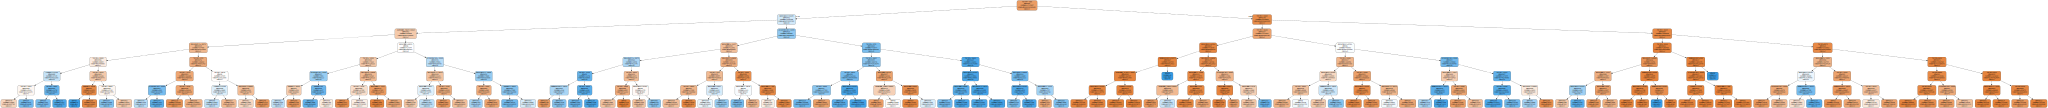

In [98]:
# The tree for all years dataset
export_graphviz(
        dtc_SFS,
        out_file="dt_tree_SFS.dot",
        feature_names=X_train_SFS.columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree_SFS.dot") 
#I don't know how to make the graph smaller!

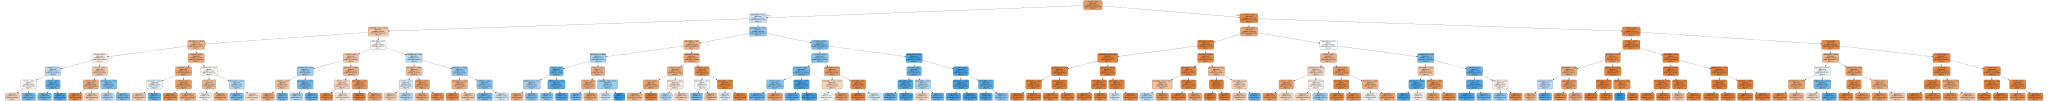

In [99]:
# The tree for last years dataset
export_graphviz(
        dtc_last_years_SFS,
        out_file="dt_tree_last_years_SFS.dot",
        feature_names=X_last_years_train_SFS.columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree_last_years_SFS.dot")

And now we train the rest of the algorithms:

In [100]:
#loop for the algorithms
for model in [LogisticRegression(), KNN(), RFC(max_depth=7, random_state=4865), XGBClassifier(random_state=4865)]:
  print(f'Start training {model.__class__.__name__} with all years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_train_SFS, y_train)

  y_pred = model.predict(X_test_SFS)
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_pred_train = model.predict(X_train_SFS)

  # Save results
  all_years_training_SFS_dict[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_test, y_pred) ,
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),  
                    'accuracy': accuracy_score(y_test, y_pred),
                    'balanced accuracy': bas(y_test, y_pred),
                    'f1 (train)': f1_score(y_train, y_pred_train),
                    'f1 (test)': f1_score(y_test, y_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }
print('-------------------------------------------------------------------------------')

for model in [LogisticRegression(), KNN(), RFC(max_depth=7, random_state=4865), XGBClassifier(random_state=4865)]:
  print(f'Start training {model.__class__.__name__} with last years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_last_years_train_SFS, y_last_years_train)

  y_last_years_pred = model.predict(X_last_years_test_SFS)
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_ly_pred_train = model.predict(X_last_years_train_SFS)

  # Save results
  last_years_training_SFS_dict[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_last_years_test, y_last_years_pred) ,
                    'precision': precision_score(y_last_years_test, y_last_years_pred),
                    'recall': recall_score(y_last_years_test, y_last_years_pred),  
                    'accuracy': accuracy_score(y_last_years_test, y_last_years_pred),
                    'balanced accuracy': bas(y_last_years_test, y_last_years_pred),
                    'f1 (train)': f1_score(y_last_years_train, y_ly_pred_train),
                    'f1 (test)': f1_score(y_last_years_test, y_last_years_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }

Start training LogisticRegression with all years dataset.
Start training KNeighborsClassifier with all years dataset.
Start training RandomForestClassifier with all years dataset.
Start training XGBClassifier with all years dataset.
-------------------------------------------------------------------------------
Start training LogisticRegression with last years dataset.
Start training KNeighborsClassifier with last years dataset.
Start training RandomForestClassifier with last years dataset.
Start training XGBClassifier with last years dataset.


In [101]:
all_years_training_SFS = pd.DataFrame.from_dict(all_years_training_SFS_dict, orient='index')
last_years_training_SFS = pd.DataFrame.from_dict(last_years_training_SFS_dict, orient='index')

In [244]:
all_years_training_SFS.style.set_caption('Table 4. Training with selected variables in first strategy and \
the "all years" dataset with all its records.').set_table_styles(styles)

In [245]:
last_years_training_SFS.style.set_caption('Table 5. Training with selected variables in first strategy and \
the "last years" dataset with all its records.').set_table_styles(styles)

We see signs of overfitting in the KNeighbors algorithm in both datasets. We also see weak signs of overfitting in the XGBoost algorithm. In the rest of the algorithms, the overfitting effects are negligible or non-existent.
Regarding performance with respect to variable selection, let's write the f1 score results table with variable selection against the default training we did earlier:

In [256]:
all_years_training_summary=pd.merge(all_years_training_default[['f1 (train)','f1 (test)', 'elapsed time']] , 
                                    all_years_training_SFS[['f1 (train)','f1 (test)', 'elapsed time']], 
                                    left_index=True, right_index=True, suffixes=('_default', '_SFS'))
all_years_training_summary.style.set_caption('Table 6. Comparison between training with all variables \
and selected variables, in first strategy with the "all years" dataset, all records and default \
hyperparameters.').set_table_styles(styles) 

Taking out the KNN algorithm, the rest have worse performance. In the case of tree algorithms, depth limitation must be an important factor. Overfitting in these two cases has been removed, at the cost of lower performance.
In general, we assume that the voting system has to do with the performance loss of some of the algorithms. The chosen variables favored some algorithms (KNN) and disfavored others.

In [257]:
last_years_training_summary=pd.merge(last_years_training_default[['f1 (train)','f1 (test)', 'elapsed time']], 
         last_years_training_SFS[['f1 (train)','f1 (test)', 'elapsed time']], 
         left_index=True, right_index=True, suffixes=('_default', '_SFS'))
last_years_training_summary.style.set_caption('Table 7. Comparison between training with all variables \
and selected variables, in first strategy with the "last years" dataset, all records and default \
hyperparameters.').set_table_styles(styles) 

In the case of the set of the last years, we see that the decision tree with the chosen variables has, unlike the set of all years, a worse performance than with the default training of all the variables. This may be because the chosen variables were based solely on training the set of all years.

On the other hand, we see that the processing times of the algorithms improved remarkably in most of the algorithms. This is quite positive, and a simple explanation is that now we have fewer variables.

#### A summary and a little discussion about the performance of the algorithms.

We see that, removing the logistic regression algorithm, all the algorithms obtain a performance greater than 0.65 in the F1-score. The XGBoost algorithm had the best performance, followed by the KNN and the tree algorithms. The second place is not very clear because the tree algorithms suffered a lot of performance loss when limiting their depth. When we move the hyperparameters, this topic will become clearer.
Regarding logistic regression, its big problem is low recall, that is, it has difficulties detecting positive cases of non-compliance. In the sample of all positive cases of non-payment, in the best of cases it detects barely more than 32%. Although the accuracy isn't the best either, this low recall value also means that the f1 score lags far behind the other algorithms.

Except in the decision tree, we see that in the hedge of recent years there is a better performance. Although usually the difference is small.

If we have to choose based on these results, clearly the best algorithm of these is XGBoost. Not only because the F1-score is the highest, but because it is much faster than Random Forest and KNN. However, things can change quite a bit by changing the hyperparameters as mentioned above.

##### Second strategy

In [ ]:
# This block of code is made so that the entire notebook can be run from here. If the previous part is run, 
#this block should be skipped.

#%run "./loans - quick start.ipynb"

##from google.colab import drive # We mount a Google Drive folder where the dataset is.
##drive.mount('/content/drive', force_remount=True)

##path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
#path = "./"

#y_train=pd.read_pickle(path +'y_train.pkl')
#y_last_years_train=pd.read_pickle(path +'y_last_years_train.pkl')
#y_test=pd.read_pickle(path +'y_test.pkl')
#y_last_years_test= pd.read_pickle(path +'y_last_years_test.pkl') 
#X_train_enc = pd.read_pickle(path +'X_train_enc.pkl')  
#X_last_years_train_enc = pd.read_pickle(path +'X_last_years_train_enc.pkl') 
#X_test_enc = pd.read_pickle(path +'X_test_enc.pkl') 
#X_last_years_test_enc = pd.read_pickle(path +'X_last_years_test_enc.pkl') 

#dtc = tree.DecisionTreeClassifier(random_state=4865, max_depth=7)
#log_reg = LogisticRegression()
#knn=KNN()
#rfc=RFC(max_depth=7, random_state=4865)
#s_v_m=svm.SVC()
#xgbc = XGBClassifier(random_state=4865)

We are going to use the 5 training learning algorithms that we used in the default hyperparameter training, we are not going to use the support vector machine algorithm because it takes too much time. With the SFS algorithm we choose the highlighted variables for each algorithm and for each version of the data set (all years and only the last years).

We are going to perform this procedure with a data sample of 50,000 data points from each version of the data set.

In [5]:
# We join x and y first to make the sampling so that the chosen rows of X and y are coherent, and then we split again.
Xy_train=pd.concat([X_train_enc, y_train], axis=1)
Xy_last_years_train =pd.concat([X_last_years_train_enc, y_last_years_train], axis=1)

Xy_train_sample_2 = strat_sample(Xy_train, 'Default', sample_size=50000, seed=4654)
Xy_last_years_train_sample_2 = strat_sample(Xy_last_years_train, 'Default', sample_size=50000, seed=4654)
# (We also sampled the last few years, despite the fact that in principle we are not going to use these sets now.

X_train_sample_2 = Xy_train_sample_2.drop(['Default'], axis=1)
y_train_sample_2 = Xy_train_sample_2['Default']
X_last_years_train_sample_2 = Xy_last_years_train_sample_2.drop(['Default'], axis=1)
y_last_years_train_sample_2 = Xy_last_years_train_sample_2['Default']

As we did in the first strategy, we reduce the maximum depth to 7 in the trees algorithms to combat the strong overfitting they produce if depth is not constrained.

In [6]:
results_SFS_dict_all_years_2={}
results_SFS_dict_last_years_2={}

We run exactly the same algorithms as before, saving all the results of each algorithm and each version of the dataset.

###### Decision tree

**All years:**

In [11]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop. (Remember that the dataset has 17 columns).
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time()  
    sfs_dtc = SFS(dtc,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_dtc.fit(X_train_sample_2.to_numpy(), y_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_dtc.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_dtc.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.')  
    # Since it takes a while, we put a progress status indicator.
    if sfs_dtc.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step at
        # at least 0.1%, cut the while. We put that necessary margin of 0.1% for improvement because it is quite normal from tests
        # that we did that due to very low improvements the loop continues adding variables, and that is not good. The simplicity
        # of the model makes a more robust and efficient model.
        flag=False
    else:
        last_metric_value = sfs_dtc.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_dtc_2=sfs_dtc.k_feature_names_ # We put together the list of the highlighted_variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.743333804399098 and the time elapsed is 0.67478 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.74775632520646 and the time elapsed is 10.78495 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.7504417332539391 and the time elapsed is 20.22008 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.7515107455812124 and the time elapsed is 28.2479 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.7522546581442535 and the time elapsed is 34.79882 seconds.
Finished the iteration corresponding to the f

In [15]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_dtc_all_years_2=list(highlighted_variables_dtc_2)
highlighted_variables_dtc_all_years_2=[eval(i) for i in highlighted_variables_dtc_all_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample_2 in the Decision Tree algorithm for all years dataset are \
{list((X_train_sample_2.iloc[:, highlighted_variables_dtc_all_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample_2 in the Decision Tree algorithm for all years dataset are ['Term', 'NewExist', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'Is_franchise', 'Real_Estate', 'BankClass'] and the value obtained from the metric is 0.7574104563887122.


In [16]:
n_features_optimal_dtc = len(highlighted_variables_dtc_all_years_2)
print(f'The optimal number of attributes for X_train_sample_2 in the Decision Tree algorithm for all years dataset gave us {n_features_optimal_dtc}.')

The optimal number of attributes for X_train_sample_2 in the Decision Tree algorithm for all years dataset gave us 8.


In [17]:
results_SFS_dict_all_years_2['Decision Tree'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_dtc,                   
                    'Highlighted variables': highlighted_variables_dtc_all_years_2,
                    'Elapsed time (best score training)': fit_time}                             

**Last years:**

In [18]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop. (Remember that the dataset has 17 columns).
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time()  
    sfs_dtc = SFS(dtc,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_dtc.fit(X_last_years_train_sample_2.to_numpy(), y_last_years_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_dtc.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_dtc.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.')  
    # Since it takes a while, we put a progress status indicator.
    if sfs_dtc.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step at
        # at least 0.1%, cut the while. We put that necessary margin of 0.1% for improvement because it is quite normal from tests
        # that we did that due to very low improvements the loop continues adding variables, and that is not good. The simplicity
        # of the model makes a more robust and efficient model.
        flag=False
    else:
        last_metric_value = sfs_dtc.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_dtc_2=sfs_dtc.k_feature_names_ # We put together the list of the highlighted_variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.7471342998931345 and the time elapsed is 0.69361 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.7542605006774337 and the time elapsed is 10.46677 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.756296381505034 and the time elapsed is 20.41185 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.7567696466177602 and the time elapsed is 28.86254 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.7578944976377373 and the time elapsed is 36.46097 seconds.
Finished the iteration corresponding to th

In [19]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_dtc_last_years_2=list(highlighted_variables_dtc_2)
highlighted_variables_dtc_last_years_2=[eval(i) for i in highlighted_variables_dtc_last_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample_2 in the Decision Tree algorithm for last years dataset are \
{list((X_train_sample.iloc[:, highlighted_variables_dtc_last_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample_2 in the Decision Tree algorithm for last years dataset are ['Term', 'NewExist', 'CreateJob', 'RevLineCr', 'LowDoc', 'SameState_False', 'SameState_True', 'SameState_Unknown', 'BankState'] and the value obtained from the metric is 0.7633899966092412.


In [20]:
n_features_optimal_dtc = len(highlighted_variables_dtc_last_years_2)
print(f'The optimal number of attributes for X_train_sample_2 in the Decision Tree algorithm for last years dataset are gave us {n_features_optimal_dtc}.')

The optimal number of attributes for X_train_sample_2 in the Decision Tree algorithm for last years dataset are gave us 9.


In [21]:
results_SFS_dict_last_years_2['Decision Tree'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_dtc,                   
                    'Highlighted variables': highlighted_variables_dtc_last_years_2,
                    'Elapsed time (best score training)': fit_time}                             

###### Logistic regression

**All years:**

In [22]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_log_reg = SFS(log_reg,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_log_reg.fit(X_train_sample_2.to_numpy(), y_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_log_reg.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_log_reg.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_log_reg.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_log_reg.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_log_reg_2=sfs_log_reg.k_feature_names_ # We put together the list of the highlighted variables. In 
        # the case that did not improve (the other branch of the if), this list is not updated (since the last step did not 
        # improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.4571076515987569 and the time elapsed is 0.73753 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.45726660053331025 and the time elapsed is 10.51668 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.457159208590103 and the time elapsed is 21.95655 seconds.
Then the score in the different steps is [0.4571076515987569, 0.45726660053331025, 0.457159208590103].


In [23]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_log_reg_all_years_2=list(highlighted_variables_log_reg_2)
highlighted_variables_log_reg_all_years_2=[eval(i) for i in highlighted_variables_log_reg_all_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample_2 in the Logistic Regression algorithm for all years dataset are \
{list((X_train_sample.iloc[:, highlighted_variables_log_reg_all_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample_2 in the Logistic Regression algorithm for all years dataset are ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'Real_Estate', 'SameState_False', 'SameState_True', 'State', 'BankState', 'Sector', 'BankClass'] and the value obtained from the metric is 0.45726660053331025.


In [27]:
n_features_optimal_log_reg = len(highlighted_variables_log_reg_all_years_2)
print(f'The optimal number of attributes for X_train_sample_2 in the Logistic Regression algorithm for all years dataset gave us\
{n_features_optimal_log_reg}.')

The optimal number of attributes for X_train_sample_2 in the Logistic Regression algorithm for all years dataset gave us 16.


In [28]:
results_SFS_dict_all_years_2['Logistic Regression'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_log_reg,                   
                    'Highlighted variables': highlighted_variables_log_reg_all_years_2,
                    'Elapsed time (best score training)': fit_time }        

**Last years:**

In [29]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_log_reg = SFS(log_reg,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_log_reg.fit(X_last_years_train_sample_2.to_numpy(), y_last_years_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_log_reg.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_log_reg.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_log_reg.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_log_reg.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_log_reg_2=sfs_log_reg.k_feature_names_ # We put together the list of the highlighted variables. In 
        # the case that did not improve (the other branch of the if), this list is not updated (since the last step did not 
        # improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.49155409885862894 and the time elapsed is 0.72178 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.4927320476501948 and the time elapsed is 10.93782 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.49297851928493885 and the time elapsed is 20.56161 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.4931762830140146 and the time elapsed is 31.20137 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.4932134753511067 and the time elapsed is 41.18703 seconds.
Finished the iteration corresponding to

In [30]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_log_reg_last_years_2=list(highlighted_variables_log_reg_2)
highlighted_variables_log_reg_last_years_2=[eval(i) for i in highlighted_variables_log_reg_last_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample_2 in the Logistic Regression algorithm for last years dataset are \
{list((X_train_sample.iloc[:, highlighted_variables_log_reg_last_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample_2 in the Logistic Regression algorithm for last years dataset are ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'UrbanRural', 'RevLineCr', 'Is_franchise', 'Real_Estate', 'SameState_True', 'State', 'Sector', 'BankClass'] and the value obtained from the metric is 0.49329398686607107.


In [31]:
n_features_optimal_log_reg = len(highlighted_variables_log_reg_last_years_2)
print(f'The optimal number of attributes for X_train_sample_2 in the Logistic Regression algorithm for last years dataset gave \
us {n_features_optimal_log_reg}.')

The optimal number of attributes for X_train_sample_2 in the Logistic Regression algorithm for last years dataset gaveus 12.


In [32]:
results_SFS_dict_last_years_2['Logistic Regression'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_log_reg,                   
                    'Highlighted variables': highlighted_variables_log_reg_last_years_2,
                    'Elapsed time (best score training)': fit_time }        

###### K-nearest neighbors

**All years**

In [33]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_knn = SFS(knn,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_knn.fit(X_train_sample_2.to_numpy(), y_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_knn.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_knn.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_knn.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_knn.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_knn_2=sfs_knn.k_feature_names_ # We put together the list of the highlighted variables. In the case 
        # that did not improve (the other branch of the if), this list is not updated (since the last step did not improve the 
        # metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.5708309293750823 and the time elapsed is 6.49928 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.6327789523998909 and the time elapsed is 115.37419 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.6664585352216583 and the time elapsed is 823.9404 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.6803164776086629 and the time elapsed is 1450.54499 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.6930265258677965 and the time elapsed is 1996.34994 seconds.
Finished the iteration corresponding

In [34]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_knn_all_years_2=list(highlighted_variables_knn_2)
highlighted_variables_knn_all_years_2=[eval(i) for i in highlighted_variables_knn_all_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted_variables for X_train_sample_2 in the KNN algorithm for all years dataset are \
{list((X_train_sample.iloc[:, highlighted_variables_knn_all_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted_variables for X_train_sample_2 in the KNN algorithm for all years dataset are ['Term', 'RetainedJob', 'SameState_True', 'BankClass'] and the value obtained from the metric is 0.7510505367616377.


In [35]:
n_features_optimal_knn = len(highlighted_variables_knn_all_years_2)
print(f'The optimal number of attributes for X_train_sample_2 in the KNN algorithm for all years dataset gave us \
{n_features_optimal_knn}.')

The optimal number of attributes for X_train_sample_2 in the KNN algorithm for all years dataset gave us 4.


In [36]:
results_SFS_dict_all_years_2['K-nearest neighbors'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_knn,                   
                    'Highlighted variables': highlighted_variables_knn_all_years_2,
                    'Elapsed time (best score training)': fit_time}    

**Last years**

In [37]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_knn = SFS(knn,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_knn.fit(X_last_years_train_sample_2.to_numpy(), y_last_years_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_knn.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_knn.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_knn.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_knn.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_knn_2=sfs_knn.k_feature_names_ # We put together the list of the highlighted variables. In the case 
        # that did not improve (the other branch of the if), this list is not updated (since the last step did not improve the 
        # metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.5848155564082209 and the time elapsed is 6.60875 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.6472141327743927 and the time elapsed is 111.52749 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.6789341595794154 and the time elapsed is 643.08696 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.6915443314249934 and the time elapsed is 1057.88612 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.704576420908018 and the time elapsed is 1431.03252 seconds.
Finished the iteration corresponding

In [38]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_knn_last_years_2=list(highlighted_variables_knn_2)
highlighted_variables_knn_last_years_2=[eval(i) for i in highlighted_variables_knn_last_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted_variables for X_train_sample_2 in the KNN algorithm for last years dataset are \
{list((X_train_sample.iloc[:, highlighted_variables_knn_last_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted_variables for X_train_sample_2 in the KNN algorithm for last years dataset are ['Term', 'UrbanRural', 'RevLineCr', 'LowDoc', 'SameState_Unknown', 'BankState', 'BankClass'] and the value obtained from the metric is 0.7381181710766209.


In [39]:
n_features_optimal_knn = len(highlighted_variables_knn_last_years_2)
print(f'The optimal number of attributes for X_train_sample_ in the KNN algorithm for last years dataset gave us \
{n_features_optimal_knn}.')

The optimal number of attributes for X_train_sample_ in the KNN algorithm for last years dataset gave us 7.


In [40]:
results_SFS_dict_last_years_2['K-nearest neighbors'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_knn,                   
                    'Highlighted variables': highlighted_variables_knn_last_years_2,
                    'Elapsed time (best score training)': fit_time}    

###### Random forest

**All years:**

In [41]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_rfc = SFS(rfc,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_rfc.fit(X_train_sample_2.to_numpy(), y_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_rfc.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_rfc.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_rfc.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_rfc.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_rfc_2=sfs_rfc.k_feature_names_ # We put together the list of the highlighted variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.6734227943983998 and the time elapsed is 11.92629 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.6847260092881509 and the time elapsed is 197.29644 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.6623084184415859 and the time elapsed is 351.78753 seconds.
Then the score in the different steps is [0.6734227943983998, 0.6847260092881509, 0.6623084184415859].


In [42]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_rfc_all_years_2=list(highlighted_variables_rfc_2)
highlighted_variables_rfc_all_years_2=[eval(i) for i in highlighted_variables_rfc_all_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample_2 in the Random Forest Classifier algorithm for all years dataset are \
{list((X_train_sample.iloc[:, highlighted_variables_rfc_all_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.')
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample_2 in the Random Forest Classifier algorithm for all years dataset are ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'Real_Estate', 'SameState_True', 'SameState_Unknown', 'State', 'BankState', 'Sector', 'BankClass'] and the value obtained from the metric is 0.6847260092881509.


In [43]:
n_features_optimal_rfc = len(highlighted_variables_rfc_all_years_2)
print(f'The optimal number of attributes for X_train_sample_2 in the Random Forest Classifier algorithm for all years dataset\
gave us {n_features_optimal_rfc}.')

The optimal number of attributes for X_train_sample_2 in the Random Forest Classifier algorithm for alll years datasetgave us 16.


In [44]:
results_SFS_dict_all_years_2['Random Forest'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_rfc,                   
                    'Highlighted variables': highlighted_variables_rfc_all_years_2,
                    'Elapsed time (best score training)': fit_time }        

**Last years:**

In [45]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time() 
    sfs_rfc = SFS(rfc,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_rfc.fit(X_last_years_train_sample_2.to_numpy(), y_last_years_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_rfc.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_rfc.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_rfc.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_rfc.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_rfc_2=sfs_rfc.k_feature_names_ # We put together the list of the highlighted variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.698752066153855 and the time elapsed is 11.57116 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.7071188082146715 and the time elapsed is 197.77787 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.6944344880285076 and the time elapsed is 334.59906 seconds.
Then the score in the different steps is [0.698752066153855, 0.7071188082146715, 0.6944344880285076].


In [46]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_rfc_last_years_2=list(highlighted_variables_rfc_2)
highlighted_variables_rfc_last_years_2=[eval(i) for i in highlighted_variables_rfc_last_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample_2 in the Random Forest Classifier algorithm for last years dataset are \
{list((X_train_sample.iloc[:, highlighted_variables_rfc_last_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.')
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample_2 in the Random Forest Classifier algorithm for last years dataset are ['Term', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'Real_Estate', 'SameState_False', 'SameState_True', 'SameState_Unknown', 'State', 'BankState', 'Sector', 'BankClass'] and the value obtained from the metric is 0.7071188082146715.


In [47]:
n_features_optimal_rfc = len(highlighted_variables_rfc_last_years_2)
print(f'The optimal number of attributes for X_train_sample_2 in the Random Forest Classifier algorithm for last years \
dataset gave us {n_features_optimal_rfc}.')

The optimal number of attributes for X_train_sample_2 in the Random Forest Classifier algorithm for last years dataset gave us 16.


In [48]:
results_SFS_dict_last_years_2['Random Forest'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_rfc,                   
                    'Highlighted variables': highlighted_variables_rfc_last_years_2,
                    'Elapsed time (best score training)': fit_time }        

###### XGBoost

**All years:**

In [49]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time()  
    sfs_xgbc = SFS(xgbc,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_xgbc.fit(X_train_sample_2.to_numpy(), y_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_xgbc.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_xgbc.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_xgbc.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_xgbc.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_xgbc_2=sfs_xgbc.k_feature_names_ # We put together the list of the highlighted variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.8097979762058152 and the time elapsed is 7.36053 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.811116382285342 and the time elapsed is 117.67943 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.8128339285659563 and the time elapsed is 224.36315 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.8128339285659563 and the time elapsed is 321.41913 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.8115689394427342 and the time elapsed is 430.59424 seconds.
Then the score in the different steps 

In [50]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_xgbc_all_years_2=list(highlighted_variables_xgbc_2)
highlighted_variables_xgbc_all_years_2=[eval(i) for i in highlighted_variables_xgbc_all_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample_2 in the XGBoost algorithm for all years dataset are \
{list((X_train_sample.iloc[:, highlighted_variables_xgbc_all_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample_2 in the XGBoost algorithm for all years dataset are ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'SameState_False', 'SameState_True', 'State', 'BankState', 'Sector', 'BankClass'] and the value obtained from the metric is 0.8128339285659563.


In [51]:
n_features_optimal_xgbc = len(highlighted_variables_xgbc_all_years_2)
print(f'The optimal number of attributes for X_train_sample_2 in the XGBoost algorithm for all years dataset gave us \
{n_features_optimal_xgbc}.')

The optimal number of attributes for X_train_sample_2 in the XGBoost algorithm for all years dataset gave us 14.


In [52]:
results_SFS_dict_all_years_2['XGBoost'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_xgbc,                   
                    'Highlighted variables': highlighted_variables_xgbc_all_years_2,
                    'Elapsed time (best score training)': fit_time}   

**Last years:**

In [53]:
metric = [] #This is a list that will have the different values of the metric depending on the number of parameters.
last_metric_value=0 # Auxiliary value for the next loop. This value ensures at least two steps.
flag=True
n_features=17 # Initial parameter of the loop.
while flag: # This while will iterate, increasing the n_features variable from 1 to as far as it goes. We use while 
    # instead of for because we are going to cut when the metric stops improving.
    start_time = time.time()  
    sfs_xgbc = SFS(xgbc,
        k_features=n_features,
        forward=False, # This parameter decrease  the number of variables, that is, it is 'Sequential floating backward selection'
        # instead of 'Sequential floating backward selection'.
        floating=True, 
        scoring = 'f1',
        cv = 5)
    sfs_xgbc.fit(X_last_years_train_sample_2.to_numpy(), y_last_years_train_sample_2.to_numpy()) # We transform the dataset to numpy arrays because otherwise it 
# returns an error. (If the floating parameter is False, it is not necessary. In that case, it does not return an error.)
    metric.append(sfs_xgbc.k_score_)
    end_time = time.time()
    print(f'Finished the iteration corresponding to the final number of attributes equal to \
{n_features}, the metric obtained in this step has the value {sfs_xgbc.k_score_} and the time \
elapsed is {round(end_time-start_time, 5)} seconds.') 
    # Since it takes a while, we put a progress status indicator.
    if sfs_xgbc.k_score_< last_metric_value: # If this condition is true, finish the training.
        # We assume that the higher the metric value, the better the model. If it doesn't improve on the current step, 
        # cut the while.
        flag=False
    else:
        last_metric_value = sfs_xgbc.k_score_
        n_features -= 1
        fit_time = round(end_time-start_time, 5) #Note that here I keep the time while if it does not continue the while no. This 
        #is so that the last fit time (which does not correspond to the best choice) is not saved, and the penultimate time is
        #saved. The penultimate fit time corresponds to the best choice.
        highlighted_variables_xgbc_2=sfs_xgbc.k_feature_names_ # We put together the list of the highlighted variables. In the case that did not improve 
    # (the other branch of the if), this list is not updated (since the last step did not improve the metric).
print(f'Then the score in the different steps is {metric}.')

Finished the iteration corresponding to the final number of attributes equal to 17, the metric obtained in this step has the value 0.8288992683043682 and the time elapsed is 7.43914 seconds.
Finished the iteration corresponding to the final number of attributes equal to 16, the metric obtained in this step has the value 0.8289424253342291 and the time elapsed is 119.44257 seconds.
Finished the iteration corresponding to the final number of attributes equal to 15, the metric obtained in this step has the value 0.829606153206431 and the time elapsed is 223.47843 seconds.
Finished the iteration corresponding to the final number of attributes equal to 14, the metric obtained in this step has the value 0.829606153206431 and the time elapsed is 330.71974 seconds.
Finished the iteration corresponding to the final number of attributes equal to 13, the metric obtained in this step has the value 0.8268597297108162 and the time elapsed is 438.3048 seconds.
Then the score in the different steps is

In [54]:
# The highlighted variables objects are tuples of strings, they are the column numbers corresponding to the optimal attributes. 
# It is convenient to pass them to lists of integers.
highlighted_variables_xgbc_last_years_2=list(highlighted_variables_xgbc_2)
highlighted_variables_xgbc_last_years_2=[eval(i) for i in highlighted_variables_xgbc_last_years_2] # Convert the column numbers from string to integer.
print(f'The highlighted variables for X_train_sample_2 in the XGBoost algorithm for last years dataset are \
{list((X_train_sample.iloc[:, highlighted_variables_xgbc_last_years_2]).columns)} and the value obtained from the metric is \
{last_metric_value}.') #This code is 
# for it to return the list of names, the output of the previous algorithm were the numbers of the columns due to the 
#issue of transforming the entry of the Feature Selector into an array because otherwise it returns an error.

The highlighted variables for X_train_sample_2 in the XGBoost algorithm for last years dataset are ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'SameState_False', 'State', 'BankState', 'Sector', 'BankClass'] and the value obtained from the metric is 0.829606153206431.


In [55]:
n_features_optimal_xgbc = len(highlighted_variables_xgbc_last_years_2)
print(f'The optimal number of attributes for X_train_sample in the XGBoost algorithm gave us {n_features_optimal_xgbc}.')

The optimal number of attributes for X_train_sample in the XGBoost algorithm gave us 14.


In [56]:
results_SFS_dict_last_years_2['XGBoost'] = {'Best Score': last_metric_value ,
                    'Optimal number of attributes': n_features_optimal_xgbc,                   
                    'Highlighted variables': highlighted_variables_xgbc_last_years_2,
                    'Elapsed time (best score training)': fit_time}   

###### Summary and results with the SFS algorithm

In [259]:
results_SFS_all_years_2 = pd.DataFrame(results_SFS_dict_all_years_2).T
results_SFS_last_years_2 = pd.DataFrame(results_SFS_dict_last_years_2).T
results_SFS_2= results_SFS_all_years_2.merge(results_SFS_last_years_2,
                                                left_index=True, right_index=True, suffixes=(' (all years)', ' (last years)'))
results_SFS_2.style.set_caption('Table 8. Results found in SFS algorithm in the "all years" dataset (the trainings are with a \
                                sampling of 50000 samples). The best score corresponds to F1-score (In the next table we will specify the names of the chosen \
columns instead of the numbers).').set_table_styles(styles)

As expected, with this sampling all the algorithms work better than with the previous one. This is because more training data allows the algorithms to learn more. The big advantage is that it takes much longer. Given how long it takes, we don't think it's worth spending so much time just on the selection of variables. Probably with the same sampling, or at most 10,000 samples, the sufficiently well-chosen variables would be obtained so that the performance of the final model is very similar.

Let's see the summary table of the highlighted variables.

In [58]:
highlighted_variables_all_years_2= pd.DataFrame( columns=['Decision Tree', 'Logistic Regression', 'K-nearest neighbors', 'Random Forest', 
                            'XGBoost'],
                                 index=X_train_sample.columns)
highlighted_variables_all_years_2.iloc[highlighted_variables_dtc_all_years_2, 0] = 1 # We fill with 1 in the highlighted variables of Decision Tree algorithm. 
#(0 corresponds to the Decision Tree column).
highlighted_variables_all_years_2.iloc[highlighted_variables_log_reg_all_years_2, 1] = 1 # We fill with 1 in the highlighted variables of Logistic Regression
# algorithm. (1 corresponds to the Logistic Regression column).
highlighted_variables_all_years_2.iloc[highlighted_variables_knn_all_years_2, 2] = 1 # We fill with 1 in the highlighted variables of KNN algorithm. 
#(2 corresponds to the KNN column).
highlighted_variables_all_years_2.iloc[highlighted_variables_rfc_all_years_2, 3] = 1 # We fill with 1 in the highlighted variables of Random Forest algorithm.
#(3 corresponds to the Random Forest column).
highlighted_variables_all_years_2.iloc[highlighted_variables_xgbc_all_years_2, 4] = 1 # We fill with 1 in the highlighted variables of XG Boost algorithm. 
#(5 corresponds to the XGBoost).
highlighted_variables_all_years_2.fillna(0, inplace=True) # We fill the nan with 0, because if in a place there is not a 1, there is a 0.
highlighted_variables_all_years_2.loc['Number of highlighted variables']= highlighted_variables_all_years_2.sum() 
highlighted_variables_all_years_2['Number of times chosen'] = highlighted_variables_all_years_2.sum(axis=1)
highlighted_variables_all_years_2

Decision Tree  Logistic Regression   
Term                                         1                    1  \
NoEmp                                        0                    1   
NewExist                                     1                    1   
CreateJob                                    0                    1   
RetainedJob                                  1                    1   
UrbanRural                                   1                    1   
RevLineCr                                    1                    1   
LowDoc                                       0                    1   
Is_franchise                                 1                    1   
Real_Estate                                  1                    1   
SameState_False                              0                    1   
SameState_True                               0                    1   
SameState_Unknown                            0                    0   
State                                        0                    1   
BankState                                    0                    1   
Sector                                       0                    1   
BankClass                                    1                    1   
Number of highlighted variables              8                   16   

                                 K-nearest neighbors  Random Forest  XGBoost   
Term                                               1              1        1  \
NoEmp                                              0              1        1   
NewExist                                           0              1        1   
CreateJob                                          0              1        1   
RetainedJob                                        1              1        0   
UrbanRural                                         0              1        1   
RevLineCr                                          0              1        1   
LowDoc                                             0              1        1   
Is_franchise                                       0              1        1   
Real_Estate                                        0              1        0   
SameState_False                                    0              0        1   
SameState_True                                     1              1        1   
SameState_Unknown                                  0              1        0   
State                                              0              1        1   
BankState                                          0              1        1   
Sector                                             0              1        1   
BankClass                                          1              1        1   
Number of highlighted variables                    4             16       14   

                                 Number of times chosen  
Term                                                  5  
NoEmp                                                 3  
NewExist                                              4  
CreateJob                                             3  
RetainedJob                                           4  
UrbanRural                                            4  
RevLineCr                                             4  
LowDoc                                                3  
Is_franchise                                          4  
Real_Estate                                           3  
SameState_False                                       2  
SameState_True                                        4  
SameState_Unknown                                     1  
State                                                 3  
BankState                                             3  
Sector                                                3  
BankClass                                             5  
Number of highlighted variables                      58

We see small changes. We already mentioned in the explanation of the first strategy that going from all years to last years does not change too much.

In [59]:
highlighted_variables_last_years_2= pd.DataFrame( columns=['Decision Tree', 'Logistic Regression', 'K-nearest neighbors', 'Random Forest', 
                            'XGBoost'],
                                 index=X_train_sample.columns)
highlighted_variables_last_years_2.iloc[highlighted_variables_dtc_last_years_2, 0] = 1 # We fill with 1 in the highlighted variables of Decision Tree algorithm. 
#(0 corresponds to the Decision Tree column).
highlighted_variables_last_years_2.iloc[highlighted_variables_log_reg_last_years_2, 1] = 1 # We fill with 1 in the highlighted variables of Logistic Regression
# algorithm. (1 corresponds to the Logistic Regression column).
highlighted_variables_last_years_2.iloc[highlighted_variables_knn_last_years_2, 2] = 1 # We fill with 1 in the highlighted variables of KNN algorithm. 
#(2 corresponds to the KNN column).
highlighted_variables_last_years_2.iloc[highlighted_variables_rfc_last_years_2, 3] = 1 # We fill with 1 in the highlighted variables of Random Forest algorithm.
#(3 corresponds to the Random Forest column).
highlighted_variables_last_years_2.iloc[highlighted_variables_xgbc_last_years_2, 4] = 1 # We fill with 1 in the highlighted variables of XG Boost algorithm. 
#(5 corresponds to the XGBoost).
highlighted_variables_last_years_2.fillna(0, inplace=True) # We fill the nan with 0, because if in a place there is not a 1, there is a 0.
highlighted_variables_last_years_2.loc['Number of highlighted variables']= highlighted_variables_last_years_2.sum() 
highlighted_variables_last_years_2['Number of times chosen'] = highlighted_variables_last_years_2.sum(axis=1)
highlighted_variables_last_years_2

Decision Tree  Logistic Regression   
Term                                         1                    1  \
NoEmp                                        0                    1   
NewExist                                     1                    1   
CreateJob                                    1                    1   
RetainedJob                                  0                    0   
UrbanRural                                   0                    1   
RevLineCr                                    1                    1   
LowDoc                                       1                    0   
Is_franchise                                 0                    1   
Real_Estate                                  0                    1   
SameState_False                              1                    0   
SameState_True                               1                    1   
SameState_Unknown                            1                    0   
State                                        0                    1   
BankState                                    1                    0   
Sector                                       0                    1   
BankClass                                    0                    1   
Number of highlighted variables              9                   12   

                                 K-nearest neighbors  Random Forest  XGBoost   
Term                                               1              1        1  \
NoEmp                                              0              0        1   
NewExist                                           0              1        1   
CreateJob                                          0              1        1   
RetainedJob                                        0              1        1   
UrbanRural                                         1              1        1   
RevLineCr                                          1              1        1   
LowDoc                                             1              1        1   
Is_franchise                                       0              1        1   
Real_Estate                                        0              1        0   
SameState_False                                    0              1        1   
SameState_True                                     0              1        0   
SameState_Unknown                                  1              1        0   
State                                              0              1        1   
BankState                                          1              1        1   
Sector                                             0              1        1   
BankClass                                          1              1        1   
Number of highlighted variables                    7             16       14   

                                 Number of times chosen  
Term                                                  5  
NoEmp                                                 2  
NewExist                                              4  
CreateJob                                             4  
RetainedJob                                           2  
UrbanRural                                            4  
RevLineCr                                             5  
LowDoc                                                4  
Is_franchise                                          3  
Real_Estate                                           2  
SameState_False                                       3  
SameState_True                                        3  
SameState_Unknown                                     3  
State                                                 3  
BankState                                             4  
Sector                                                3  
BankClass                                             4  
Number of highlighted variables                      58

Now the logistic regression uses 4 less variables and the K-Neighbours uses 7 instead of 3. The rest is very similar.

**Choosing the "highlighted" variables**

We create a dataframe to choose the variables according to the algorithm and the dataset. We use the dataframe format instead of dictionary to be able to save the data in pkl format.

In [60]:
variable_selection = results_SFS_2[['Highlighted variables (all years)', 'Highlighted variables (last years)']].copy(deep=True) 
## We get column names and then drop column naumbers:
variable_selection['all years'] = variable_selection['Highlighted variables (all years)'].apply(lambda x: X_test_enc.columns[x])
variable_selection['last years'] = variable_selection['Highlighted variables (last years)'].apply(lambda x: X_test_enc.columns[x])
variable_selection.drop(['Highlighted variables (all years)', 'Highlighted variables (last years)'], inplace=True, axis=1)

variable_selection.rename(index={'Decision Tree': 'DecisionTreeClassifier', 'Logistic Regression': 'LogisticRegression',
                                  'K-nearest neighbors':'KNeighborsClassifier', 'Random Forest':'RandomForestClassifier',
                                   'XGBoost':'XGBClassifier'}, inplace=True
                         ) #Later, we are going to need the names of the algorithms to be put like this to be able to loop and 
## simplify the code a lot.

In [61]:
#X_train_sample_2.to_pickle('X_train_sample_2.pkl')
#y_train_sample_2.to_pickle('y_train_sample_2.pkl')
#X_last_years_train_sample_2.to_pickle('X_last_years_train_sample_2.pkl')
#y_last_years_train_sample_2.to_pickle('y_last_years_train_sample_2.pkl')
#variable_selection.to_pickle('variable_selection.pkl')

##### Training with the selected variables

Now we are going to train the data set, with the variables chosen with the SFS algorithm, of all the years and of the last years (all the records, not a sample) with the models used and evaluate which one is better. 

In [67]:
#%run "./loans - quick start.ipynb"


#from google.colab import drive # We mount a Google Drive folder where the dataset is.
#drive.mount('/content/drive', force_remount=True)

#path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
#path = "./"

#y_train=pd.read_pickle(path +'y_train.pkl')
#y_last_years_train=pd.read_pickle(path +'y_last_years_train.pkl')
#y_test=pd.read_pickle(path +'y_test.pkl')
#y_last_years_test= pd.read_pickle(path +'y_last_years_test.pkl') 
#X_train_enc = pd.read_pickle(path +'X_train_enc.pkl')  
#X_last_years_train_enc = pd.read_pickle(path +'X_last_years_train_enc.pkl') 
#X_test_enc = pd.read_pickle(path +'X_test_enc.pkl') 
#X_last_years_test_enc = pd.read_pickle(path +'X_last_years_test_enc.pkl') 

#variable_selection = pd.read_pickle(path +'variable_selection.pkl')  

Let's start training and evaluating the models. We will use a loop that trains all the models, except the decision tree that we are going to do separately, because after training the decision tree we would like to see them graphically.

In [62]:
results_all_years_SFS_dict_2 = {}
results_last_years_SFS_dict_2 = {}

In [63]:
print(f'Start training {"DecisionTreeClassifier"} with all years dataset.')

# All years dataset
dtc_SFS_2=tree.DecisionTreeClassifier(random_state=4865, max_depth=7)
start_time = time.time()
dtc_SFS_2.fit(X_train_enc.loc[:, variable_selection.loc['DecisionTreeClassifier', 'all years']], y_train)
y_pred = dtc_SFS_2.predict(X_test_enc.loc[:, variable_selection.loc['DecisionTreeClassifier', 'all years']])
end_time = time.time()
fit_and_predict_time = round(end_time-start_time, 5)
y_pred_train = dtc_SFS_2.predict(X_train_enc.loc[:, variable_selection.loc['DecisionTreeClassifier', 'all years']])
#Save results:
results_all_years_SFS_dict_2['DecisionTreeClassifier'] = {'confussion_matrix': confusion_matrix(y_test, y_pred) ,
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),   
                    'accuracy': accuracy_score(y_test, y_pred),
                    'balanced accuracy': bas(y_test, y_pred),
                    'f1 (train)': f1_score(y_train, y_pred_train),
                    'f1 (test)': f1_score(y_test, y_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }          
print(f'Start training {"DecisionTreeClassifier"} with last years dataset.')

# Last years dataset
dtc_last_years_SFS_2=tree.DecisionTreeClassifier(random_state=4865, max_depth=7)
start_time = time.time()
dtc_last_years_SFS_2.fit(X_last_years_train_enc.loc[:, variable_selection.loc['DecisionTreeClassifier', 'last years']], 
                                                    y_last_years_train)
y_last_years_pred = dtc_last_years_SFS_2.predict(X_last_years_test_enc.loc[:, variable_selection.loc['DecisionTreeClassifier', 'last years']])
end_time = time.time()
fit_and_predict_time = round(end_time-start_time, 5)
y_ly_pred_train = dtc_last_years_SFS_2.predict(X_last_years_train_enc.loc[:, variable_selection.loc['DecisionTreeClassifier', 'last years']])

#Save results:
results_last_years_SFS_dict_2['DecisionTreeClassifier'] = {'confussion_matrix': confusion_matrix(y_last_years_test, y_last_years_pred) ,
                    'precision': precision_score(y_last_years_test, y_last_years_pred),
                    'recall': recall_score(y_last_years_test, y_last_years_pred),  
                    'accuracy': accuracy_score(y_last_years_test, y_last_years_pred),
                    'balanced accuracy': bas(y_last_years_test, y_last_years_pred),
                    'f1 (train)': f1_score(y_last_years_train, y_ly_pred_train),
                    'f1 (test)': f1_score(y_last_years_test, y_last_years_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }

Start training DecisionTreeClassifier with all years dataset.
Start training DecisionTreeClassifier with last years dataset.


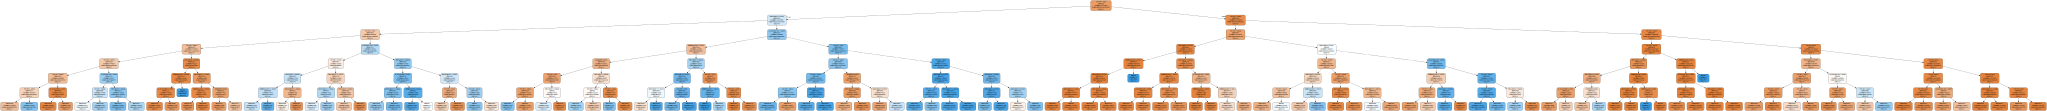

In [348]:
# The tree for all years dataset
export_graphviz(
        dtc_SFS_2,
        out_file="dt_tree_2.dot",
        feature_names=X_train_enc.loc[:, variable_selection.loc['DecisionTreeClassifier', 'all years']].columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree_2.dot") 
#I don't know how to make the graph smaller!

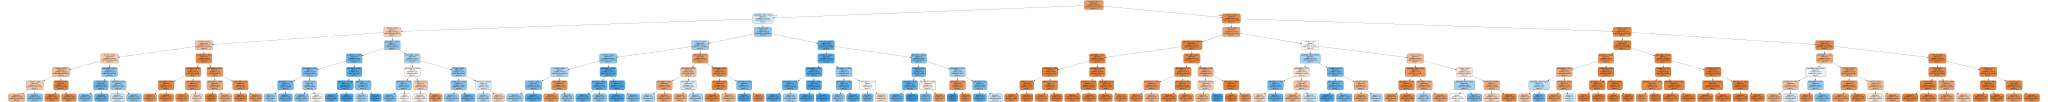

In [349]:
# The tree for last years dataset
export_graphviz(
        dtc_last_years_SFS_2,
        out_file="dt_tree_last_years_2.dot",
        feature_names=X_last_years_train_enc.loc[:, variable_selection.loc['DecisionTreeClassifier', 'last years']].columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree_last_years_2.dot")

And now we train the rest of the algorithms:

In [70]:
#loop for the algorithms
for model in [LogisticRegression(), KNN(), RFC(max_depth=7, random_state=4865), XGBClassifier(random_state=4865)]:
  print(f'Start training {model.__class__.__name__} with all years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_train_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'all years']], y_train)
    
  y_pred = model.predict(X_test_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'all years']])
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_pred_train = model.predict(X_train_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'all years']])

  # Save results
  results_all_years_SFS_dict_2[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_test, y_pred) ,
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),  
                    'accuracy': accuracy_score(y_test, y_pred),
                    'balanced accuracy': bas(y_test, y_pred),
                    'f1 (train)': f1_score(y_train, y_pred_train),
                    'f1 (test)': f1_score(y_test, y_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }
print('-------------------------------------------------------------------------------')

for model in [LogisticRegression(), KNN(), RFC(max_depth=7, random_state=4865), XGBClassifier(random_state=4865)]:
  print(f'Start training {model.__class__.__name__} with last years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_last_years_train_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'last years']], y_last_years_train)

  y_last_years_pred = model.predict(X_last_years_test_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'last years']])
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_ly_pred_train = model.predict(X_last_years_train_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'last years']])

  # Save results
  results_last_years_SFS_dict_2[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_last_years_test, y_last_years_pred) ,
                    'precision': precision_score(y_last_years_test, y_last_years_pred),
                    'recall': recall_score(y_last_years_test, y_last_years_pred),  
                    'accuracy': accuracy_score(y_last_years_test, y_last_years_pred),
                    'balanced accuracy': bas(y_last_years_test, y_last_years_pred),
                    'f1 (train)': f1_score(y_last_years_train, y_ly_pred_train),
                    'f1 (test)': f1_score(y_last_years_test, y_last_years_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }

Start training LogisticRegression with all years dataset.
Start training KNeighborsClassifier with all years dataset.
Start training RandomForestClassifier with all years dataset.
Start training XGBClassifier with all years dataset.
-------------------------------------------------------------------------------
Start training LogisticRegression with last years dataset.
Start training KNeighborsClassifier with last years dataset.
Start training RandomForestClassifier with last years dataset.
Start training XGBClassifier with last years dataset.


In [71]:
results_all_years_SFS_2 = pd.DataFrame.from_dict(results_all_years_SFS_dict_2, orient='index')
results_last_years_SFS_2 = pd.DataFrame.from_dict(results_last_years_SFS_dict_2, orient='index')

In [260]:
results_all_years_SFS_2.style.set_caption('Table 9. Training with selected variables in second strategy and \
the "all years" data set with all its records.').set_table_styles(styles)

In [261]:
results_last_years_SFS_2.style.set_caption('Table 10. Training with selected variables in second strategy and \
the "last years" data set with all its records.').set_table_styles(styles)

Taking out the KNeighbors algorithm, we see no clear signs of overfitting. The performance on the set of the last few years is somewhat higher.

In [264]:
all_years_training_summary_2=pd.merge(all_years_training_default[['f1 (train)','f1 (test)', 'elapsed time']] , 
                                    results_all_years_SFS_2[['f1 (train)','f1 (test)', 'elapsed time']], 
                                    left_index=True, right_index=True, suffixes=('_default', '_SFS_2'))
all_years_training_summary_2.style.set_caption('Table 11. Comparison between training with all variables \
and selected variables, in second strategy with the "all years" dataset, all records and default \
hyperparameters.').set_table_styles(styles)

In [267]:
last_years_training_summary_2=pd.merge(last_years_training_default[['f1 (train)','f1 (test)', 'elapsed time']], 
         results_last_years_SFS_2[['f1 (train)','f1 (test)', 'elapsed time']], 
         left_index=True, right_index=True, suffixes=('_default', '_SFS_2'))
last_years_training_summary_2.style.set_caption('Table 12. Comparison between training with all variables \
and selected variables, in second strategy with the "last years" dataset, all records and default \
hyperparameters.').set_table_styles(styles)

Eliminating the algorithms based on trees (which have the particularity of having limited them with the selected variables), the rest performs the same or better than the default training. In the KNegihbors the difference is quite large.

Just like before, we see a big difference in processing times. The only case where the processing is greater than the default hyperparameter training is the case of logistic regression on the set of all years. Let's remember that in this case, there are 16 variables, so it is not so rare that it does not perform better than with just one more variable.

Let's compare the default hyperparameter training with the two models with selected variables.

In [268]:
all_years_training_summary_3=pd.merge(all_years_training_summary, 
                                      all_years_training_summary_2[['f1 (train)_SFS_2', 'f1 (test)_SFS_2', 'elapsed time_SFS_2']], 
         left_index=True, right_index=True)
all_years_training_summary_3.style.set_caption('Table 13. Comparison between training with all variables \
and selected variables, in first and second strategy with the "all years" dataset, all records and default \
hyperparameters.').set_table_styles(styles) 

In [272]:
last_years_training_summary_3=pd.merge(last_years_training_summary, 
                                      last_years_training_summary_2[['f1 (train)_SFS_2', 'f1 (test)_SFS_2', 'elapsed time_SFS_2']], 
         left_index=True, right_index=True)
last_years_training_summary_3.style.set_caption('Table 14. Comparison between training with all variables \
and selected variables, in first and second strategy with the "last years" dataset, all records and default \
hyperparameters.').set_table_styles(styles) 

In general, the second variable selection strategy is better, as expected. The only exception where it didn't work as well is with the random forest algorithm.

Regarding the processing times in both selections, we see that it depends on the algorithm, we do not see a general trend.

## Model improvement

Now we want to choose the best hyperparameters for each algorithm. We do the two strategies that we previously explained separately. The difference between the two is that in the first, all the algorithms and both datasets use the same variables, and in the second, each algorithm and each dataset has an associated set of variables.

We will use data samples as we did in variable selection, otherwise it takes too long.

At the end of each strategy, we train each complete dataset with the selected hyperparameters (and the selected variables) in order to compare all models in general.

### First strategy

In [130]:
# To start from here:
# This block of code is made so that the entire notebook can be run from here. If the previous part is run, 
#this block should be skipped.

#%run "./loans - quick start.ipynb"

##from google.colab import drive # We mount a Google Drive folder where the dataset is.
##drive.mount('/content/drive', force_remount=True)

##path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
#path = "./"

#y_train=pd.read_pickle(path +'y_train.pkl')
#y_last_years_train=pd.read_pickle(path +'y_last_years_train.pkl')
#y_test=pd.read_pickle(path +'y_test.pkl')
#y_last_years_test= pd.read_pickle(path +'y_last_years_test.pkl') 

#X_train_SFS = pd.read_pickle(path +'X_train_SFS.pkl')  
#X_last_years_train_SFS = pd.read_pickle(path +'X_last_years_train_SFS.pkl') 
#X_test_SFS = pd.read_pickle(path +'X_test_SFS.pkl') 
#X_last_years_test_SFS = pd.read_pickle(path +'X_last_years_test_SFS.pkl') 

#X_train_sample_SFS=pd.read_pickle(path +'X_train_sample_SFS.pkl')
#X_last_years_train_sample_SFS=pd.read_pickle(path +'X_last_years_train_sample_SFS.pkl')

In [131]:
cv = 5
n_iter = 50

In [132]:
results_all_years_hyper_dict={}
results_last_years_hyper_dict={}

In [133]:
 #library

from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from scipy.stats import randint

In [134]:
param_grid={}

In [135]:
#Selection of hyperparameters for each algorithm

# Decision Tree Classifier

param_grid['DecisionTreeClassifier']={
    "max_features": [ 0.5, 0.7, 1],
    "random_state": [4865],
    "max_depth": list(range(4, 15, 1)),
    "criterion": ['gini', 'entropy'],
}

# Logistic Regression

param_grid['LogisticRegression']={
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C": [100, 10, 1.0, 0.1, 0.01],
    "max_iter": [1000] #We put this because otherwise the model often does not converge
}


#KNN

param_grid['KNeighborsClassifier']= {
    "n_neighbors": [ 3, 5, 7, 9],
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute'],
    "leaf_size": list(range(10,100, 10)),
    "p": [1,2,3,4],
}

# Random Forest

param_grid['RandomForestClassifier']={
    "max_features": [ 0.5, 0.7, 1],
    "n_estimators": list(range(50,500, 50)),
    "max_depth": list(range(4,50, 1)),
    "criterion": ['gini', 'entropy', 'log_loss'],
    "random_state": [4865]
}

#XGBoost

param_grid['XGBClassifier']= {
    "max_depth": [ 3, 18, 1],
    "n_estimators": list(range(50,500, 50)),
    #"learning_rate":list(np.arange(0.1, 0.5, 0.05)),
    "colsample_bytree": [0.5, 1],
    "min_child_weight": [0, 10, 1], 
    "random_state": [4865]
}

We make a Bayesian search for the best parameters on the sample set.

In [178]:
#loop for the algorithms

reg={}
model_bay={}
model_bay_last_years={}

for model in [tree.DecisionTreeClassifier(), LogisticRegression(), KNN(), RFC(), XGBClassifier()]:
    
    reg[model.__class__.__name__]= BayesSearchCV(model,
                                    search_spaces=param_grid[model.__class__.__name__],
                                    n_iter=n_iter,
                                    cv=cv,
                                    scoring='f1',
                                    random_state=123)
        
    # All years
    print(f'Start searching hyperparameters for {model.__class__.__name__} model in all years dataset.')
    start_time = time.time()

    model_bay[model.__class__.__name__] = reg[model.__class__.__name__].fit(X_train_sample_SFS, y_train_sample)
    y_pred=model_bay[model.__class__.__name__].predict(X_test_SFS)
    end_time = time.time()

    fit_and_predict_time  = round(end_time-start_time, 5)
    y_pred_train=model_bay[model.__class__.__name__].predict(X_train_sample_SFS)

    # Last years
    print(f'Start searching hyperparameters for {model.__class__.__name__} model in last years dataset.')
    start_time = time.time()

    model_bay_last_years[model.__class__.__name__] = reg[model.__class__.__name__].fit(X_last_years_train_sample_SFS , y_last_years_train_sample)
    y_last_years_pred=model_bay_last_years[model.__class__.__name__].predict(X_last_years_test_SFS)
    end_time = time.time()

    fit_and_predict_time_last_years  = round(end_time-start_time, 5)
    y_ly_pred_train=model_bay_last_years[model.__class__.__name__].predict(X_last_years_train_sample_SFS)
    
    # Save results

    results_all_years_hyper_dict[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_test, y_pred) ,
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),  
                    'accuracy': accuracy_score(y_test, y_pred),
                    'balanced accuracy': bas(y_test, y_pred),
                    'f1 (train)': f1_score(y_train_sample, y_pred_train),
                    'f1 (test)': f1_score(y_test, y_pred),
                    'total elapsed time': fit_and_predict_time,
                    'best hyperparameters': model_bay[model.__class__.__name__].best_params_
                                                             }
    
    results_last_years_hyper_dict[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_last_years_test, y_last_years_pred) ,
                    'precision': precision_score(y_last_years_test, y_last_years_pred),
                    'recall': recall_score(y_last_years_test, y_last_years_pred),  
                    'accuracy': accuracy_score(y_last_years_test, y_last_years_pred),
                    'balanced accuracy': bas(y_last_years_test, y_last_years_pred),
                    'f1 (train)': f1_score(y_last_years_train_sample, y_ly_pred_train),
                    'f1 (test)': f1_score(y_last_years_test, y_last_years_pred),
                    'total elapsed time': fit_and_predict_time_last_years,
                    'best hyperparameters': model_bay_last_years[model.__class__.__name__].best_params_
                                                }

Start searching hyperparameters for DecisionTreeClassifier model in all years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\

Start searching hyperparameters for DecisionTreeClassifier model in last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\

Start searching hyperparameters for LogisticRegression model in all years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has be

Start searching hyperparameters for LogisticRegression model in last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Start searching hyperparameters for KNeighborsClassifier model in all years dataset.
Start searching hyperparameters for KNeighborsClassifier model in last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Start searching hyperparameters for RandomForestClassifier model in all years dataset.
Start searching hyperparameters for RandomForestClassifier model in last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Start searching hyperparameters for XGBClassifier model in all years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\

Start searching hyperparameters for XGBClassifier model in last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [179]:
results_all_years_hyper = pd.DataFrame.from_dict(results_all_years_hyper_dict, orient='index')
results_last_years_hyper = pd.DataFrame.from_dict(results_last_years_hyper_dict, orient='index')

In [273]:
results_all_years_hyper.style.set_caption('Table 15. Training with optimized hyperparameters and \
selected variables in first strategy and the "all years" data set with a sample size of 5000 \
records.').set_table_styles(styles)

In [274]:
results_last_years_hyper.style.set_caption('Table 16. Training with optimized hyperparameters and  \
selected variables in first strategy and the "last years" data set with a sample size of 5000 \
records.').set_table_styles(styles)

We now see strong overfitting effects in all algorithms except logistic regression. Also, the actual performance (with the test set) is lower. The system was guided by the performance values it obtained in the training set, but when compared with the test set, that performance was not validated.

In any case, it is better to compare, train with the whole dataset and not just with a sample. Let's do that:

In [182]:
all_years_training_optimum_dict = {}
last_years_training_optimum_dict = {}

#loop for the algorithms
for model in [tree.DecisionTreeClassifier(**model_bay['DecisionTreeClassifier'].best_params_) ,
              LogisticRegression(**model_bay['LogisticRegression'].best_params_),
              KNN(**model_bay['KNeighborsClassifier'].best_params_), 
              RFC(**model_bay['RandomForestClassifier'].best_params_), 
              XGBClassifier(**model_bay['XGBClassifier'].best_params_)]:
  print(f'Start training {model.__class__.__name__} with all years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_train_SFS, y_train)

  y_pred = model.predict(X_test_SFS)
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_pred_train = model.predict(X_train_SFS)

  # Save results
  all_years_training_optimum_dict[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_test, y_pred) ,
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),
                    'accuracy': accuracy_score(y_test, y_pred),
                    'balanced accuracy': bas(y_test, y_pred),                                                           
                    'f1 (train)': f1_score(y_train, y_pred_train),
                    'f1 (test)': f1_score(y_test, y_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }
print('-------------------------------------------------------------------------------')

for model in [tree.DecisionTreeClassifier(**model_bay_last_years['DecisionTreeClassifier'].best_params_) ,
              LogisticRegression(**model_bay_last_years['LogisticRegression'].best_params_),
              KNN(**model_bay_last_years['KNeighborsClassifier'].best_params_), 
              RFC(**model_bay_last_years['RandomForestClassifier'].best_params_), 
              XGBClassifier(**model_bay_last_years['XGBClassifier'].best_params_)]:
  print(f'Start training {model.__class__.__name__} with last years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_last_years_train_SFS, y_last_years_train)

  y_last_years_pred = model.predict(X_last_years_test_SFS)
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_ly_pred_train = model.predict(X_last_years_train_SFS)

  # Save results
  last_years_training_optimum_dict[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_last_years_test, y_last_years_pred) ,
                    'precision': precision_score(y_last_years_test, y_last_years_pred),
                    'recall': recall_score(y_last_years_test, y_last_years_pred),  
                    'accuracy': accuracy_score(y_last_years_test, y_last_years_pred),
                    'balanced accuracy': bas(y_last_years_test, y_last_years_pred),
                    'f1 (train)': f1_score(y_last_years_train, y_ly_pred_train),
                    'f1 (test)': f1_score(y_last_years_test, y_last_years_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }

Start training DecisionTreeClassifier with all years dataset.
Start training LogisticRegression with all years dataset.
Start training KNeighborsClassifier with all years dataset.
Start training RandomForestClassifier with all years dataset.
Start training XGBClassifier with all years dataset.
-------------------------------------------------------------------------------
Start training DecisionTreeClassifier with last years dataset.
Start training LogisticRegression with last years dataset.
Start training KNeighborsClassifier with last years dataset.
Start training RandomForestClassifier with last years dataset.
Start training XGBClassifier with last years dataset.


In [183]:
all_years_training_optimum = pd.DataFrame.from_dict(all_years_training_optimum_dict, orient='index')
last_years_training_optimum = pd.DataFrame.from_dict(last_years_training_optimum_dict, orient='index')

In [311]:
all_years_training_optimum.style.set_caption('Table 17. Training with optimized hyperparameters and  \
selected variables in first strategy and "all years" dataset with all its records.').set_table_styles(styles)

In [312]:
last_years_training_optimum.style.set_caption('Table 18. Training with optimized hyperparameters and  \
selected variables in first strategy and "last years" dataset with all its records.').set_table_styles(styles)

Eliminating the exception of the logistic regression, the F1-score values are much better than in the samples with which the hyperparameters were obtained (tables 15 and 16). Now the overfitting effect is only strong in the case of the Kneighbours algorithm, and it is a bit noticeable in the random forest. In the rest it is non-existent.

In all the algorithms we see that better performance is obtained in the dataset of the last years than in the dataset of all years.

Let's compare them with the results we have on the two complete datasets.

In [288]:
all_years_training_summary_with_hyper=pd.merge(all_years_training_summary, 
    all_years_training_optimum[['f1 (train)','f1 (test)','elapsed time']].rename(columns={'f1 (train)': "f1 (train)_hyper", 
                                    'f1 (test)': 'f1 (test)_hyper', 'elapsed time':'elapsed time_hyper'}), 
                                    left_index=True, right_index=True)
all_years_training_summary_with_hyper.style.set_caption('Table 19. Training with optimized hyperparameters and \
                variables selected in the first strategy against default hyperparameters and variables selected or not, \
                 in the "all years" dataset with all records.').set_table_styles(styles)

In [290]:
last_years_training_summary_with_hyper=pd.merge(last_years_training_summary, 
    last_years_training_optimum[['f1 (train)','f1 (test)','elapsed time']].rename(columns={'f1 (train)': "f1 (train)_hyper", 
                                    'f1 (test)': 'f1 (test)_hyper', 'elapsed time':'elapsed time_hyper'}), 
                                    left_index=True, right_index=True)
last_years_training_summary_with_hyper.style.set_caption('Table 20. Training with optimized hyperparameters and \
                variables selected in the first strategy against default hyperparameters and variables selected or not, \
                 in the "last years" dataset with all records.').set_table_styles(styles)

We see the expected performance improvement in tree algorithms compared to the previous step in this strategy. With these 2 algorithms we see that the performance manages to overcome the default training. The latter is not true in the case of logistic regression or XGBoost, which leaves us with a bitter taste: In this strategy, the model with the best performance is XGBoost with default hyperparameters and all variables. This is the main reason for having made a second strategy with the goal of being better than all the default training sessions.

It is striking how slow the random forest algorithm got with the optimized hyperparameters, now it is around 8 times slower than the KNN, which dominated the slowness table in the default training.

At this point, we do not believe that there are many doubts that the last years dataset has a better performance than the all years dataset. In the second strategy we do not believe we will be surprised and surely the winning model will be with this dataset.

### Second strategy


In [186]:
# To start from here:
# This block of code is made so that the entire notebook can be run from here. If the previous part is run, 
#this block should be skipped.

#%run "./loans - quick start.ipynb"

##from google.colab import drive # We mount a Google Drive folder where the dataset is.
##drive.mount('/content/drive', force_remount=True)

##path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
#path = "./"

#y_train=pd.read_pickle(path +'y_train.pkl')
#y_last_years_train=pd.read_pickle(path +'y_last_years_train.pkl')
#y_test=pd.read_pickle(path +'y_test.pkl')
#y_last_years_test= pd.read_pickle(path +'y_last_years_test.pkl') 

#X_train_enc = pd.read_pickle(path +'X_train_enc.pkl')  
#X_last_years_train_enc = pd.read_pickle(path +'X_last_years_train_enc.pkl') 
#X_test_enc = pd.read_pickle(path +'X_test_enc.pkl') 
#X_last_years_test_enc = pd.read_pickle(path +'X_last_years_test_enc.pkl') 

#X_train_sample_2=pd.read_pickle(path +'X_train_sample_2.pkl')
#X_last_years_train_sample_2=pd.read_pickle(path +'X_last_years_train_sample_2.pkl')

#variable_selection = pd.read_pickle(path +'variable_selection.pkl')  

In [187]:
cv = 5
n_iter = 50

In [188]:
results_all_years_hyper_dict_2={}
results_last_years_hyper_dict_2={}

In [189]:
param_grid_2={}

In [190]:
#Selection of hyperparameters for each algorithm

# Decision Tree Classifier

param_grid_2['DecisionTreeClassifier']={
    "max_features": [ 0.5, 0.7, 1],
    "random_state": [4865],
    "max_depth": list(range(4, 15, 1)),
    "criterion": ['gini', 'entropy'],
}

# Logistic Regression

param_grid_2['LogisticRegression']={
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C": [100, 10, 1.0, 0.1, 0.01],
    "max_iter": [1000] #We put this because otherwise the model often does not converge
}


#KNN

param_grid_2['KNeighborsClassifier']= {
    "n_neighbors": [ 3, 5, 7, 9],
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute'],
    "leaf_size": list(range(10,100, 10)),
    "p": [1,2,3,4],
}

# Random Forest

param_grid_2['RandomForestClassifier']={
    "max_features": [ 0.5, 0.7, 1],
    "n_estimators": list(range(50,500, 50)),
    "max_depth": list(range(4,50, 1)),
    "criterion": ['gini', 'entropy', 'log_loss'],
    "random_state": [4865]
}

#XGBoost

param_grid_2['XGBClassifier']= {
    "max_depth": [ 3, 18, 1],
    "n_estimators": list(range(50,500, 50)),
    #"learning_rate":list(np.arange(0.1, 0.5, 0.05)),
    "colsample_bytree": [0.5, 1],
    "min_child_weight": [0, 10, 1], 
    "random_state": [4865]
}

We make a Bayesian search for the best parameters on the sample set.

In [191]:
#loop for the algorithms

reg_2={}
model_bay_2={}
model_bay_last_years_2={}

for model in [tree.DecisionTreeClassifier(), LogisticRegression(), KNN(), RFC(), XGBClassifier()]:
    
    reg_2[model.__class__.__name__]= BayesSearchCV(model,
                                    search_spaces=param_grid_2[model.__class__.__name__],
                                    n_iter=n_iter,
                                    cv=cv,
                                    scoring='f1',
                                    random_state=123)
        
    # All years
    print(f'Start searching hyperparameters for {model.__class__.__name__} model in all years dataset.')
    start_time = time.time()

    model_bay_2[model.__class__.__name__] = reg_2[model.__class__.__name__].fit(X_train_sample_2.loc[:, variable_selection.loc[model.__class__.__name__, 'all years']], y_train_sample_2)
    y_pred=model_bay_2[model.__class__.__name__].predict(X_test_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'all years']])
    end_time = time.time()

    fit_and_predict_time  = round(end_time-start_time, 5)
    y_pred_train=model_bay_2[model.__class__.__name__].predict(X_train_sample_2.loc[:, variable_selection.loc[model.__class__.__name__, 'all years']])

    # Last years
    print(f'Start searching hyperparameters for {model.__class__.__name__} model in last years dataset.')
    start_time = time.time()

    model_bay_last_years_2[model.__class__.__name__] = reg[model.__class__.__name__].fit(X_last_years_train_sample_2.loc[:, variable_selection.loc[model.__class__.__name__, 'last years']], y_last_years_train_sample_2)
    y_last_years_pred=model_bay_last_years_2[model.__class__.__name__].predict(X_last_years_test_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'last years']])
    end_time = time.time()

    fit_and_predict_time_last_years  = round(end_time-start_time, 5)
    y_ly_pred_train=model_bay_last_years_2[model.__class__.__name__].predict(X_last_years_train_sample_2.loc[:, variable_selection.loc[model.__class__.__name__, 'last years']])
    
    # Save results

    results_all_years_hyper_dict_2[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_test, y_pred) ,
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),  
                    'accuracy': accuracy_score(y_test, y_pred),
                    'balanced accuracy': bas(y_test, y_pred),
                    'f1 (train)': f1_score(y_train_sample_2, y_pred_train),
                    'f1 (test)': f1_score(y_test, y_pred),
                    'total elapsed time': fit_and_predict_time,
                    'best hyperparameters': model_bay_2[model.__class__.__name__].best_params_
                                                             }
    
    results_last_years_hyper_dict_2[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_last_years_test, y_last_years_pred) ,
                    'precision': precision_score(y_last_years_test, y_last_years_pred),
                    'recall': recall_score(y_last_years_test, y_last_years_pred),  
                    'accuracy': accuracy_score(y_last_years_test, y_last_years_pred),
                    'balanced accuracy': bas(y_last_years_test, y_last_years_pred),
                    'f1 (train)': f1_score(y_last_years_train_sample_2, y_ly_pred_train),
                    'f1 (test)': f1_score(y_last_years_test, y_last_years_pred),
                    'total elapsed time': fit_and_predict_time_last_years,
                    'best hyperparameters': model_bay_last_years_2[model.__class__.__name__].best_params_
                                                }

Start searching hyperparameters for DecisionTreeClassifier model in all years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\

Start searching hyperparameters for DecisionTreeClassifier model in last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\

Start searching hyperparameters for LogisticRegression model in all years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Start searching hyperparameters for LogisticRegression model in last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\

Start searching hyperparameters for KNeighborsClassifier model in all years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\

Start searching hyperparameters for KNeighborsClassifier model in last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Start searching hyperparameters for RandomForestClassifier model in all years dataset.
Start searching hyperparameters for RandomForestClassifier model in last years dataset.
Start searching hyperparameters for XGBClassifier model in all years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\

Start searching hyperparameters for XGBClassifier model in last years dataset.


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\ProgramData\

In [192]:
results_all_years_hyper_2 = pd.DataFrame.from_dict(results_all_years_hyper_dict_2, orient='index')
results_last_years_hyper_2 = pd.DataFrame.from_dict(results_last_years_hyper_dict_2, orient='index')

In [317]:
results_all_years_hyper_2.style.set_caption('Table 21. Training with optimized hyperparameters and \
selected variables in second strategy and the "all years" data set with a sample size of 50000 \
records.').set_table_styles(styles)

In [318]:
results_last_years_hyper_2.style.set_caption('Table 22. Training with optimized hyperparameters and \
selected variables in second strategy and the "last years" data set with a sample size of 50000 \
records.').set_table_styles(styles)

In [305]:
print(f'Now, the hyperparameter selection process is much slower, taking \
{round(results_all_years_hyper_2["total elapsed time"].sum()/results_all_years_hyper["total elapsed time"].sum(), 2)} \
times longer than the first strategy in the all years dataset and \
{round(results_last_years_hyper_2["total elapsed time"].sum()/results_last_years_hyper["total elapsed time"].sum(),2)} \
times longer than the first strategy in the last years dataset. This is clearly because we chose a 10 times larger sample size, \
probably unnecessarily, but we wanted to make sure the new model was superior.')

Now, the hyperparameter selection process is much slower, taking 8.79 times longer than the first strategy in the all years dataset and 7.71 times longer than the first strategy in the last years dataset. This is clearly because we chose a 10 times larger sample size, probably unnecessarily, but we wanted to make sure the new model was superior.


We also see that the overfitting seems to have decreased a bit (compared to tables 15 and 16) but that is natural since the size of the training data is much larger. The performance numbers that matter are over the datasets with all the records, so let's calculate that.

Finally, let's see how the algorithms with these hyperparameters work with the complete data set.

In [195]:
all_years_training_optimum_dict_2 = {}
last_years_training_optimum_dict_2 = {}

#loop for the algorithms
for model in [tree.DecisionTreeClassifier(**model_bay_2['DecisionTreeClassifier'].best_params_) ,
              LogisticRegression(**model_bay_2['LogisticRegression'].best_params_),
              KNN(**model_bay_2['KNeighborsClassifier'].best_params_), 
              RFC(**model_bay_2['RandomForestClassifier'].best_params_), 
              XGBClassifier(**model_bay_2['XGBClassifier'].best_params_)]:
  print(f'Start training {model.__class__.__name__} with all years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_train_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'all years']], y_train)

  y_pred = model.predict(X_test_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'all years']])
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_pred_train = model.predict(X_train_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'all years']])

  # Save results
  all_years_training_optimum_dict_2[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_test, y_pred) ,
                    'precision': precision_score(y_test, y_pred),
                    'recall': recall_score(y_test, y_pred),
                    'accuracy': accuracy_score(y_test, y_pred),                                                                
                    'balanced accuracy': bas(y_test, y_pred),
                    'f1 (train)': f1_score(y_train, y_pred_train),
                    'f1 (test)': f1_score(y_test, y_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }
print('-------------------------------------------------------------------------------')

for model in [tree.DecisionTreeClassifier(**model_bay_last_years_2['DecisionTreeClassifier'].best_params_) ,
              LogisticRegression(**model_bay_last_years_2['LogisticRegression'].best_params_),
              KNN(**model_bay_last_years_2['KNeighborsClassifier'].best_params_), 
              RFC(**model_bay_last_years_2['RandomForestClassifier'].best_params_), 
              XGBClassifier(**model_bay_last_years_2['XGBClassifier'].best_params_)]:
  print(f'Start training {model.__class__.__name__} with last years dataset.')

  # Training
  start_time = time.time()  
  model.fit(X_last_years_train_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'last years']], y_last_years_train)

  y_last_years_pred = model.predict(X_last_years_test_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'last years']])
  end_time = time.time()
  fit_and_predict_time = round(end_time-start_time, 5)
  y_ly_pred_train = model.predict(X_last_years_train_enc.loc[:, variable_selection.loc[model.__class__.__name__, 'last years']])

  # Save results
  last_years_training_optimum_dict_2[model.__class__.__name__] = {'confussion_matrix': confusion_matrix(y_last_years_test, y_last_years_pred) ,
                    'precision': precision_score(y_last_years_test, y_last_years_pred),
                    'recall': recall_score(y_last_years_test, y_last_years_pred),  
                    'accuracy': accuracy_score(y_last_years_test, y_last_years_pred),
                    'balanced accuracy': bas(y_last_years_test, y_last_years_pred),
                    'f1 (train)': f1_score(y_last_years_train, y_ly_pred_train),
                    'f1 (test)': f1_score(y_last_years_test, y_last_years_pred),
                    'elapsed time': fit_and_predict_time                             
                                                }

Start training DecisionTreeClassifier with all years dataset.
Start training LogisticRegression with all years dataset.
Start training KNeighborsClassifier with all years dataset.
Start training RandomForestClassifier with all years dataset.
Start training XGBClassifier with all years dataset.
-------------------------------------------------------------------------------
Start training DecisionTreeClassifier with last years dataset.
Start training LogisticRegression with last years dataset.
Start training KNeighborsClassifier with last years dataset.
Start training RandomForestClassifier with last years dataset.
Start training XGBClassifier with last years dataset.


In [196]:
all_years_training_optimum_2 = pd.DataFrame.from_dict(all_years_training_optimum_dict_2, orient='index')
last_years_training_optimum_2 = pd.DataFrame.from_dict(last_years_training_optimum_dict_2, orient='index')

In [315]:
all_years_training_optimum_2.style.set_caption('Table 23. Training with optimized hyperparameters and  \
selected variables in first strategy and "all years" dataset with all its records.').set_table_styles(styles)

In [316]:
last_years_training_optimum_2.style.set_caption('Table 24. Training with optimized hyperparameters and  \
selected variables in first strategy and "last years" dataset with all its records.').set_table_styles(styles)

It is striking how the overfitting of the K-Neighbors algorithm changes between the dataset of all years and that of recent years. One factor that we believe is important to understand this difference is that in all years datase, the KNN algorithm has 4 variables, while in the last years it has 7. This tells us that the model for all years is simpler. and it is probably for this reason that the process in "all years" is more resistant to overfitting

Let's compare the results found with all the records

In [319]:
all_years_training_summary_with_hyper_2=pd.merge(all_years_training_summary_2, 
    all_years_training_optimum_2[['f1 (train)','f1 (test)','elapsed time']].rename(columns={'f1 (train)': "f1 (train)_hyper", 
                                    'f1 (test)': 'f1 (test)_hyper', 'elapsed time':'elapsed time_hyper'}), 
                                    left_index=True, right_index=True)
all_years_training_summary_with_hyper_2.style.set_caption('Table 25. Training with optimized hyperparameters and \
                variables selected in the second strategy against default hyperparameters and variables selected or not, \
                 in the "all years" dataset with all records.').set_table_styles(styles)

In [320]:
last_years_training_summary_with_hyper_2=pd.merge(last_years_training_summary_2, 
    last_years_training_optimum_2[['f1 (train)','f1 (test)','elapsed time']].rename(columns={'f1 (train)': "f1 (train)_hyper", 
                                    'f1 (test)': 'f1 (test)_hyper', 'elapsed time':'elapsed time_hyper'}), 
                                    left_index=True, right_index=True)
last_years_training_summary_with_hyper_2.style.set_caption('Table 26. Training with optimized hyperparameters and \
                variables selected in the second strategy against default hyperparameters and variables selected or not, \
                 in the "last years" dataset with all records.').set_table_styles(styles)

The model with the best performance is the random forest with the last years dataset, although we cannot say that it is an undisputed winner because it presents a high level of overfitting. That  means that it is a model that will need to be trained often because it is not very robust.

We are surprised how difficult it was to exceed the values obtained in the default training. In fact, the XGBoost didn't do it with any hyperparameter optimization. This tells us that XGBoost's default hyperparameters are actually very good.

## Final comparison and conclusions

Let's put in a table summarizing all the results found with both datasets (with all their records).

In [418]:
# we prepare the results table

ay_default=all_years_training_default.copy(deep=True)
ay_default.rename(columns={'balanced accuracy (test)':'balanced accuracy'}, inplace=True)
ay_default.drop('balanced accuracy (train)', inplace=True, axis=1)
ay_default['data set version']='all years'
ay_default['variables']='all'
ay_default['variable selection strategy']='none'
ay_default['hyperparameters']='default'
ay_default=ay_default[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]


ly_default=last_years_training_default.copy(deep=True)
ly_default.rename(columns={'balanced accuracy (test)':'balanced accuracy'}, inplace=True)
ly_default.drop('balanced accuracy (train)', inplace=True, axis=1)
ly_default['data set version']='last years'
ly_default['variables']='all'
ly_default['variable selection strategy']='none'
ly_default['hyperparameters']='default'
ly_default=ly_default[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]

ay_SFS=all_years_training_SFS.copy(deep=True)
ay_SFS['data set version']='all years'
ay_SFS['variable selection strategy']='1'
ay_SFS['hyperparameters']='default with fixed seed'
ay_SFS=ay_SFS[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]

ly_SFS=last_years_training_SFS.copy(deep=True)
ly_SFS['data set version']='last years'
ly_SFS['variable selection strategy']='1'
ly_SFS['hyperparameters']='default with fixed seed'
ly_SFS=ly_SFS[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]

ay_SFS_2=results_all_years_SFS_2.copy(deep=True)
ay_SFS_2['data set version']='all years'
ay_SFS_2['variable selection strategy']='2'
ay_SFS_2['hyperparameters']='default with fixed seed'
ay_SFS_2=ay_SFS_2[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]

ly_SFS_2=results_last_years_SFS_2.copy(deep=True)
ly_SFS_2['data set version']='last years'
ly_SFS_2['variable selection strategy']='2'
ly_SFS_2['hyperparameters']='default with fixed seed'
ly_SFS_2=ly_SFS_2[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]

ay_hyper = all_years_training_optimum.copy(deep=True)
ay_hyper['data set version']='all years'
ay_hyper['variable selection strategy']='1'
ay_hyper['hyperparameters']='found in strategy 1'
ay_hyper=ay_hyper[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]

ly_hyper = last_years_training_optimum.copy(deep=True)
ly_hyper['data set version']='last years'
ly_hyper['variable selection strategy']='1'
ly_hyper['hyperparameters']='found in strategy 1'
ly_hyper=ly_hyper[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]

ay_hyper_2 = all_years_training_optimum_2.copy(deep=True)
ay_hyper_2['data set version']='all years'
ay_hyper_2['variable selection strategy']='2'
ay_hyper_2['hyperparameters']='found in strategy 2'
ay_hyper_2=ay_hyper_2[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]

ly_hyper_2 = last_years_training_optimum_2.copy(deep=True)
ly_hyper_2['data set version']='last years'
ly_hyper_2['variable selection strategy']='2'
ly_hyper_2['hyperparameters']='found in strategy 2'
ly_hyper_2=ly_hyper_2[['data set version', 'variable selection strategy', 'hyperparameters','confussion_matrix', 'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                       'elapsed time']]

final_table = pd.concat([ay_default, ly_default, ay_SFS, ly_SFS, ay_SFS_2, ly_SFS_2, ay_hyper, ly_hyper, ay_hyper_2, 
                           ly_hyper_2], axis=0)

We are going to create a percentage indicating the level of overfitting we found. We define it as the percentage of improvement between the F1 score of the training with respect to the test, that is: $$\text{overfitting rate} = \left(\frac{\text{f1-score (train)}}{\text{f1-score (test)}}-1\right)\cdot100.$$

In [419]:
final_table['overfitting rate']=(final_table['f1 (train)']/results_table['f1 (test)'] -1)*100

In [420]:
final_table.rename(columns={'confussion_matrix':'confussion matrix'}, inplace=True,) # We do this so that the table occupies 
                #less width
final_table=final_table[['data set version', 'variable selection strategy', 'hyperparameters','confussion matrix', 
                             'precision', 'recall', 'accuracy', 'balanced accuracy','f1 (train)', 'f1 (test)', 
                             'overfitting rate','elapsed time']]

In [422]:
final_table.sort_values(by='f1 (test)', ascending=False).style.set_caption('Final table comparing the performance of all models').set_table_styles(styles)

In [484]:
# For PDF
#final_table[['data set version', 'variable selection strategy', 'hyperparameters', 'f1 (test)', 'overfitting rate',
#       'elapsed time']].sort_values(by='f1 (test)', ascending=False).head(5)

The model with the best performance is random forest with the dataset of the last years, and hyperparameters and variables chosen by strategy 2, that is:

In [442]:
RFC(model_bay_last_years_2['RandomForestClassifier'].best_params_)

RandomForestClassifier(n_estimators=OrderedDict([('criterion', 'log_loss'),
                                                 ('max_depth', 21),
                                                 ('max_features', 0.7),
                                                 ('n_estimators', 350),
                                                 ('random_state', 4865)]))

In [448]:
print(f'with these selected variables: {variable_selection.loc["RandomForestClassifier", "last years"].tolist()}.')

The selected columns in this model are ['Term', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'Real_Estate', 'SameState_False', 'SameState_True', 'SameState_Unknown', 'State', 'BankState', 'Sector', 'BankClass'].


It is closely followed by the XGBoost algorithm with dataset of the last years, the variables chosen by strategy 2 and default hyperparameters. In detail, the hyperparameters of this model are:

In [444]:
XGBClassifier(random_state=4865)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=4865, ...)

In [451]:
print(f'and the selected variables are {variable_selection.loc["XGBClassifier", "last years"].tolist()}.')

and the selected variables are ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Is_franchise', 'SameState_False', 'State', 'BankState', 'Sector', 'BankClass'].


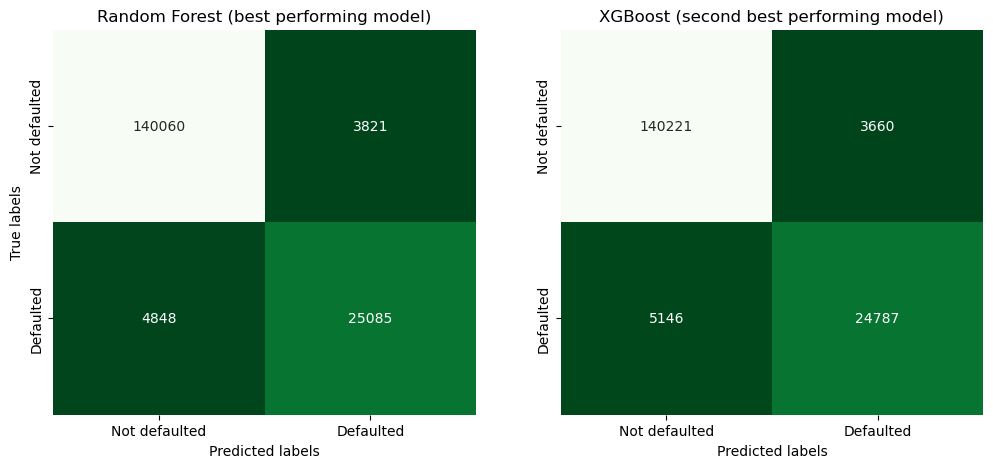

In [468]:
fig, ax = plt.subplots(ncols =2, figsize=(12,5));
sns.heatmap(final_table.sort_values(by='f1 (test)', ascending=False).iloc[0]['confussion matrix'], annot=True, cmap='Greens_r', 
            fmt='2g', cbar=None, ax=ax[0]);
ax[0].set_xlabel('Predicted labels');ax[0].set_ylabel('True labels');
ax[0].xaxis.set_ticklabels(['Not defaulted', 'Defaulted']); ax[0].yaxis.set_ticklabels(['Not defaulted', 'Defaulted']);
ax[0].set_title('Random Forest (best performing model)');

sns.heatmap(final_table.sort_values(by='f1 (test)', ascending=False).iloc[1]['confussion matrix'], annot=True, cmap='Greens_r', 
            fmt='2g', cbar=None, ax=ax[1]);
ax[1].set_xlabel('Predicted labels');ax[0].set_ylabel('True labels');
ax[1].xaxis.set_ticklabels(['Not defaulted', 'Defaulted']); ax[1].yaxis.set_ticklabels(['Not defaulted', 'Defaulted']);
ax[1].set_title('XGBoost (second best performing model)');

Although the "winning" model is the Random Forest , we believe that we should note these two models for future use because the difference in performance is small and XGBoost has two advantages over the Random Forest: 1) it has practically negligible overfitting, which implies that it surely needs less maintenance. 2) It takes more than 45 times less. It really is a lot of difference and it would be necessary to evaluate if the processing times are a problem or not.

Another interesting thing to rate these two models is that the random forest has a higher recall, but the XGBoost has a higher precision. In other words, the random forest better answers the question: 

*What percentage of loans that are going to have repayment problems are we able to identify?* While the XGBoost better answers the question: 

*What percentage of the loans that we say will have problems actually do?* 

A higher percentage in the first question means less money lost due to defaults; while the second means that we are rejecting fewer loans that could be repaid, that is, we are helping more companies.

Of course, the balance between the two percentages is what matters, and it is what we chose for having chosen the F1-score as a metric, but it does not hurt to see the implications.

To close, as a solution to the business problem posed, it is proposed to create an application with an html front end that uses the model found in random forest to decide, based on the data entered, whether or not to grant a loan.

As a workaround, if the IT department considers processing cost to be an issue or does not have the resources to do the constant maintenance that an overfit model requires, it is proposed that the application use the found model that is based on XGBoost.